## BIGDATA AND DATA MINING 
### ADEYEMI VICTOR GBADAMOSI       699795

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('accident_data_v1.0.0_2023 (1).db')

In [3]:
cur = con.cursor()

In [4]:
accident_info = cur.execute("PRAGMA table_info(accident)").fetchall()
vehicle_info = cur.execute('PRAGMA table_info(vehicle)').fetchall()
casualty_info = cur.execute('PRAGMA table_info(casualty)').fetchall()
lsoa_info = cur.execute('PRAGMA table_info(lsoa)').fetchall()

In [5]:
accident_info

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [6]:
accident_cols = []#to hold the columns on the accident table
vehicle_cols = []#to hold the columns on the vehicle table
casualty_cols = []#to hold the columns on the casualty table
lsoa_cols = []#to hold the columns on the lsoa table

tables_columns = [accident_cols, vehicle_cols, casualty_cols, lsoa_cols]
acc_data_table = [accident_info, vehicle_info, casualty_info, lsoa_info]

In [7]:
table_index = 0
for table_column in tables_columns:
    i = acc_data_table[table_index]#accessing individual tables in the list
    for values in i: 
        table_column.append(values[1])
    table_index+=1 

In [8]:
accident_cols

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

#### Are there significant hours of the day, and days of the week, on which accidents occur?

- lets start with the day of the week. I would start by sort out the information from the database. This would make it easir to work and perfrom visualizations on. 


In [9]:
accident_period = cur.execute('''
                SELECT
                    day_of_week,
                    count(accident_index)
                    
                FROM
                    accident
                WHERE 
                    accident_year = 2020
                GROUP BY
                    day_of_week;             

''').fetchall()

In [10]:
accident_period

[(1, 10315),
 (2, 12772),
 (3, 13267),
 (4, 13564),
 (5, 14056),
 (6, 14889),
 (7, 12336)]

In [11]:
columns = ['day_of_week', 'number_of_accident']
accident_period_df = pd.DataFrame(accident_period, columns = columns)

In [12]:
accident_period_df

,day_of_week,number_of_accident
0,1,10315
1,2,12772
2,3,13267
3,4,13564
4,5,14056
5,6,14889
6,7,12336


<div class="alert alert-block alert-info">
<b>Tip:</b> According to the data statistics document, this could be the day of the week numeric translation.
    
| SU | M | T | W | TH | F | S |
| -- | - | - | - | - | - | -|
| 1  | 2 | 3 | 4 | 5 | 6 |7|

</div>



In [13]:
accident_period_df.describe()

,day_of_week,number_of_accident
count,7.000000,7.000000
mean,4.000000,13028.428571
std,2.160247,1458.840277
min,1.000000,10315.000000
25%,2.500000,12554.000000
50%,4.000000,13267.000000
75%,5.500000,13810.000000
max,7.000000,14889.000000


[Text(0.5, 1.0, 'Daily Accident Count ')]

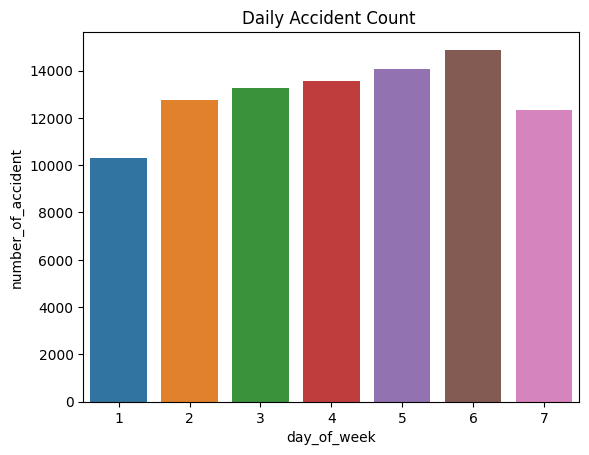

In [14]:
sns.barplot(accident_period_df, x= 'day_of_week', y = 'number_of_accident').set(title = 'Daily Accident Count ')

lets see the percentage increase between the days


In [15]:
accident_period_df['number_of_accident']

0    10315
1    12772
2    13267
3    13564
4    14056
5    14889
6    12336
Name: number_of_accident, dtype: int64

In [16]:
def calculate_percentage_increase(old_value, new_value):
    percentage_increase = ((new_value - old_value) / old_value) * 100
    return percentage_increase
    

In [17]:
for i in range(6):
    inc = calculate_percentage_increase(accident_period_df['number_of_accident'][i], 
                                        accident_period_df['number_of_accident'][i+1])
    print(i, inc)

0 23.819680077556956
1 3.8756655183213278
2 2.2386372201703475
3 3.6272485992332646
4 5.926294820717132
5 -17.14688696353012


<div class="alert alert-block alert-success">
<b>ANSWER:</b> More accident are seen to occur on day 2 to day 6. This could due to higher commuting within those days
</div>



- Now lets see the time of the day accidents occur more frequently. Again we will get the data from the database

In [18]:
accident_period_time = cur.execute('''
                SELECT
                    time,
                    count(accident_index)
                    
                FROM
                    accident
                 WHERE 
                    accident_year = 2020
                GROUP BY
                    time;             

''').fetchall()

In [19]:
columns = ['time', 'number_of_accident']
accident_periodtime_df = pd.DataFrame(accident_period_time, columns = columns)

In [20]:
accident_periodtime_df

,time,number_of_accident
0,00:00,36
1,00:01,91
2,00:02,16
3,00:03,15
4,00:04,23
...,...,...
1433,23:55,40
1434,23:56,14
1435,23:57,16
1436,23:58,9


In [21]:
accident_periodtime_df['convert_time'] = pd.DatetimeIndex(accident_periodtime_df['time'])

In [22]:
accident_periodtime_df['convert_time'] = accident_periodtime_df['convert_time'].dt.hour# assign the hour to a new column

In [23]:
accident_periodtime_df

,time,number_of_accident,convert_time
0,00:00,36,0
1,00:01,91,0
2,00:02,16,0
3,00:03,15,0
4,00:04,23,0
...,...,...,...
1433,23:55,40,23
1434,23:56,14,23
1435,23:57,16,23
1436,23:58,9,23


In [24]:
sum_of_acc = []
acc_hours = []

for i in range(0,24):
    sum_of_acc.append(accident_periodtime_df.loc[accident_periodtime_df['convert_time'] == i].number_of_accident.sum())
    acc_hours.append(str(i) +'-'+str(i+1)) # if i = 1 the string 1-2 is appended for the hour 

In [25]:
accident_withtime_df = pd.DataFrame({'Hours of the day': acc_hours,
                   'Number of Accident': sum_of_acc})

In [26]:
accident_withtime_df

,Hours of the day,Number of Accident
0,0-1,1188
1,1-2,915
2,2-3,658
3,3-4,566
4,4-5,508
5,5-6,855
6,6-7,1830
7,7-8,3736
8,8-9,5267
9,9-10,3917


In [27]:
accident_withtime_df.describe()

,Number of Accident
count,24.000000
mean,3799.958333
std,2392.493124
min,508.000000
25%,1644.000000
50%,3826.500000
75%,5481.500000
max,7813.000000


[Text(0.5, 1.0, 'Accident count at various hours of the day')]

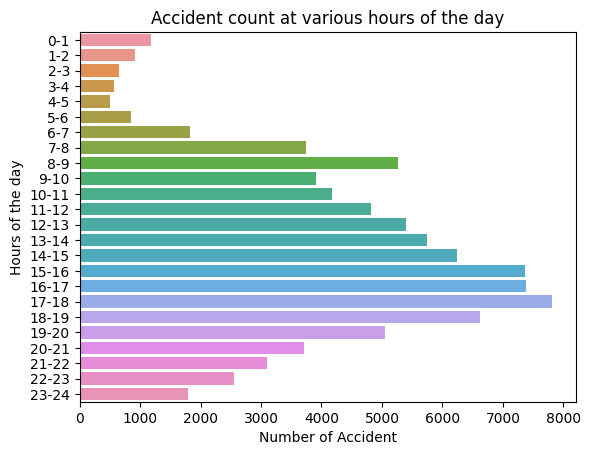

In [28]:
sns.barplot(accident_withtime_df, x= 'Number of Accident', y = 'Hours of the day').set(title = 'Accident count at various hours of the day')

<div class="alert alert-block alert-success">
<b>ANSWER:</b> From 6am till midnight we average more than 1500 accidents per hour and this peaks between 3 to 5pm. 
</div>



In [29]:
for i in range(len(accident_withtime_df)-1):
    inc = calculate_percentage_increase(accident_withtime_df['Number of Accident'][i], 
                                        accident_withtime_df['Number of Accident'][i+1])
    print(i, inc)

0 -22.97979797979798
1 -28.087431693989075
2 -13.98176291793313
3 -10.247349823321555
4 68.30708661417323
5 114.03508771929825
6 104.15300546448087
7 40.979657387580296
8 -25.631289158913994
9 6.535613990298699
10 15.31272465851905
11 12.115544472152951
12 6.413345690454124
13 8.778958369622018
14 17.870296236989592
15 0.27170221437304715
16 5.852865465384094
17 -15.295021118648405
18 -23.723179208220007
19 -26.40649762282092
20 -16.39300134589502
21 -17.739858338699293
22 -29.70645792563601


#### For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? ( Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc)

<div class="alert alert-block alert-info">
<b>Tip:</b> According to the data statistics document, this could be the day of the week numeric translation.
    
| MOTORBIKES | CODE | 
| -- | - | 
| M/cycle 50cc and under  | 2 |
| M/cycle over 50cc and up to 125cc  | 3 |
| M/cycle over 125cc and up to 500cc  | 4 |
| Motorcycle over 500cc  | 5 |

</div>

Lets try to get the time hours directly from the database

In [31]:
hour_time_substr = ['00','01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', 
            '12','13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']# hour index to be used in sorting the database

def get_total(index):
    total = cur.execute(f'''
                    SELECT
                        a.time,
                        count(a.accident_index)

                    FROM
                        accident a
                    JOIN
                        vehicle v
                    ON 
                        a.accident_index = v.accident_index
                    WHERE
                        vehicle_type IN (2,3,4,5) and a.time like ('{hour_time_substr[index]}%')
                        AND 
                    a.accident_year = 2020
                    GROUP BY
                        time;             

    ''').fetchall()
    
    total_accident = 0
    for item in total:
        total_accident += item[1]
    return total_accident
    

In [32]:
total_accident_list = []
for i in range(24):
    total_accident_list.append(get_total(i))
    

In [33]:
motorcycle_accident_withtime_df = pd.DataFrame({'Hours of the day': acc_hours,
                   'Number of Accident': total_accident_list})

In [34]:
motorcycle_accident_withtime_df

,Hours of the day,Number of Accident
0,0-1,101
1,1-2,95
2,2-3,49
3,3-4,42
4,4-5,43
5,5-6,116
6,6-7,259
7,7-8,550
8,8-9,499
9,9-10,422


In [35]:
motorcycle_accident_withtime_df.describe()

,Number of Accident
count,24.000000
mean,588.583333
std,430.058936
min,42.000000
25%,207.500000
50%,540.500000
75%,952.750000
max,1401.000000


[Text(0.5, 1.0, 'Motorcycle Accident count at varrious hours of the day')]

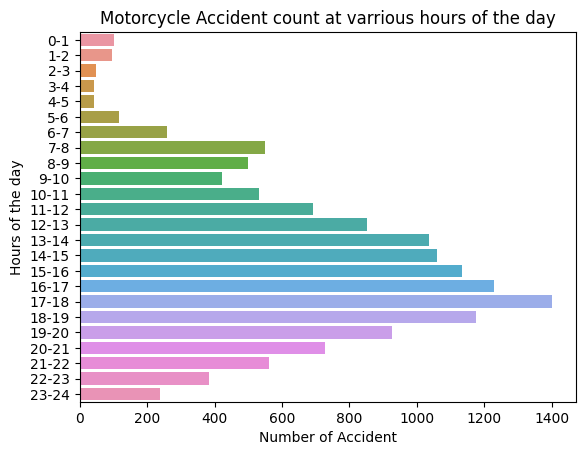

In [36]:
sns.barplot(motorcycle_accident_withtime_df, x= 'Number of Accident',
            y = 'Hours of the day').set(title = 'Motorcycle Accident count at varrious hours of the day')

In [37]:
for i in range(len(motorcycle_accident_withtime_df)-1):
    inc = calculate_percentage_increase(motorcycle_accident_withtime_df['Number of Accident'][i], 
                                        motorcycle_accident_withtime_df['Number of Accident'][i+1])
    print(i, inc)

0 -5.9405940594059405
1 -48.421052631578945
2 -14.285714285714285
3 2.380952380952381
4 169.7674418604651
5 123.27586206896552
6 112.35521235521236
7 -9.272727272727273
8 -15.430861723446892
9 25.829383886255926
10 30.32015065913371
11 23.265895953757227
12 21.45369284876905
13 2.2200772200772203
14 7.0821529745042495
15 8.37742504409171
16 13.995117982099266
17 -16.059957173447536
18 -21.343537414965986
19 -21.297297297297295
20 -22.664835164835164
21 -31.616341030195382
22 -38.18181818181819


<div class="alert alert-block alert-success">
<b>ANSWER:</b> From 6am till midnight we average more than 500 motorbike accidents per hour and this peaks between 5 to 6 pm. 
</div>



Lets get the number of accidents on the daya of the week for motorbikes

In [38]:
motorcycle_accident_period_days = cur.execute('''
                SELECT
                    day_of_week,
                    count(a.accident_index)
                    
                FROM
                    accident a
                JOIN
                    vehicle v
                ON 
                    a.accident_index = v.accident_index
                WHERE
                        vehicle_type IN (2,3,4,5)
                AND 
                    a.accident_year = 2020
                GROUP BY
                    day_of_week;             

''').fetchall()

In [39]:
columns = ['day_of_week', 'number_of_accident']
motorcycle_accident_period_df = pd.DataFrame(motorcycle_accident_period_days, columns = columns)

In [40]:
motorcycle_accident_period_df

,day_of_week,number_of_accident
0,1,1841
1,2,1868
2,3,1933
3,4,2001
4,5,2172
5,6,2308
6,7,2003


In [41]:
motorcycle_accident_period_df.describe()

,day_of_week,number_of_accident
count,7.000000,7.00000
mean,4.000000,2018.00000
std,2.160247,168.01984
min,1.000000,1841.00000
25%,2.500000,1900.50000
50%,4.000000,2001.00000
75%,5.500000,2087.50000
max,7.000000,2308.00000


[Text(0.5, 1.0, 'motorcycle_accicent vs day of week')]

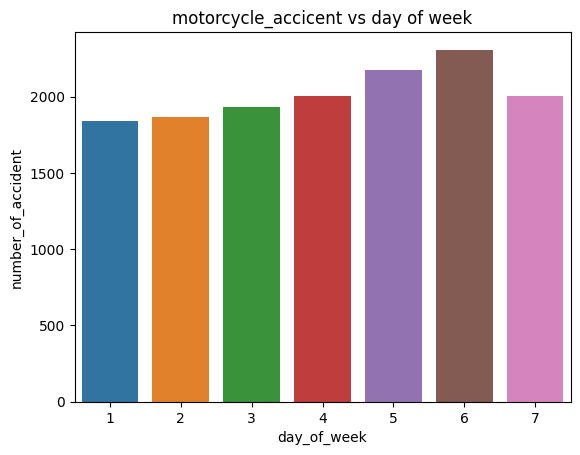

In [42]:
sns.barplot(motorcycle_accident_period_df, x= 'day_of_week', 
            y = 'number_of_accident').set(title = 'motorcycle_accicent vs day of week')

In [43]:
for i in range(len(motorcycle_accident_period_df)-1):
    inc = calculate_percentage_increase(motorcycle_accident_period_df['number_of_accident'][i], 
                                        motorcycle_accident_period_df['number_of_accident'][i+1])
    print(i, inc)

0 1.4665942422596416
1 3.4796573875803
2 3.517847904811174
3 8.545727136431784
4 6.261510128913445
5 -13.214904679376083


<div class="alert alert-block alert-success">
<b>ANSWER:</b> We have similar motorbike accidents everyday between 1800 to 2000 but on day 5 and day 6 we have the highest number of motorbike accidents. 
</div>



#### For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

<div class="alert alert-block alert-info">
<b>Tip:</b> According to the data statistics document, Casualty Class is 3.
</div>

In [44]:
something = ['00','01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', 
            '12','13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']# hour index to be used in sorting the database

def get_total(index):
    total = cur.execute(f'''
                    SELECT
                        a.time,
                        count(a.accident_index)

                    FROM
                        accident a
                    JOIN
                        casualty c
                    ON 
                        a.accident_index = c.accident_index
                    WHERE
                        casualty_class = 3 and a.time like '{something[index]}%'
                     AND 
                    a.accident_year = 2020
                    GROUP BY
                        time;             

    ''').fetchall()
    
    total_accident = 0
    for item in total:
        total_accident += item[1]
    return total_accident

In [45]:
total_ped_accident_list = [get_total(i) for i in range(24) ]

In [46]:
ped_accident_withtime_df = pd.DataFrame({'Hours of the day': acc_hours,
                   'Number of Accident': total_ped_accident_list})

In [47]:
ped_accident_withtime_df.describe()

,Number of Accident
count,24.000000
mean,614.583333
std,461.460528
min,50.000000
25%,173.000000
50%,562.500000
75%,878.500000
max,1672.000000


[Text(0.5, 1.0, 'Pedestrians Accident count at various hours of the day')]

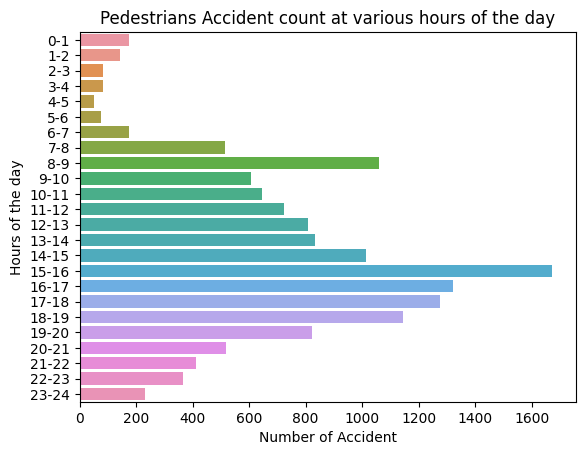

In [48]:
sns.barplot(ped_accident_withtime_df, x= 'Number of Accident', 
            y = 'Hours of the day').set(title = 'Pedestrians Accident count at various hours of the day')

In [49]:
for i in range(len(ped_accident_withtime_df)-1):
    inc = calculate_percentage_increase(ped_accident_withtime_df['Number of Accident'][i], 
                                        ped_accident_withtime_df['Number of Accident'][i+1])
    print(i, inc)

0 -16.76300578034682
1 -42.36111111111111
2 -1.2048192771084338
3 -39.02439024390244
4 48.0
5 133.7837837837838
6 197.10982658959537
7 106.22568093385215
8 -42.735849056603776
9 6.095551894563426
10 12.577639751552795
11 11.586206896551724
12 2.966625463535229
13 21.84873949579832
14 64.72906403940887
15 -20.873205741626794
16 -3.7037037037037033
17 -10.047095761381476
18 -28.097731239092493
19 -37.13592233009709
20 -20.463320463320464
21 -11.407766990291263
22 -36.986301369863014


<div class="alert alert-block alert-success">
<b>ANSWER:</b> There is a lot of pedestrian accidents at 8-9 am then at 3-4pm
</div>



lets get the accident for the days of the week

In [50]:
pedestrian_accident_period_days = cur.execute('''
                SELECT
                    day_of_week,
                    count(a.accident_index)
                    
                FROM
                    accident a
                JOIN
                    casualty c
                ON 
                    a.accident_index = c.accident_index
                WHERE
                    casualty_class = 3
                 AND 
                    a.accident_year = 2020
                GROUP BY
                    day_of_week;             

''').fetchall()

In [51]:
columns = ['day_of_week', 'number_of_accident']
ped_accident_period_df = pd.DataFrame(pedestrian_accident_period_days, columns = columns)

In [52]:
ped_accident_period_df

,day_of_week,number_of_accident
0,1,1242
1,2,2207
2,3,2267
3,4,2247
4,5,2366
5,6,2543
6,7,1878


In [53]:
ped_accident_period_df.describe()

,day_of_week,number_of_accident
count,7.000000,7.000000
mean,4.000000,2107.142857
std,2.160247,430.705401
min,1.000000,1242.000000
25%,2.500000,2042.500000
50%,4.000000,2247.000000
75%,5.500000,2316.500000
max,7.000000,2543.000000


[Text(0.5, 1.0, 'pedestrian_accicent vs day of week')]

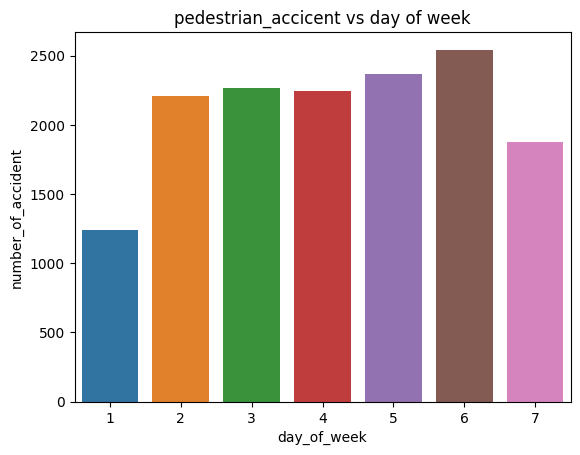

In [54]:
sns.barplot(ped_accident_period_df, x= 'day_of_week', 
            y = 'number_of_accident').set(title = 'pedestrian_accicent vs day of week')

In [55]:
for i in range(len(ped_accident_period_df)-1):
    inc = calculate_percentage_increase(ped_accident_period_df['number_of_accident'][i], 
                                        ped_accident_period_df['number_of_accident'][i+1])
    print(i, inc)

0 77.69726247987117
1 2.718622564567286
2 -0.882223202470225
3 5.29595015576324
4 7.480980557903635
5 -26.150216279984274


<div class="alert alert-block alert-success">
<b>ANSWER:</b> There is a lot of pedestrian accidents from day 2 till day 6 and peaks on day 6
</div>



#### Using the apriori algorithm, explore the impact of selected variables on accident severity

In [56]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

let select variables from the database that might have high impact on accident severity. To do this i will considering using correlation to statistically see how correlated the numeric data is to accident severity

In [57]:
accident_data = cur.execute('''
            SELECT 
                *
            FROM
                accident
            WHERE
                accident_year = 2020
''').fetchall()

In [58]:
columns = accident_cols
accident_df = pd.DataFrame(accident_data, columns = columns)

In [59]:
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [60]:
accident_df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,91199.0,91185.000000,9.118500e+04,91185.000000,91185.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,...,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,2020.0,456487.876416,2.737645e+05,-1.189258,52.351073,27.488043,2.768232,1.835272,1.267382,4.121558,...,0.352975,1.185309,2.065308,1.702047,1.391583,0.244740,0.180594,1.323205,1.415268,1.721521
std,0.0,93512.711807,1.473516e+05,1.367786,1.327573,24.548964,0.456682,0.677272,0.681473,1.932200,...,1.698116,2.445924,1.747690,1.845786,0.925690,1.318554,1.149791,0.468031,0.665469,0.801491
min,2020.0,65947.000000,1.271500e+04,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
25%,2020.0,392890.000000,1.745690e+05,-2.107789,51.457237,4.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2020.0,465545.000000,2.085990e+05,-1.046912,51.763385,22.000000,3.000000,2.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2020.0,530168.000000,3.783660e+05,-0.125238,53.297386,45.000000,3.000000,2.000000,1.000000,6.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.0,655138.000000,1.184351e+06,1.756257,60.541144,99.000000,3.000000,13.000000,41.000000,7.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


lets do some basic cleaning

In [61]:
accident_df.isna().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [62]:
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


Also lets deal with -1 values

In [63]:
(accident_df ==-1).sum()

accident_index                                     0
accident_year                                      0
accident_reference                                 0
location_easting_osgr                              0
location_northing_osgr                             0
longitude                                          0
latitude                                           0
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                         991
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                             

dealing with missing values

In [64]:
accident_df2 = accident_df.copy()
accident_df2.ffill(axis = 0, inplace = True)

In [65]:
accident_df2.isna().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

dealing with -1

<div class="alert alert-block alert-info">
<b>Tip:</b> BELOW ARE THE METHODS AND STEPS I TOOK TO ADDRESS -1
</div>

**Method 1(accident_df3)**
1. replace -1 with nan and use forward fill


**Method 2(accident_df4)**
1. get the columns with -1 into a list
2. get the indexes that has -1 in those columns to a list
3. get the uniques values from the column to a list
4. divide the length of the indexes by the length of the unique values. *This would be used later*
5. using a counter we can assign each of the unique values a number of times to the -1 indexes. this gives a even distribution of the values. 





In [66]:
accident_df3 = accident_df2.copy()

In [67]:
accident_df3

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [68]:
accident_df3.replace(-1, np.nan)
accident_df3.ffill(axis = 0, inplace = True)

In [69]:
accident_df3.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [70]:
accident_df4 = accident_df2.copy()
(accident_df4==-1).sum()

accident_index                                     0
accident_year                                      0
accident_reference                                 0
location_easting_osgr                              0
location_northing_osgr                             0
longitude                                          0
latitude                                           0
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                         991
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                             

In [71]:
cols_4_insp = ['trunk_road_flag', 'local_authority_district', 'junction_control', 'road_surface_conditions','speed_limit',
               'junction_detail',  'light_conditions', 'weather_conditions', 'did_police_officer_attend_scene_of_accident',
               'pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities','second_road_class', 
               'special_conditions_at_site','carriageway_hazards', 'second_road_number']#they are larger in value


In [72]:
import math
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
def fill_negativeone(col):
    index_list = accident_df4.loc[accident_df4[col]==-1].index
    lis2 = accident_df4[col].unique()
    lis2 = np.delete(lis2,np.where(lis2 == -1))    
    share_number = math.ceil(len(index_list)/len(lis2))
    
    inc = 0 
    lent = len(index_list)
    for i in tqdm_notebook(lis2, desc = col +' Progress' ):  
        count = 0
        while count < share_number: 
            if inc != lent:
#                 print(i, inc, index_list[inc], count)
                accident_df4.loc[index_list[inc], col] = i
                count+=1
                inc+=1
            else: 
                break

In [73]:
for column in cols_4_insp:
    fill_negativeone(column)

trunk_road_flag Progress:   0%|          | 0/2 [00:00<?, ?it/s]

local_authority_district Progress:   0%|          | 0/376 [00:00<?, ?it/s]

junction_control Progress:   0%|          | 0/5 [00:00<?, ?it/s]

road_surface_conditions Progress:   0%|          | 0/6 [00:00<?, ?it/s]

speed_limit Progress:   0%|          | 0/6 [00:00<?, ?it/s]

junction_detail Progress:   0%|          | 0/10 [00:00<?, ?it/s]

light_conditions Progress:   0%|          | 0/5 [00:00<?, ?it/s]

weather_conditions Progress:   0%|          | 0/9 [00:00<?, ?it/s]

did_police_officer_attend_scene_of_accident Progress:   0%|          | 0/3 [00:00<?, ?it/s]

pedestrian_crossing_human_control Progress:   0%|          | 0/4 [00:00<?, ?it/s]

pedestrian_crossing_physical_facilities Progress:   0%|          | 0/7 [00:00<?, ?it/s]

second_road_class Progress:   0%|          | 0/7 [00:00<?, ?it/s]

special_conditions_at_site Progress:   0%|          | 0/9 [00:00<?, ?it/s]

carriageway_hazards Progress:   0%|          | 0/7 [00:00<?, ?it/s]

second_road_number Progress:   0%|          | 0/2273 [00:00<?, ?it/s]

In [74]:
(accident_df4==-1).sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

<div class="alert alert-block alert-info">
    <b>Tip:</b> Now we have 3 dataframes. Accident_df(Raw data), Accident_df3(-1 was filled with ffill), Accident_df4(-1 filled by share the unique values equally)
</div>


Using the apriori algorithm, explore the impact of selected variables on accident severity

using accident_df3

In [75]:
accident_df3.accident_severity.value_counts()

3    71453
2    18355
1     1391
Name: accident_severity, dtype: int64

In [76]:
a_severity = pd.get_dummies(accident_df3.accident_severity, prefix = 'severity')

In [77]:
a_severity

,severity_1,severity_2,severity_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
91194,0,1,0
91195,0,0,1
91196,0,1,0
91197,0,0,1


In [78]:
new_col = ['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location',
 'accident_severity']####reassigning accident severity to last column

In [79]:
accident_df3 = accident_df3[new_col]

In [80]:
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


checking the definition of accident severity from the data base

In [81]:
accident_casualty_data = con.execute('''
SELECT
  a.accident_index,
  a.accident_severity,
  c.casualty_severity,
  a.number_of_casualties
  
from
    accident a
join casualty c
on a.accident_index = c.accident_index
where casualty_severity = 1;
''').fetchall()

In [82]:
acci_cas_col = ['accident_index', 'accident_severity', 'casualty_severity', 'number_of_casualties']

In [83]:
acci_col_df = pd.DataFrame(accident_casualty_data, columns = acci_cas_col)

In [84]:
acci_col_df

,accident_index,accident_severity,casualty_severity,number_of_casualties
0,2017010001708,1,1,3
1,2017010010057,1,1,1
2,2017010010704,1,1,1
3,2017010010722,1,1,1
4,2017010010819,1,1,1
...,...,...,...,...
6784,2020991006874,1,1,1
6785,2020991009077,1,1,1
6786,2020991010035,1,1,1
6787,2020991010115,1,1,1


In all 6789 times casuality severeity has been addressed as fatal the accident severity is also fatal. 

In [85]:
x = accident_df3['number_of_casualties']
y = accident_df3['accident_severity']

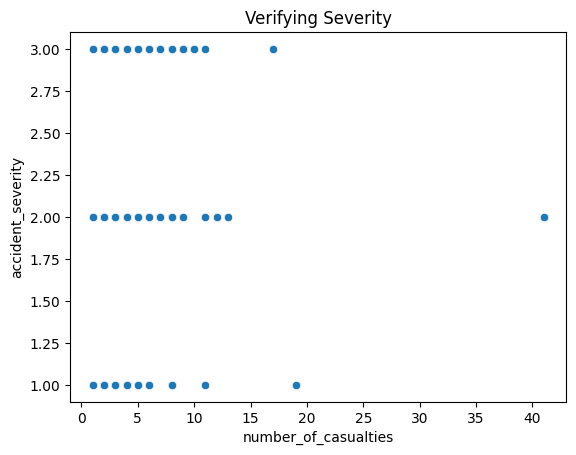

In [86]:
sns.scatterplot(x = x, y = y).set(title = 'Verifying Severity')
plt.show()


we can assume severity 2 and 3 are lesser severities on the bases that there are fewer accident with severity 1. accident severity is not defined in the stats doc. 

In [87]:
accident_df3[accident_df3.columns[1:]].corr()['accident_severity'][:-1]
# https://stackoverflow.com/questions/34896455/how-to-do-pearson-correlation-of-selected-columns-of-a-pandas-data-frame

accident_year                                       NaN
location_easting_osgr                          0.059571
location_northing_osgr                        -0.086639
longitude                                      0.060912
latitude                                      -0.086459
police_force                                  -0.102420
number_of_vehicles                             0.076475
number_of_casualties                          -0.072451
day_of_week                                    0.000775
local_authority_district                      -0.101943
first_road_class                               0.005571
first_road_number                             -0.012558
road_type                                     -0.024667
speed_limit                                   -0.117746
junction_detail                                0.058487
junction_control                               0.076413
second_road_class                              0.066291
second_road_number                             0

In [88]:
a_number_of_vehicles = pd.get_dummies(accident_df3.number_of_vehicles, prefix ='nov')
a_number_of_casualties = pd.get_dummies(accident_df3.number_of_casualties, prefix ='noc')
a_urban_or_rural_area = pd.get_dummies(accident_df3.urban_or_rural_area, prefix ='uora')
a_did_police_officer_attend_scene_of_accident = pd.get_dummies(accident_df3.did_police_officer_attend_scene_of_accident,
                                                               prefix ='dpoasoa')
a_speed_limit = pd.get_dummies(accident_df3.speed_limit, prefix ='speed')

In [89]:
concated_df = pd.concat([a_severity, a_speed_limit, a_number_of_vehicles, 
                         a_number_of_casualties,a_urban_or_rural_area, a_did_police_officer_attend_scene_of_accident], axis = 1)

In [90]:
concated_df

,severity_1,severity_2,severity_3,speed_-1,speed_20,speed_30,speed_40,speed_50,speed_60,speed_70,...,noc_17,noc_19,noc_41,uora_1,uora_2,uora_3,dpoasoa_-1,dpoasoa_1,dpoasoa_2,dpoasoa_3
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
91195,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
91196,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
91197,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [91]:
apr_a_severity = apriori(concated_df, min_support = 0.005, use_colnames = True)
# using a higher support and we wont have all severity

In [92]:
rules = association_rules(apr_a_severity, metric = 'lift', min_threshold = 1.5)

In [93]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(speed_60),(severity_1),0.125089,0.015252,0.005219,0.041725,2.735649,0.003311,1.027625,0.725166
1,(severity_1),(speed_60),0.015252,0.125089,0.005219,0.342200,2.735649,0.003311,1.330056,0.644283
2,(nov_1),(severity_1),0.282130,0.015252,0.007259,0.025729,1.686868,0.002956,1.010753,0.567214
3,(severity_1),(nov_1),0.015252,0.282130,0.007259,0.475917,1.686868,0.002956,1.369762,0.413492
4,(uora_2),(severity_1),0.322898,0.015252,0.009397,0.029102,1.908042,0.004472,1.014265,0.702852
...,...,...,...,...,...,...,...,...,...,...
3179,"(speed_70, dpoasoa_1)","(uora_2, noc_1, severity_3, nov_2)",0.042522,0.103762,0.009244,0.217380,2.094985,0.004831,1.145176,0.545882
3180,"(severity_3, uora_2)","(noc_1, speed_70, dpoasoa_1, nov_2)",0.233040,0.013553,0.009244,0.039665,2.926705,0.006085,1.027191,0.858348
3181,"(dpoasoa_1, uora_2)","(severity_3, noc_1, speed_70, nov_2)",0.248829,0.014978,0.009244,0.037148,2.480133,0.005516,1.023025,0.794488
3182,(speed_70),"(noc_1, nov_2, severity_3, dpoasoa_1, uora_2)",0.051393,0.067161,0.009244,0.179859,2.678037,0.005792,1.137413,0.660539


In [94]:
rules.loc[(rules['consequents']=={'severity_1'})].sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,"(speed_60, uora_2)",(severity_1),0.120692,0.015252,0.005121,0.042428,2.781704,0.003280,1.028379,0.728423
0,(speed_60),(severity_1),0.125089,0.015252,0.005219,0.041725,2.735649,0.003311,1.027625,0.725166
42,"(dpoasoa_1, uora_2)",(severity_1),0.248829,0.015252,0.008301,0.033358,2.187091,0.004505,1.018731,0.722568
34,"(nov_1, dpoasoa_1)",(severity_1),0.207502,0.015252,0.006206,0.029909,1.960950,0.003041,1.015109,0.618353
4,(uora_2),(severity_1),0.322898,0.015252,0.009397,0.029102,1.908042,0.004472,1.014265,0.702852
300,"(noc_1, dpoasoa_1, uora_2)",(severity_1),0.177973,0.015252,0.005165,0.029019,1.902561,0.002450,1.014178,0.577101
292,"(nov_1, dpoasoa_1, noc_1)",(severity_1),0.184015,0.015252,0.005066,0.027529,1.804933,0.002259,1.012625,0.546533
2,(nov_1),(severity_1),0.282130,0.015252,0.007259,0.025729,1.686868,0.002956,1.010753,0.567214
38,"(noc_1, uora_2)",(severity_1),0.239103,0.015252,0.005888,0.024626,1.614586,0.002241,1.009611,0.500260
30,"(nov_1, noc_1)",(severity_1),0.253139,0.015252,0.005899,0.023304,1.527906,0.002038,1.008244,0.462615


40 percent of the time when the speed limit is 60 the severity is one but this is not very common in the data.  

In [96]:
rules[rules['consequents']=={'severity_2'}].sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
478,"(noc_2, nov_1, dpoasoa_1)",(severity_2),0.018399,0.201263,0.006623,0.359952,1.788466,0.002920,1.247933,0.449125
72,"(noc_2, nov_1)",(severity_2),0.022676,0.201263,0.007621,0.336074,1.669821,0.003057,1.203050,0.410440
1300,"(nov_1, dpoasoa_1, speed_30, uora_2)",(severity_2),0.017566,0.201263,0.005833,0.332085,1.650003,0.002298,1.195866,0.400984
338,"(nov_1, dpoasoa_1, speed_40)",(severity_2),0.016108,0.201263,0.005318,0.330157,1.640422,0.002076,1.192423,0.396792
2592,"(nov_1, noc_1, speed_30, dpoasoa_1, uora_2)",(severity_2),0.015592,0.201263,0.005011,0.321378,1.596806,0.001873,1.176999,0.379670
1463,"(speed_60, uora_2, noc_2, dpoasoa_1)",(severity_2),0.020724,0.201263,0.006546,0.315873,1.569453,0.002375,1.167527,0.370514
375,"(speed_60, nov_1, uora_2)",(severity_2),0.044299,0.201263,0.013948,0.314851,1.564377,0.005032,1.165786,0.377490
1389,"(speed_60, nov_1, dpoasoa_1, uora_2)",(severity_2),0.037577,0.201263,0.011798,0.313977,1.560033,0.004235,1.164301,0.373004
482,"(nov_1, dpoasoa_1, uora_2)",(severity_2),0.084551,0.201263,0.026535,0.313837,1.559338,0.009518,1.164063,0.391832
411,"(speed_60, noc_2, uora_2)",(severity_2),0.024353,0.201263,0.007610,0.312472,1.552554,0.002708,1.161751,0.364784


In [97]:
rules = association_rules(apr_a_severity, metric = 'lift', min_threshold = 1.2)
rules.loc[rules['consequents']=={'severity_3'}].sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
326,"(noc_2, dpoasoa_3)",(severity_3),0.006086,0.783484,0.005987,0.983784,1.255652,0.001219,13.351791,0.204848
1885,"(noc_2, dpoasoa_3, uora_1)",(severity_3),0.005515,0.783484,0.005417,0.982107,1.253512,0.001095,12.100813,0.203363
1804,"(uora_2, dpoasoa_3, nov_2)",(severity_3),0.005472,0.783484,0.005296,0.967936,1.235424,0.001009,6.752578,0.191610
336,"(dpoasoa_3, uora_2)",(severity_3),0.006393,0.783484,0.006173,0.965695,1.232564,0.001165,6.311428,0.189897
1880,"(uora_2, dpoasoa_3, noc_1)",(severity_3),0.005658,0.783484,0.005450,0.963178,1.229352,0.001017,5.880106,0.187625
268,"(dpoasoa_3, speed_40)",(severity_3),0.005307,0.783484,0.005088,0.958678,1.223608,0.000930,5.239676,0.183720
1279,"(speed_20, dpoasoa_3, nov_2)",(severity_3),0.030538,0.783484,0.028937,0.947576,1.209439,0.005011,4.130108,0.178625
3538,"(speed_20, dpoasoa_3, uora_1, nov_2)",(severity_3),0.030099,0.783484,0.028509,0.947177,1.208928,0.004927,4.098863,0.178184
303,"(dpoasoa_3, nov_2)",(severity_3),0.079804,0.783484,0.075538,0.946551,1.208130,0.013013,4.050900,0.187215
1790,"(dpoasoa_3, uora_1, nov_2)",(severity_3),0.074332,0.783484,0.070242,0.944977,1.206121,0.012004,3.935010,0.184619


using accident_df4

In [98]:
a_severity = pd.get_dummies(accident_df4.accident_severity, prefix = 'severity')

In [99]:
a_severity

,severity_1,severity_2,severity_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
91194,0,1,0
91195,0,0,1
91196,0,1,0
91197,0,0,1


In [100]:
new_col = ['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location',
 'accident_severity']####reassigning accident severity to last column

In [101]:
accident_df4 = accident_df4[new_col]

In [102]:
accident_df4

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_severity
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,1,1,...,1,9,9,0,0,1,3,2,E01004576,3
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,1,2,...,1,1,1,0,0,1,1,2,E01003034,3
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,1,1,...,4,1,2,0,0,1,1,2,E01004726,3
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,1,1,...,4,1,1,0,0,1,1,2,E01003617,2
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,1,2,...,4,1,1,0,0,1,1,2,E01004763,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,1,...,1,1,1,0,0,1,1,1,-1,2
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,1,1,...,1,1,1,0,0,1,2,1,-1,3
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,1,...,1,1,1,0,0,2,1,1,-1,2
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,2,1,...,1,1,1,0,0,1,2,1,-1,3


checking number of casualties against accident severity

In [103]:
x = accident_df4['number_of_casualties']
y = accident_df4['accident_severity']

In [104]:
accident_df3[accident_df4.columns[1:]].corr()['accident_severity'][:-1]
# https://stackoverflow.com/questions/34896455/how-to-do-pearson-correlation-of-selected-columns-of-a-pandas-data-frame

accident_year                                       NaN
location_easting_osgr                          0.059571
location_northing_osgr                        -0.086639
longitude                                      0.060912
latitude                                      -0.086459
police_force                                  -0.102420
number_of_vehicles                             0.076475
number_of_casualties                          -0.072451
day_of_week                                    0.000775
local_authority_district                      -0.101943
first_road_class                               0.005571
first_road_number                             -0.012558
road_type                                     -0.024667
speed_limit                                   -0.117746
junction_detail                                0.058487
junction_control                               0.076413
second_road_class                              0.066291
second_road_number                             0

In [105]:
a_number_of_vehicles = pd.get_dummies(accident_df4.number_of_vehicles, prefix ='nov')
a_number_of_casualties = pd.get_dummies(accident_df4.number_of_casualties, prefix ='noc')
a_urban_or_rural_area = pd.get_dummies(accident_df4.urban_or_rural_area, prefix ='uora')
a_did_police_officer_attend_scene_of_accident = pd.get_dummies(accident_df4.did_police_officer_attend_scene_of_accident,
                                                               prefix ='dpoasoa')
a_speed_limit = pd.get_dummies(accident_df4.speed_limit, prefix ='speed')

In [106]:
concated_df = pd.concat([a_severity, a_speed_limit, a_number_of_vehicles, 
                         a_number_of_casualties,a_urban_or_rural_area, a_did_police_officer_attend_scene_of_accident], axis = 1)

In [107]:
concated_df

,severity_1,severity_2,severity_3,speed_20,speed_30,speed_40,speed_50,speed_60,speed_70,nov_1,...,noc_13,noc_17,noc_19,noc_41,uora_1,uora_2,uora_3,dpoasoa_1,dpoasoa_2,dpoasoa_3
0,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
91195,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
91196,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
91197,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [108]:
apr_a_severity = apriori(concated_df, min_support = 0.005, use_colnames = True)

In [109]:
rules = association_rules(apr_a_severity, metric = 'lift', min_threshold = 1.5)

In [110]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(speed_60),(severity_1),0.125111,0.015252,0.005219,0.041718,2.735170,0.003311,1.027618,0.725111
1,(severity_1),(speed_60),0.015252,0.125111,0.005219,0.342200,2.735170,0.003311,1.330022,0.644218
2,(nov_1),(severity_1),0.282130,0.015252,0.007259,0.025729,1.686868,0.002956,1.010753,0.567214
3,(severity_1),(nov_1),0.015252,0.282130,0.007259,0.475917,1.686868,0.002956,1.369762,0.413492
4,(uora_2),(severity_1),0.322898,0.015252,0.009397,0.029102,1.908042,0.004472,1.014265,0.702852
...,...,...,...,...,...,...,...,...,...,...
3175,"(uora_2, noc_1)","(severity_3, speed_70, dpoasoa_1, nov_2)",0.239103,0.015537,0.009244,0.038659,2.488123,0.005528,1.024051,0.786034
3176,"(speed_70, severity_3)","(uora_2, noc_1, dpoasoa_1, nov_2)",0.038794,0.091043,0.009244,0.238270,2.617127,0.005712,1.193281,0.642840
3177,"(severity_3, uora_2)","(speed_70, noc_1, dpoasoa_1, nov_2)",0.233040,0.013553,0.009244,0.039665,2.926705,0.006085,1.027191,0.858348
3178,(speed_70),"(noc_1, nov_2, severity_3, dpoasoa_1, uora_2)",0.051415,0.067161,0.009244,0.179782,2.676895,0.005790,1.137307,0.660387


In [111]:
rules.loc[rules['consequents']=={'severity_1'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(speed_60),(severity_1),0.125111,0.015252,0.005219,0.041718,2.735170,0.003311,1.027618,0.725111
2,(nov_1),(severity_1),0.282130,0.015252,0.007259,0.025729,1.686868,0.002956,1.010753,0.567214
4,(uora_2),(severity_1),0.322898,0.015252,0.009397,0.029102,1.908042,0.004472,1.014265,0.702852
24,"(speed_60, uora_2)",(severity_1),0.120703,0.015252,0.005121,0.042424,2.781451,0.003280,1.028375,0.728395
30,"(nov_1, noc_1)",(severity_1),0.253139,0.015252,0.005899,0.023304,1.527906,0.002038,1.008244,0.462615
34,"(nov_1, dpoasoa_1)",(severity_1),0.207502,0.015252,0.006206,0.029909,1.960950,0.003041,1.015109,0.618353
38,"(noc_1, uora_2)",(severity_1),0.239103,0.015252,0.005888,0.024626,1.614586,0.002241,1.009611,0.500260
42,"(dpoasoa_1, uora_2)",(severity_1),0.248829,0.015252,0.008301,0.033358,2.187091,0.004505,1.018731,0.722568
292,"(nov_1, dpoasoa_1, noc_1)",(severity_1),0.184015,0.015252,0.005066,0.027529,1.804933,0.002259,1.012625,0.546533
300,"(noc_1, dpoasoa_1, uora_2)",(severity_1),0.177973,0.015252,0.005165,0.029019,1.902561,0.002450,1.014178,0.577101


In [112]:
rules.loc[rules['consequents']=={'severity_2'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
46,"(nov_1, speed_40)",(severity_2),0.019112,0.201263,0.005965,0.312106,1.550734,0.002118,1.161133,0.362064
54,"(speed_60, nov_1)",(severity_2),0.045560,0.201263,0.014211,0.311913,1.549779,0.005041,1.160809,0.371680
58,"(speed_60, noc_2)",(severity_2),0.025143,0.201263,0.007752,0.308330,1.531973,0.002692,1.154794,0.356203
72,"(nov_1, noc_2)",(severity_2),0.022676,0.201263,0.007621,0.336074,1.669821,0.003057,1.203050,0.410440
74,"(nov_1, uora_2)",(severity_2),0.102117,0.201263,0.030932,0.302910,1.505044,0.010380,1.145816,0.373732
76,"(nov_1, dpoasoa_1)",(severity_2),0.207502,0.201263,0.063005,0.303636,1.508650,0.021243,1.147010,0.425434
82,"(noc_3, uora_2)",(severity_2),0.016689,0.201263,0.005132,0.307490,1.527801,0.001773,1.153394,0.351328
326,"(nov_1, dpoasoa_1, speed_30)",(severity_2),0.107666,0.201263,0.033016,0.306650,1.523629,0.011347,1.151997,0.385138
334,"(nov_1, speed_40, noc_1)",(severity_2),0.016546,0.201263,0.005044,0.304838,1.514622,0.001714,1.148993,0.345486
338,"(nov_1, dpoasoa_1, speed_40)",(severity_2),0.016108,0.201263,0.005318,0.330157,1.640422,0.002076,1.192423,0.396792


In [113]:
rules = association_rules(apr_a_severity, metric = 'lift', min_threshold = 1.2)
rules.loc[rules['consequents']=={'severity_3'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
246,"(speed_20, dpoasoa_3)",(severity_3),0.037698,0.783484,0.035472,0.940954,1.200986,0.005936,3.666899,0.173907
268,"(dpoasoa_3, speed_40)",(severity_3),0.005329,0.783484,0.005110,0.958848,1.223825,0.000935,5.261327,0.183869
304,"(dpoasoa_3, nov_2)",(severity_3),0.079804,0.783484,0.075538,0.946551,1.208130,0.013013,4.050900,0.187215
326,"(noc_2, dpoasoa_3)",(severity_3),0.006086,0.783484,0.005987,0.983784,1.255652,0.001219,13.351791,0.204848
336,"(dpoasoa_3, uora_2)",(severity_3),0.006404,0.783484,0.006173,0.964041,1.230453,0.001156,6.021194,0.188498
1281,"(speed_20, dpoasoa_3, nov_2)",(severity_3),0.030538,0.783484,0.028937,0.947576,1.209439,0.005011,4.130108,0.178625
1329,"(speed_20, dpoasoa_3, uora_1)",(severity_3),0.037150,0.783484,0.034935,0.940378,1.200251,0.005829,3.631459,0.173278
1366,"(dpoasoa_3, speed_30, nov_2)",(severity_3),0.041272,0.783484,0.038893,0.942349,1.202766,0.006557,3.755597,0.175841
1754,"(nov_2, dpoasoa_3, noc_1)",(severity_3),0.073674,0.783484,0.069496,0.943295,1.203974,0.011774,3.818288,0.182892
1791,"(dpoasoa_3, uora_1, nov_2)",(severity_3),0.074332,0.783484,0.070242,0.944977,1.206121,0.012004,3.935010,0.184619


Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region? 

In [114]:
accident_df4

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_severity
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,1,1,...,1,9,9,0,0,1,3,2,E01004576,3
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,1,2,...,1,1,1,0,0,1,1,2,E01003034,3
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,1,1,...,4,1,2,0,0,1,1,2,E01004726,3
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,1,1,...,4,1,1,0,0,1,1,2,E01003617,2
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,1,2,...,4,1,1,0,0,1,1,2,E01004763,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,1,...,1,1,1,0,0,1,1,1,-1,2
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,1,1,...,1,1,1,0,0,1,2,1,-1,3
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,1,...,1,1,1,0,0,2,1,1,-1,2
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,2,1,...,1,1,1,0,0,1,2,1,-1,3


<div class="alert alert-block alert-info">
<b>Tip:</b> from the stat20 document we can see that the humber region LOCAL AUTHORITY CODE NUMBERS are E06000010, E06000011, E06000012, E06000013
</div>

In [115]:
Hull_df2 = accident_df4[accident_df4['local_authority_ons_district'].isin(['E06000010', 'E06000011', 'E06000012', 'E06000013'])]

In [116]:
Hull_df2.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail     

Text(0.5, 1.0, 'Distribution of accidents in humber region for 2020')

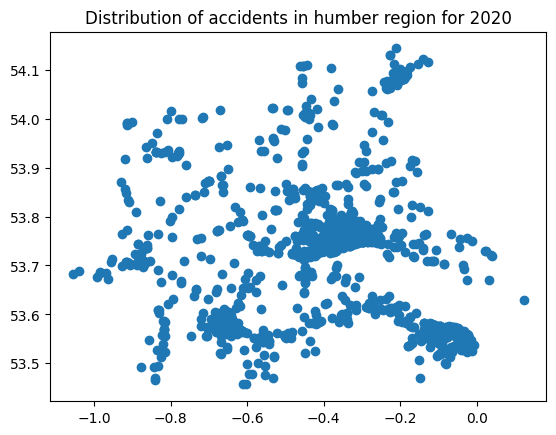

In [117]:
plt.scatter(Hull_df2['longitude'], Hull_df2['latitude'])
plt.title('Distribution of accidents in humber region for 2020')

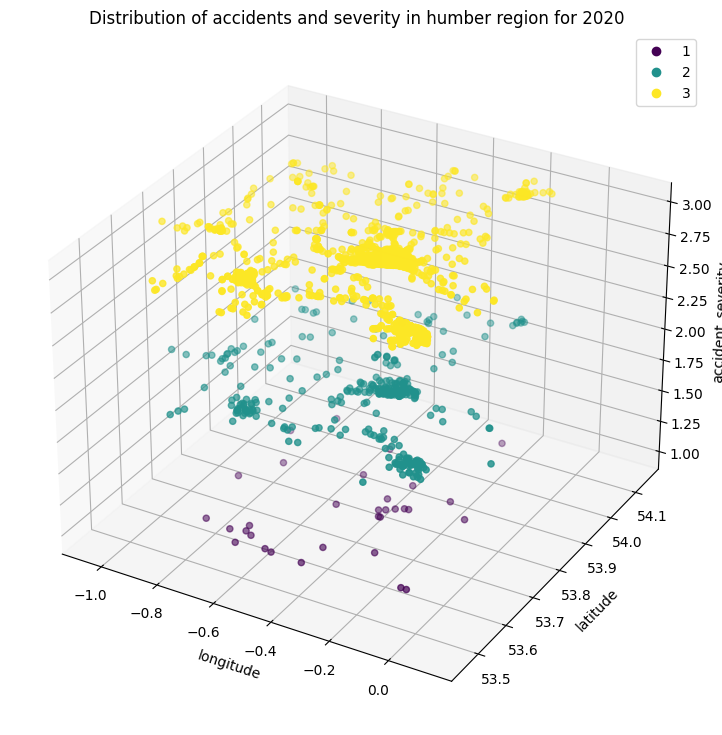

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 9)) # set the size of the figure
ax=fig.add_subplot(111,projection='3d')
sc =ax.scatter(Hull_df2['longitude'],Hull_df2['latitude'], Hull_df2['accident_severity'],
           c =Hull_df2['accident_severity'].astype(np.float))
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('accident_severity')
plt.title('Distribution of accidents and severity in humber region for 2020')
plt.legend(*sc.legend_elements())
plt.show()


<div class="alert alert-block alert-success">
<b>Result:</b> we can see that there are more accidents with severity 3 and this reduces down in number as we approach severity 1. 
</div>

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

lets use PCA to reduce the dimensions to 2 columns

In [120]:
from sklearn.preprocessing import StandardScaler
Hull_df2_num = Hull_df2.select_dtypes(exclude = 'object')
cols = Hull_df2_num.columns
x = Hull_df2_num.loc[:, cols].values
x = StandardScaler().fit_transform(x)

In [121]:
Hull_df2_num.reset_index(inplace = True)

In [122]:
len(cols)

29

In [123]:
feat_cols = ['feature'+ str(i) for i in range(len(cols))]

In [124]:
normalized_accident_data = pd.DataFrame(x, columns = feat_cols)

In [125]:
normalized_accident_data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28
0,0.0,0.225646,0.215293,0.231936,0.211123,0.0,-1.344717,-0.384741,-0.061753,-1.271682,...,-0.429217,1.214924,-0.317782,-0.519439,-0.129467,-0.123523,-0.719557,-0.744067,0.259726,-1.662544
1,0.0,-0.056605,0.188223,-0.052054,0.190395,0.0,0.219695,-0.384741,0.455578,-1.271682,...,1.836169,-0.612273,-0.317782,-0.519439,-0.129467,-0.123523,-0.719557,-0.744067,0.259726,0.496489
2,0.0,-0.633344,-1.537332,-0.668133,-1.518179,0.0,-1.344717,-0.384741,0.455578,0.781511,...,-0.429217,1.214924,-0.317782,-0.519439,-0.129467,-0.123523,1.389744,-0.744067,0.259726,0.496489
3,0.0,0.245787,0.539809,0.260113,0.534214,0.0,-1.344717,-0.384741,0.455578,-1.271682,...,-0.429217,1.214924,-0.317782,-0.519439,-0.129467,-0.123523,-0.719557,-0.744067,0.259726,-1.662544
4,0.0,1.331005,-1.037454,1.306573,-1.064559,0.0,-1.344717,-0.384741,0.455578,1.294809,...,-0.429217,1.214924,-0.317782,-0.519439,-0.129467,-0.123523,-0.719557,-0.744067,0.259726,0.496489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,0.0,-1.198878,-1.150447,-1.225217,-1.121609,0.0,0.219695,-0.384741,0.972909,0.781511,...,-0.429217,-0.612273,-0.317782,-0.519439,-0.129467,-0.123523,-0.719557,1.343964,0.259726,0.496489
1705,0.0,-0.214298,0.883036,-0.194328,0.886560,0.0,0.219695,-0.384741,0.455578,0.268213,...,-0.429217,1.214924,-0.317782,-0.519439,-0.129467,-0.123523,-0.719557,1.343964,0.259726,0.496489
1706,0.0,0.319753,0.475915,0.332858,0.468829,0.0,-1.344717,-0.384741,0.455578,-1.271682,...,-0.429217,-0.612273,-0.317782,-0.519439,-0.129467,-0.123523,-0.719557,1.343964,0.259726,0.496489
1707,0.0,-1.436379,-1.132201,-1.462313,-1.099166,0.0,0.219695,1.140832,-0.579084,0.781511,...,-0.429217,-0.612273,-0.317782,-0.519439,-0.129467,1.728234,1.389744,1.343964,-3.850204,0.496489


In [126]:
pca_accident = PCA(n_components = 2)
principalComponents_accident = pca_accident.fit_transform(x)

In [127]:
principal_accident_df = pd.DataFrame(data = principalComponents_accident, columns = ['PC1', 'PC2'])
principal_accident_df

,PC1,PC2
0,-1.408367,0.540252
1,-2.334957,0.534244
2,-0.041755,0.028357
3,1.023776,-0.525678
4,2.040024,-2.976972
...,...,...
1704,-1.131514,0.128996
1705,1.142565,-0.701606
1706,0.726893,-1.207277
1707,5.305693,-0.090294


In [128]:
print('Explained Variation per principal component:{}'.format(pca_accident.explained_variance_ratio_))

Explained Variation per principal component:[0.13626045 0.09422326]


Text(0.5, 1.0, 'PCA for Humberside accident data')

<Figure size 640x480 with 0 Axes>

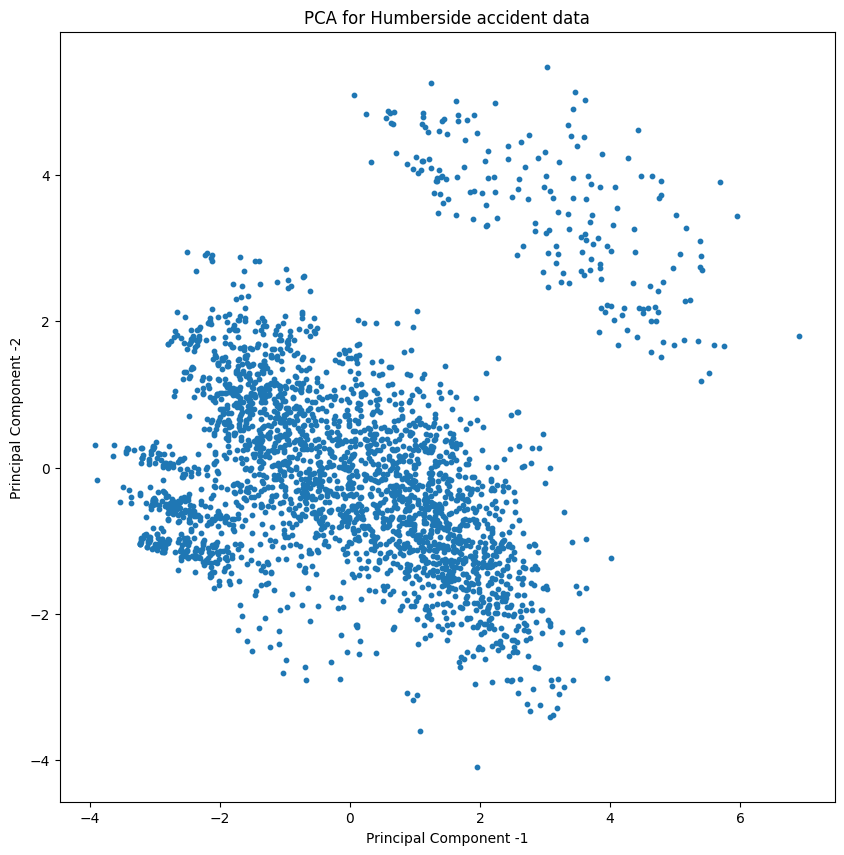

In [434]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.xlabel('Principal Component -1')
plt.ylabel('Principal Component -2')

plt.scatter(principal_accident_df['PC1'],
           principal_accident_df['PC2'],  s = 10)
plt.title('PCA for Humberside accident data')

<div class="alert alert-block alert-success">
<b>Result:</b> Scatter plot shows the distribution of the Principal component analysis
</div>

Text(0.5, 1.0, 'Accident Severity on Principal Component Analysis')

<Figure size 640x480 with 0 Axes>

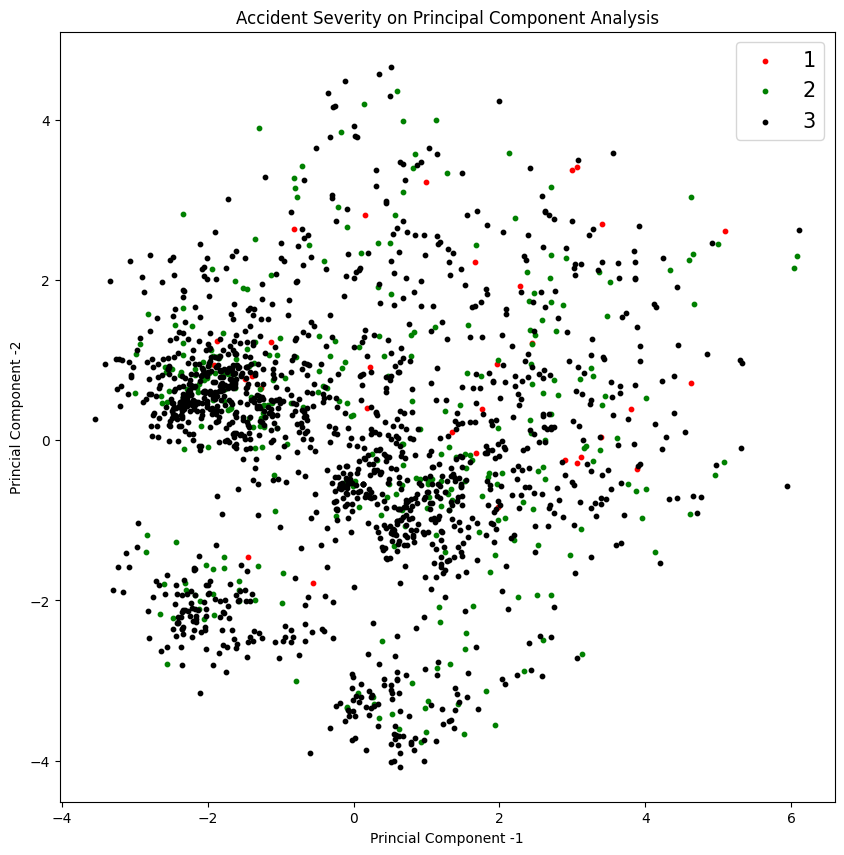

In [131]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.xlabel('Princial Component -1')
plt.ylabel('Princial Component -2')
targets = [1 , 2, 3]
colors = ['red', 'green', 'black']

for target, color in zip(targets, colors):
    indicesToKeep = Hull_df2_num['accident_severity']==target
    plt.scatter(principal_accident_df.loc[indicesToKeep,'PC1'],
               principal_accident_df.loc[indicesToKeep,'PC2'], c = color, s = 10)
plt.legend(targets, prop = {'size': 15})
plt.title('Accident Severity on Principal Component Analysis')

<div class="alert alert-block alert-success">
<b>Result:</b> distribution of the accident severity after using PCA
</div>

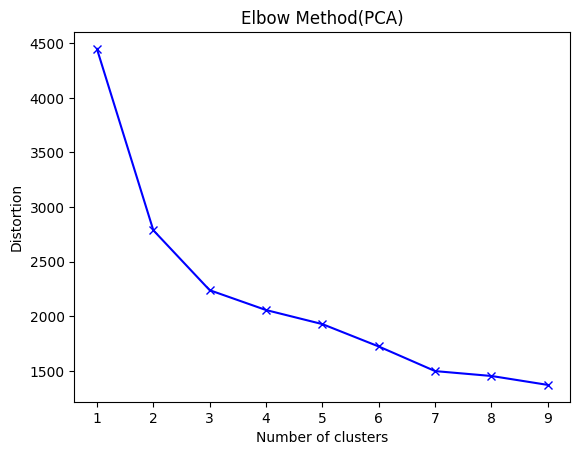

In [159]:
from sklearn_extra.cluster import KMedoids
import numpy as np
import warnings
warnings.filterwarnings('ignore')
distortions = []
K = range(1,10)
for k in K:
    Kmedoid = KMedoids(n_clusters = k, random_state = 42).fit(principal_accident_df)
    distortions.append(Kmedoid.inertia_)
    
plt.plot(K,distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method(PCA)')
plt.show()



<div class="alert alert-block alert-success">
<b>Result:</b> Suggested we use 3 clusters
</div>

In [137]:
kmedoid = KMedoids(n_clusters=3, random_state=0).fit(principal_accident_df)
labels =kmedoid.labels_


In [138]:
len(labels)

1709

In [139]:
lab =np.reshape(labels,(1709,1))

In [140]:
principal_accident_df['clust_labels'] = lab

In [141]:
principal_accident_df

,PC1,PC2,clust_labels
0,-1.408367,0.540252,2
1,-2.334957,0.534244,2
2,-0.041755,0.028357,0
3,1.023776,-0.525678,0
4,2.040024,-2.976972,0
...,...,...,...
1704,-1.131514,0.128996,2
1705,1.142565,-0.701606,0
1706,0.726893,-1.207277,0
1707,5.305693,-0.090294,1


Text(0.5, 1.0, 'Principal components analysis showing the KMedoid Clusters')

<Figure size 640x480 with 0 Axes>

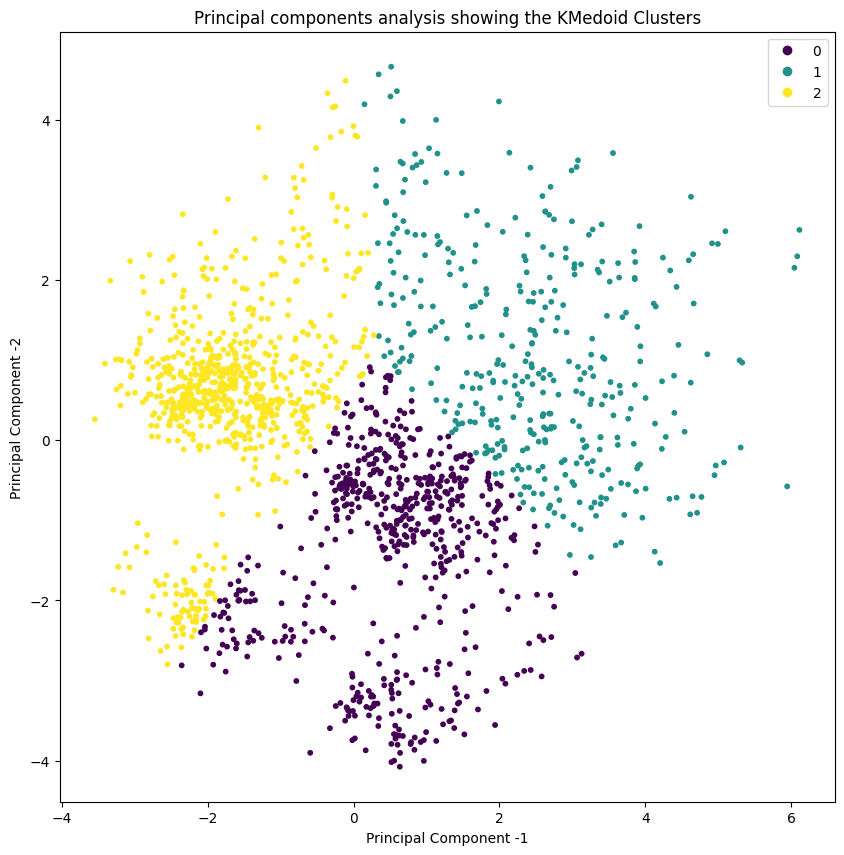

In [142]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.xlabel('Principal Component -1')
plt.ylabel('Principal Component -2')

sc = plt.scatter(principal_accident_df['PC1'],
           principal_accident_df['PC2'], 
           c =principal_accident_df['clust_labels'].astype(np.float),  s = 10)
plt.legend(*sc.legend_elements())
plt.title('Principal components analysis showing the KMedoid Clusters')

<div class="alert alert-block alert-success">
<b>Result:</b> wAccident data split into the 3 clusters
</div>

lets spread this clusters on the longitude and latitude of Humberside

In [143]:
new_df = Hull_df2[['longitude', 'latitude', 'urban_or_rural_area' ]]
new_df['clusters'] = labels

In [144]:
new_df

,longitude,latitude,urban_or_rural_area,clusters
37750,-0.331047,53.747751,1,2
37751,-0.393424,53.744936,1,2
37752,-0.528743,53.512895,2,0
37753,-0.324858,53.791630,1,0
37754,-0.095008,53.574501,1,0
...,...,...,...,...
39454,-0.651104,53.566753,1,2
39455,-0.424674,53.839482,1,0
39456,-0.308880,53.782750,1,0
39457,-0.703181,53.569801,2,1


Text(0.5, 1.0, 'Distribution of Clusters on Humberside')

<Figure size 640x480 with 0 Axes>

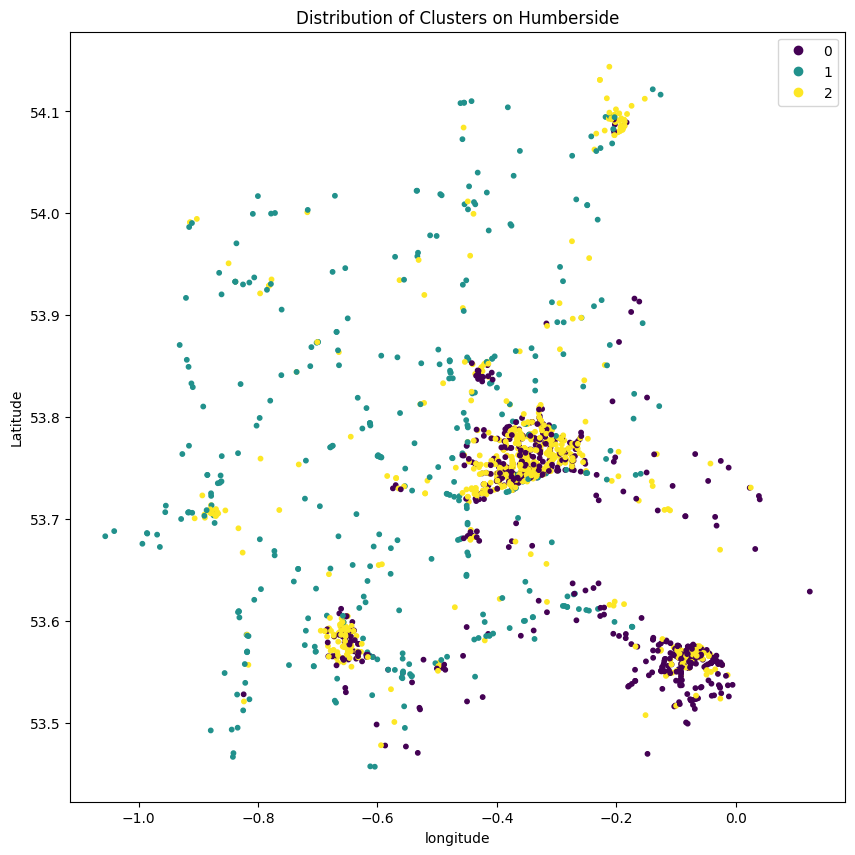

In [145]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.xlabel('longitude')
plt.ylabel('Latitude')

sc =plt.scatter(new_df['longitude'],
           new_df['latitude'], 
           c =new_df['clusters'].astype(np.float),  s = 10)
plt.legend(*sc.legend_elements())
plt.title('Distribution of Clusters on Humberside')

<div class="alert alert-block alert-success">
<b>Result:</b> The 3 cluster distribution on the longitude and latitude of humberside. 
</div>

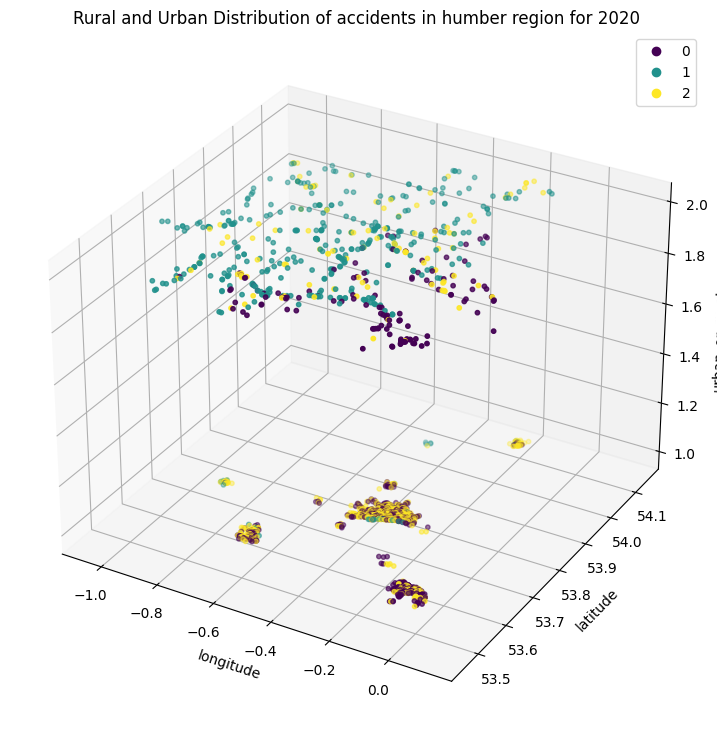

In [146]:
fig = plt.figure(figsize=(10, 9)) # set the size of the figure
ax=fig.add_subplot(111,projection='3d')
sc =ax.scatter(new_df['longitude'],new_df['latitude'], new_df['urban_or_rural_area'],
           c =new_df['clusters'].astype(np.float), s = 10)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('urban_or_rural_area')
plt.title('Rural and Urban Distribution of accidents in humber region for 2020')
plt.legend(*sc.legend_elements())
plt.show()


Since accident_df3 and accident_df4 has the same uneditted columns for long, lat and accident severity either of the data frame would achieve the same result. 

Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data? 

In [147]:
accident_df4

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_severity
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,1,1,...,1,9,9,0,0,1,3,2,E01004576,3
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,1,2,...,1,1,1,0,0,1,1,2,E01003034,3
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,1,1,...,4,1,2,0,0,1,1,2,E01004726,3
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,1,1,...,4,1,1,0,0,1,1,2,E01003617,2
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,1,2,...,4,1,1,0,0,1,1,2,E01004763,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,1,...,1,1,1,0,0,1,1,1,-1,2
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,1,1,...,1,1,1,0,0,1,2,1,-1,3
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,1,...,1,1,1,0,0,2,1,1,-1,2
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,2,1,...,1,1,1,0,0,1,2,1,-1,3


In [148]:
accident_df_num = accident_df4.select_dtypes(exclude = 'object')

In [149]:
len(accident_df_num.columns)

29

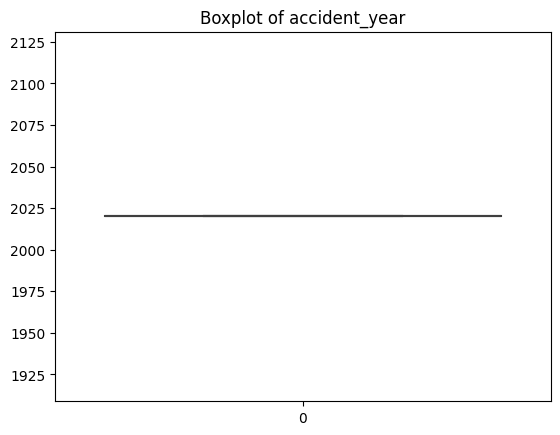

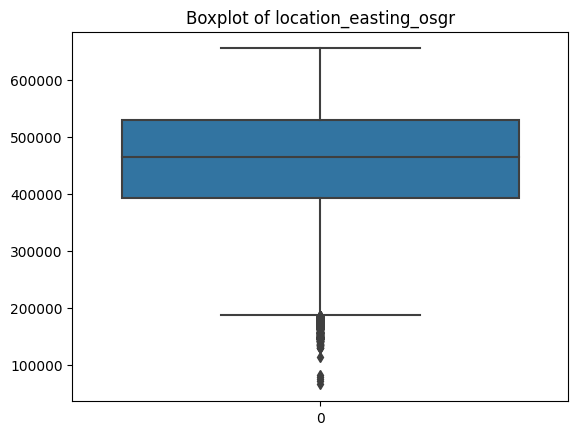

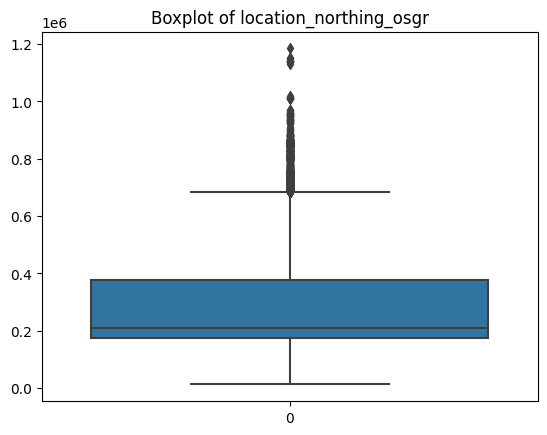

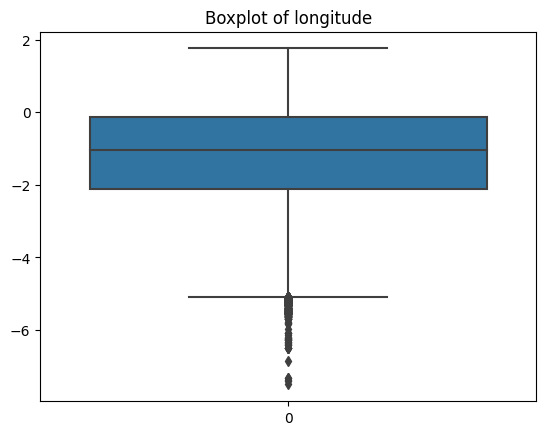

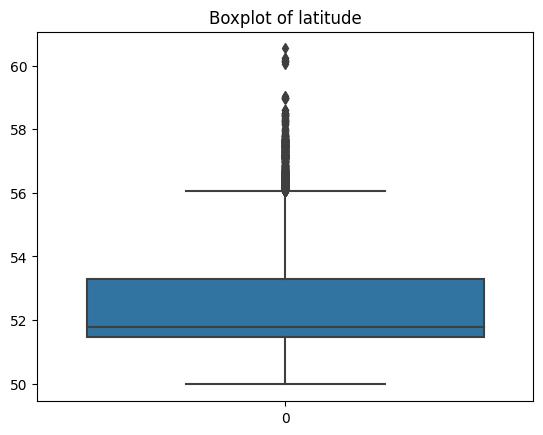

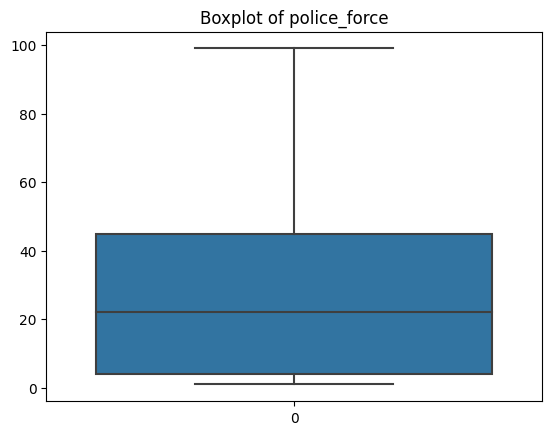

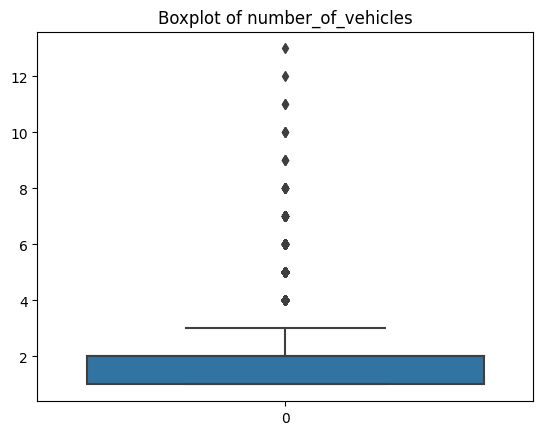

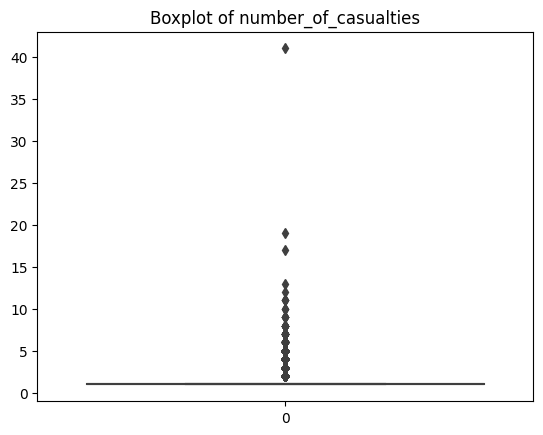

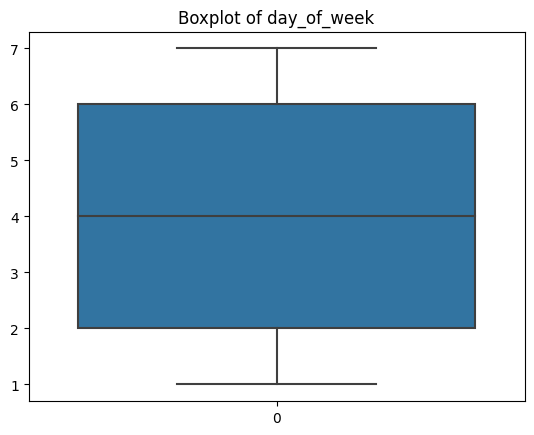

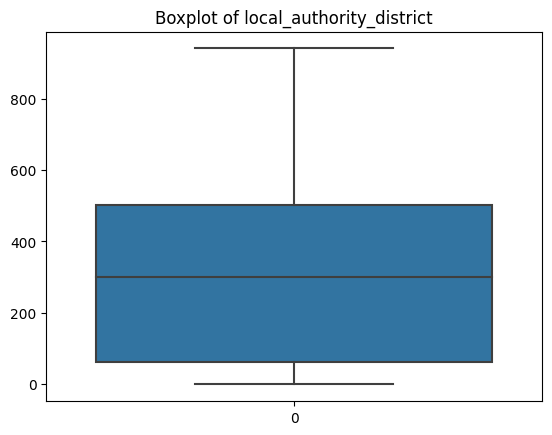

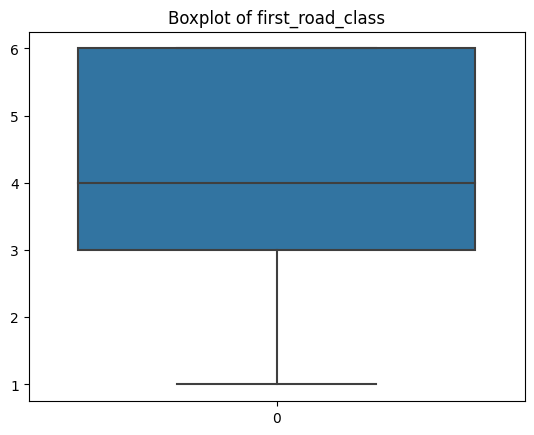

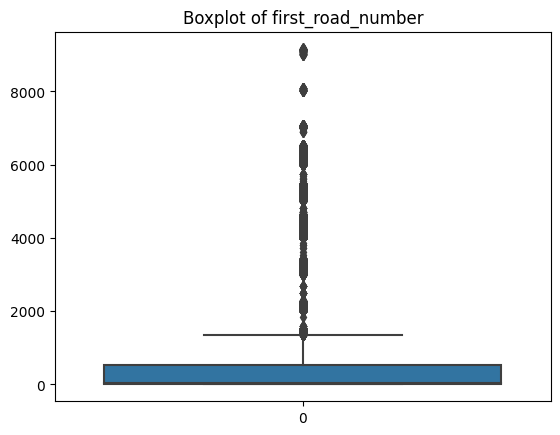

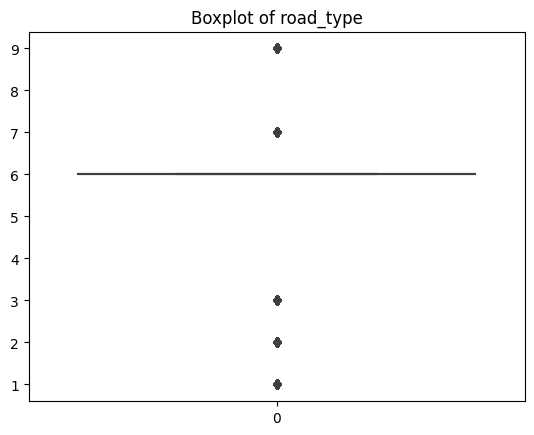

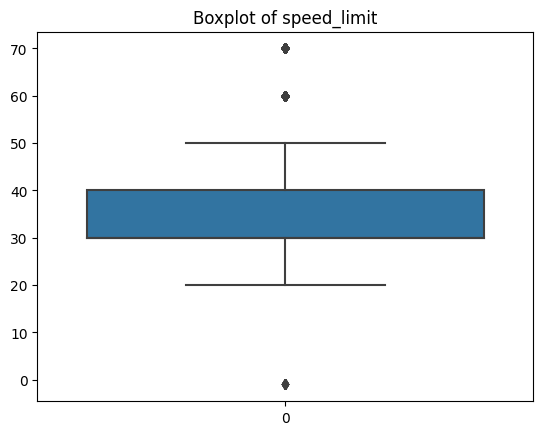

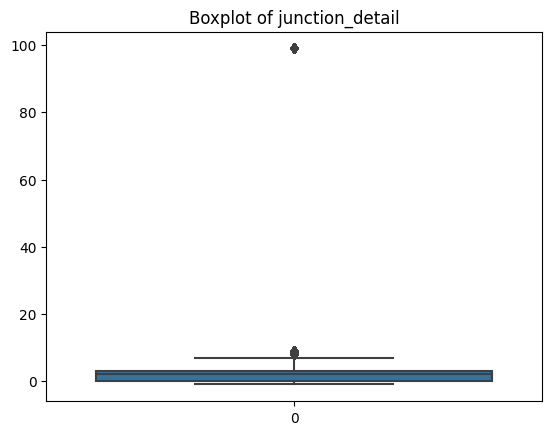

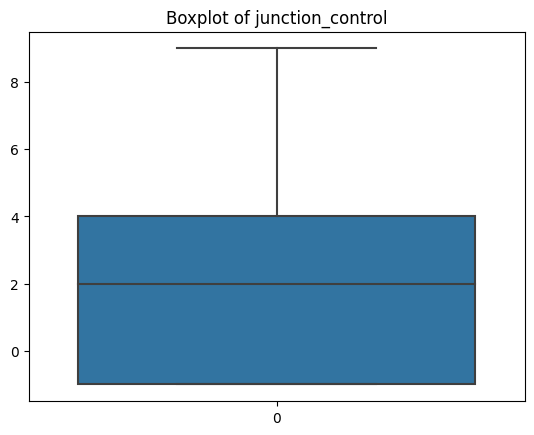

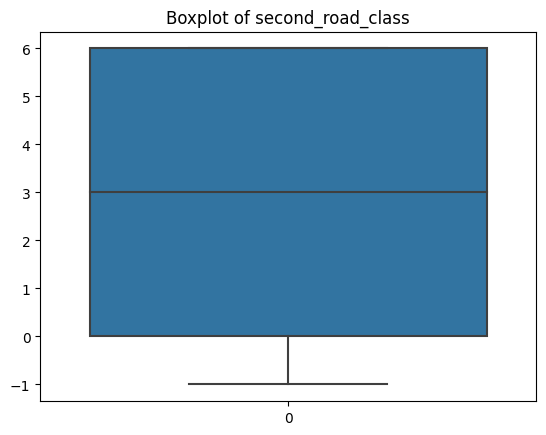

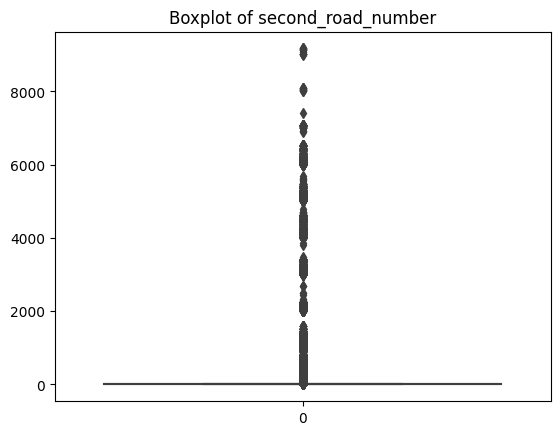

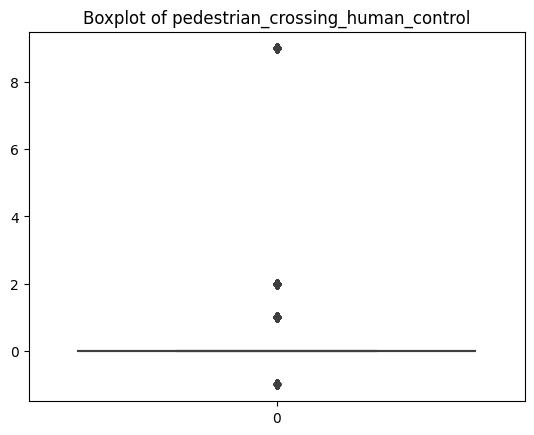

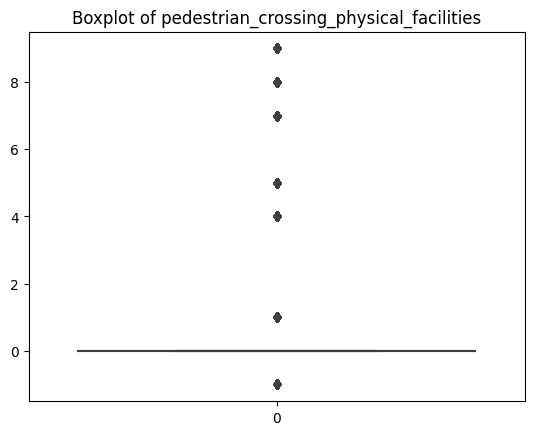

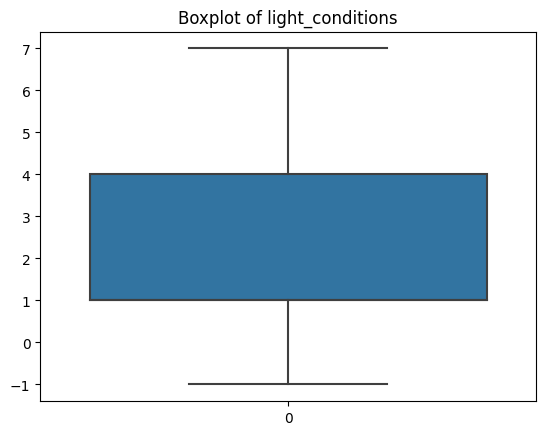

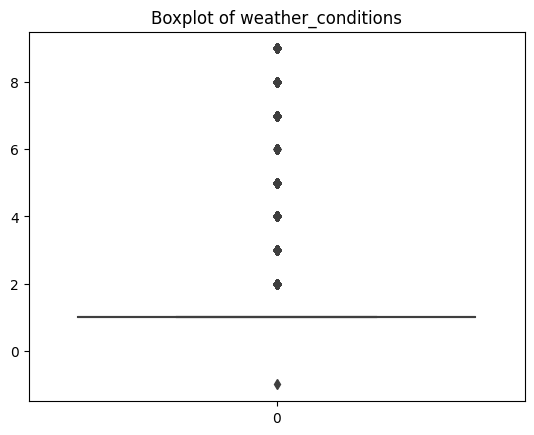

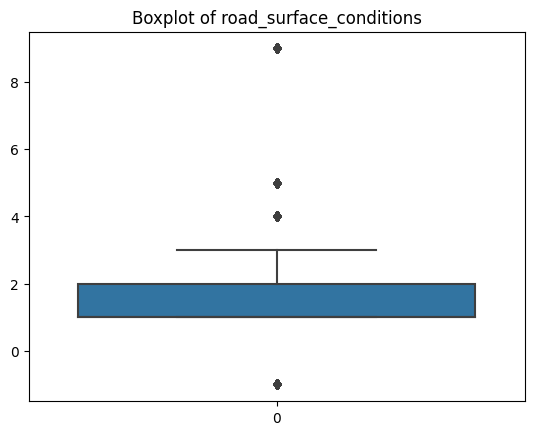

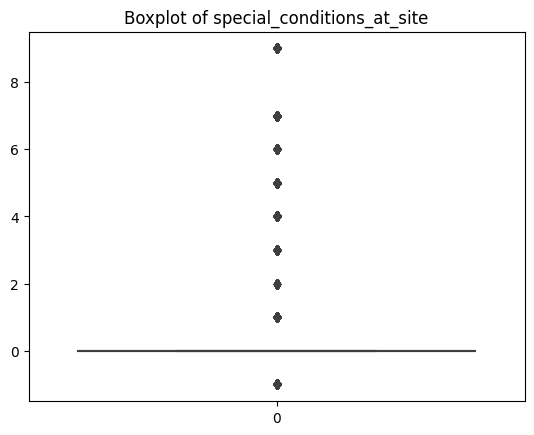

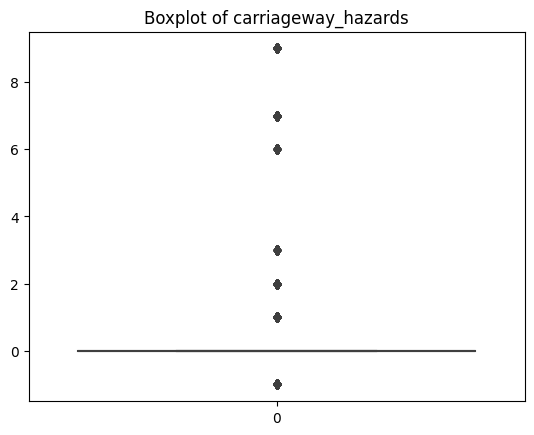

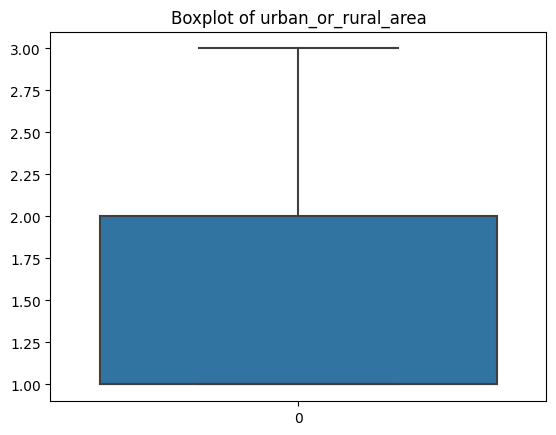

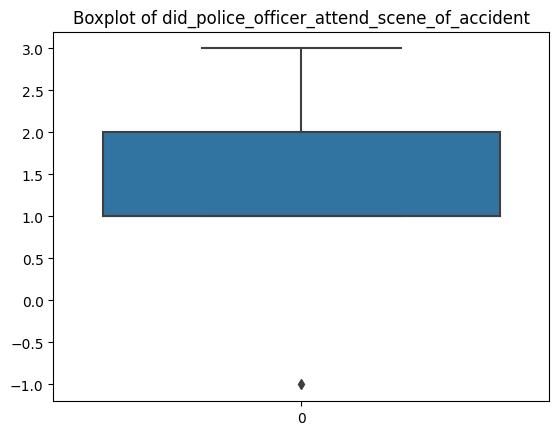

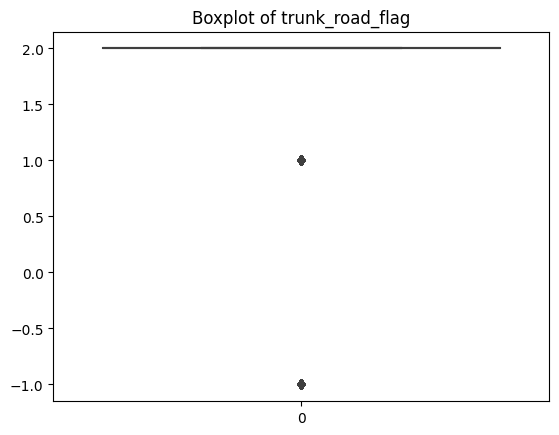

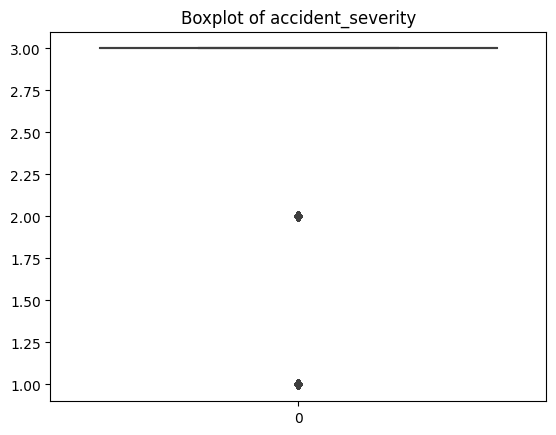

In [150]:
for i in accident_df_num.columns:
    sns.boxplot(data = accident_df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

Using interquartile range

In [151]:
def get_iqr_outliers(series, mltple):
    import numpy as np
    q75, q25 = np.percentile(series, [75, 25])
    iqr = q75 - q25
    return (q25 - mltple *iqr, q75 + mltple *iqr)

In [152]:
get_min_max= lambda pd_series : (pd_series.min(), pd_series.max())

In [153]:
print(accident_df_num.columns)

Index(['accident_year', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'local_authority_district',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'accident_severity'],
      dtype='object')


In [154]:
mlt = 1.5
for values in accident_df_num.columns: 
#     print(values)
    lower_range, upper_range = get_iqr_outliers(accident_df_num[values], mlt)
    mini, maxi =  get_min_max(accident_df_num[values])
    if mini >= lower_range and maxi > upper_range: 
        print(f'{values} has outliers in the upper range')
    elif mini < lower_range and  maxi <= upper_range: 
        print(f'{values} has outliers in the lower range')
    elif mini < lower_range  and maxi > upper_range : 
        print(f'{values} has outliers in both the lower and upper range')   
    elif (mini <= lower_range and maxi <= upper_range): 
        print(f'{values} has no outliers')  
    else:
        print(f'{values} has no outliers ') 
    print(f'The lower range {lower_range} and the upper range {upper_range} in {values} using interquartile multiple of {mlt}')
    print(f'The minimum value {mini} and the highest value {maxi} in {values}')  
    print('************************************************************************')

accident_year has no outliers
The lower range 2020.0 and the upper range 2020.0 in accident_year using interquartile multiple of 1.5
The minimum value 2020 and the highest value 2020 in accident_year
************************************************************************
location_easting_osgr has outliers in the lower range
The lower range 186944.5 and the upper range 736100.5 in location_easting_osgr using interquartile multiple of 1.5
The minimum value 65947.0 and the highest value 655138.0 in location_easting_osgr
************************************************************************
location_northing_osgr has outliers in the upper range
The lower range -131118.25 and the upper range 684055.75 in location_northing_osgr using interquartile multiple of 1.5
The minimum value 12715.0 and the highest value 1184351.0 in location_northing_osgr
************************************************************************
longitude has outliers in the lower range
The lower range -5.083059 and 

outliers seen are mostly negative values and they do not correlate with the data sheeet.......but most of the chart is not gaussian

using grubbs

In [155]:
def get_grubbs_value(pandas_series):
    avg = np.mean(pandas_series)
    absvalues = abs(pandas_series.tolist()-avg)
    maxvalue = max(absvalues)
    stdev = np.std(pandas_series)
    grubbs = maxvalue/stdev
    return grubbs

In [156]:
def get_critical(size, alpha): 
    from scipy import stats
    tdist = stats.t.ppf(1-alpha/(2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size-2 + np.square(tdist))
    
    critical_value = numerator/denominator
#     print('Grubbs critical value: {}'.format(critical_value))
    return critical_value

In [157]:
def outlier_check(series_len, column_name, alp):
    G= get_grubbs_value(accident_df_num[column_name])
    GC = get_critical(series_len, alp)
    if G > GC:
        print(f'There is an outlier in {column_name}')
    else:
        print(f'There is no outlier in {column_name}')

In [158]:
print('****************USING GRUBBS METHOD*****************************')
for values in accident_df_num.columns:
    outlier_check(len(accident_df_num[values]), values, 3)
    

****************USING GRUBBS METHOD*****************************
There is no outlier in accident_year
There is an outlier in location_easting_osgr
There is an outlier in location_northing_osgr
There is an outlier in longitude
There is an outlier in latitude
There is no outlier in police_force
There is an outlier in number_of_vehicles
There is an outlier in number_of_casualties
There is no outlier in day_of_week
There is no outlier in local_authority_district
There is no outlier in first_road_class
There is an outlier in first_road_number
There is no outlier in road_type
There is no outlier in speed_limit
There is an outlier in junction_detail
There is no outlier in junction_control
There is no outlier in second_road_class
There is no outlier in second_road_number
There is an outlier in pedestrian_crossing_human_control
There is no outlier in pedestrian_crossing_physical_facilities
There is no outlier in light_conditions
There is no outlier in weather_conditions
There is an outlier in r

location_easting_osgr, location_northing_osgr, longitude, latitude, number_of_vehicles, number_of_casualties is fine
first_road_number, junction_detail, pedestrian_crossing_human_control, road_surface_conditions, special_conditions_at_site,  carriageway_hazards needs checking 

In [160]:
accident_df_num['junction_detail'].value_counts()#continous variable

0     37979
3     25626
6      8429
1      7326
9      4706
8      1887
99     1508
2      1300
7      1279
5      1159
Name: junction_detail, dtype: int64

In [161]:
accident_df_num['pedestrian_crossing_human_control'].value_counts()

0    86394
9     3368
2     1016
1      421
Name: pedestrian_crossing_human_control, dtype: int64

In [162]:
accident_df_num['road_surface_conditions'].value_counts()

1    62751
2    26293
9      900
4      817
5      237
3      201
Name: road_surface_conditions, dtype: int64

In [163]:
accident_df_num['special_conditions_at_site'].value_counts()

0    87334
9     1477
4     1131
7      335
5      253
1      238
3      183
6      176
2       72
Name: special_conditions_at_site, dtype: int64

In [164]:
accident_df_num['carriageway_hazards'].value_counts()

0    87911
9     1221
2     1109
7      342
1      250
6      185
3      181
Name: carriageway_hazards, dtype: int64

9 and 99 could be used when the value is unknown

In [165]:
accident_df_num.loc[accident_df_num['carriageway_hazards']==9]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,accident_severity
93,2020,531295.0,164906.0,-0.115273,51.368046,1,2,1,5,20,...,0,4,8,2,9,9,1,3,2,3
95,2020,516956.0,183261.0,-0.315095,51.536148,1,1,1,6,27,...,1,1,1,2,9,9,1,3,2,3
149,2020,512347.0,179250.0,-0.382798,51.501032,1,1,1,7,27,...,1,4,8,1,0,9,1,3,2,3
154,2020,523741.0,185810.0,-0.216421,51.557612,1,2,1,7,28,...,9,7,2,9,9,9,1,3,2,3
218,2020,525786.0,172277.0,-0.191758,51.435537,1,2,1,2,22,...,9,1,9,9,0,9,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44694,2020,375344.0,348202.0,-2.369094,53.030545,21,1,1,4,253,...,0,1,1,1,4,9,2,2,2,3
44709,2020,387015.0,342410.0,-2.194835,52.978894,21,1,1,2,257,...,0,7,9,1,4,9,1,2,2,3
44712,2020,385029.0,349288.0,-2.224734,53.040668,21,1,1,3,253,...,0,1,1,1,4,9,1,2,2,3
44715,2020,385730.0,351598.0,-2.214383,53.061452,21,2,1,4,257,...,0,4,1,1,4,9,1,2,2,3


In [166]:
principal_accident_df
test_data = principal_accident_df.drop('clust_labels', axis = 1)

In [167]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(max_samples = 200, contamination = .03)
model.fit(test_data)


if_scores = model.decision_function(test_data)
if_anomalies = model.predict(test_data)
if_anomalies = pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies = test_data[if_anomalies ==1]

In [168]:
len(if_anomalies)

52

Text(0.5, 1.0, 'Outliers detected on the PCA data')

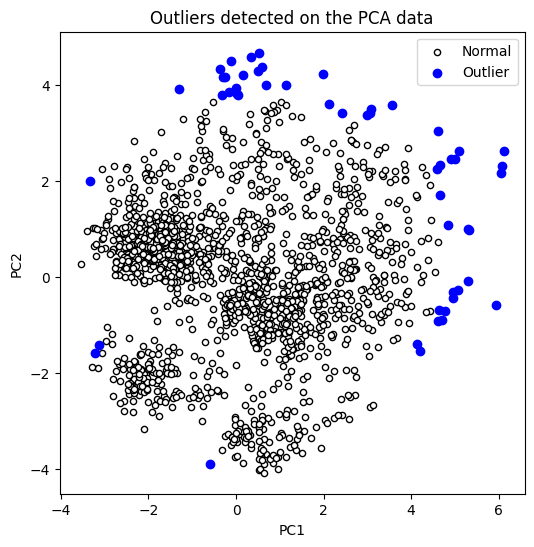

In [169]:
plt.figure(figsize =(6,6))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(test_data['PC1'], test_data['PC2'], c = 'white', s = 20, edgecolor = 'k')
plt.scatter(if_anomalies['PC1'], if_anomalies['PC2'], c = 'blue')

plt.legend(['Normal', 'Outlier'])
plt.title('Outliers detected on the PCA data')

<div class="alert alert-block alert-success">
<b>Result:</b> Outiers detected using isolation forest on the PCA dataframe
</div>

In [170]:
Hull_df2[Hull_df2_num.index.isin(if_anomalies.index)]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_severity
37779,2020160917529,2020,160917529,476395.0,449148.0,-0.837922,53.932848,16,2,1,...,1,1,1,0,0,2,1,2,E01013058,3
37823,2020160920950,2020,160920950,516907.0,473485.0,-0.211803,54.143923,16,1,1,...,1,1,4,0,0,2,1,2,E01012933,3
37829,2020160921325,2020,160921325,518976.0,468371.0,-0.182158,54.097510,16,2,1,...,1,1,1,0,0,1,1,2,E01012935,3
37851,2020160922744,2020,160922744,485785.0,407280.0,-0.706542,53.555167,16,2,3,...,6,1,1,0,3,2,1,1,E01013264,3
37857,2020160923186,2020,160923186,474897.0,447738.0,-0.861078,53.920396,16,1,1,...,6,1,1,0,0,2,1,2,E01013127,1
37859,2020160923285,2020,160923285,471186.0,440531.0,-0.919243,53.856156,16,1,1,...,1,1,1,0,0,2,1,2,E01013022,2
37875,2020160924201,2020,160924201,471334.0,455560.0,-0.913495,53.991187,16,1,1,...,4,1,1,0,0,2,2,2,E01013060,3
37942,2020160928272,2020,160928272,479054.0,414434.0,-0.806313,53.620510,16,1,2,...,6,1,1,7,0,2,1,2,E01013248,3
37963,2020160930177,2020,160930177,521002.0,412367.0,-0.173224,53.593942,16,2,1,...,6,1,2,0,0,2,1,1,E01013173,3
37989,2020160932408,2020,160932408,501919.0,469368.0,-0.442538,54.110122,16,1,1,...,6,1,1,0,7,2,1,2,E01012991,2


In [171]:
Hull_df2.index

Int64Index([37750, 37751, 37752, 37753, 37754, 37755, 37756, 37757, 37758,
            37759,
            ...
            39449, 39450, 39451, 39452, 39453, 39454, 39455, 39456, 39457,
            39458],
           dtype='int64', length=1709)

Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

In [200]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [173]:
accident_df4

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_severity
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,1,1,...,1,9,9,0,0,1,3,2,E01004576,3
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,1,2,...,1,1,1,0,0,1,1,2,E01003034,3
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,1,1,...,4,1,2,0,0,1,1,2,E01004726,3
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,1,1,...,4,1,1,0,0,1,1,2,E01003617,2
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,1,2,...,4,1,1,0,0,1,1,2,E01004763,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,1,...,1,1,1,0,0,1,1,1,-1,2
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,1,1,...,1,1,1,0,0,1,2,1,-1,3
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,1,...,1,1,1,0,0,2,1,1,-1,2
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,2,1,...,1,1,1,0,0,1,2,1,-1,3


In [328]:
y_label = accident_df4['accident_severity'].replace([1,2,3],[True, False,False])
# y_label = accident_df4['accident_severity']

In [329]:
y_label

0        False
1        False
2        False
3        False
4        False
         ...  
91194    False
91195    False
91196    False
91197    False
91198    False
Name: accident_severity, Length: 91199, dtype: bool

In [330]:
y_label.value_counts()

False    89808
True      1391
Name: accident_severity, dtype: int64

In [331]:
from imblearn.under_sampling import RandomUnderSampler


In [332]:
acc_bal, y_bal = RandomUnderSampler().fit_resample(accident_df4, y_label)

In [333]:
acc_bal = acc_bal.drop('accident_severity', axis = 1)

In [334]:
acc_bal

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020460958130,2020,460958130,549085.0,156886.0,0.136756,51.291595,46,1,1,...,0,1,1,1,4,7,2,1,2,E01024416
1,2020460959603,2020,460959603,585106.0,155871.0,0.652294,51.271920,46,2,1,...,0,1,1,1,0,0,2,1,2,E01024387
2,2020500996456,2020,500996456,246472.0,55217.0,-4.160573,50.376746,50,2,2,...,0,1,1,2,0,0,1,1,2,E01015173
3,2020622000406,2020,622000406,316498.0,177356.0,-3.204072,51.488964,62,2,1,...,0,1,1,1,0,0,2,1,2,W01001858
4,2020010279055,2020,010279055,534418.0,182630.0,-0.063709,51.526594,1,2,1,...,0,4,1,1,0,0,1,1,2,E01004203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,2020991006874,2020,991006874,254367.0,661245.0,-4.326142,55.822415,99,1,1,...,0,4,1,2,0,0,1,1,1,-1
2778,2020991009077,2020,991009077,270790.0,659812.0,-4.063523,55.814225,99,2,1,...,0,6,1,2,0,0,1,1,1,-1
2779,2020991010035,2020,991010035,113410.0,903322.0,-6.842655,57.926736,99,1,1,...,0,1,1,1,0,0,2,1,1,-1
2780,2020991010115,2020,991010115,381609.0,654146.0,-2.294786,55.780278,99,2,1,...,0,1,1,2,0,0,2,1,1,-1


In [335]:
y_bal

0       False
1       False
2       False
3       False
4       False
        ...  
2777     True
2778     True
2779     True
2780     True
2781     True
Name: accident_severity, Length: 2782, dtype: bool

acc_bal and y_bal will be used for all classification attempts

In [352]:
acc_bal_numeric = acc_bal.select_dtypes([np.number])
selector = SelectKBest(f_classif, k=10)
selector.fit(acc_bal_numeric, y_bal)

SelectKBest()

In [353]:
mask = selector.get_support()

In [354]:
names = selector.feature_names_in_[mask]

In [355]:
names

array(['location_northing_osgr', 'latitude', 'police_force',
       'number_of_casualties', 'local_authority_district', 'speed_limit',
       'second_road_class', 'second_road_number', 'urban_or_rural_area',
       'did_police_officer_attend_scene_of_accident'], dtype=object)

In [356]:
scores = selector.scores_[mask]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'location_northing_osgr'),
  Text(1, 0, 'latitude'),
  Text(2, 0, 'police_force'),
  Text(3, 0, 'number_of_casualties'),
  Text(4, 0, 'local_authority_district'),
  Text(5, 0, 'speed_limit'),
  Text(6, 0, 'second_road_class'),
  Text(7, 0, 'second_road_number'),
  Text(8, 0, 'urban_or_rural_area'),
  Text(9, 0, 'did_police_officer_attend_scene_of_accident')])

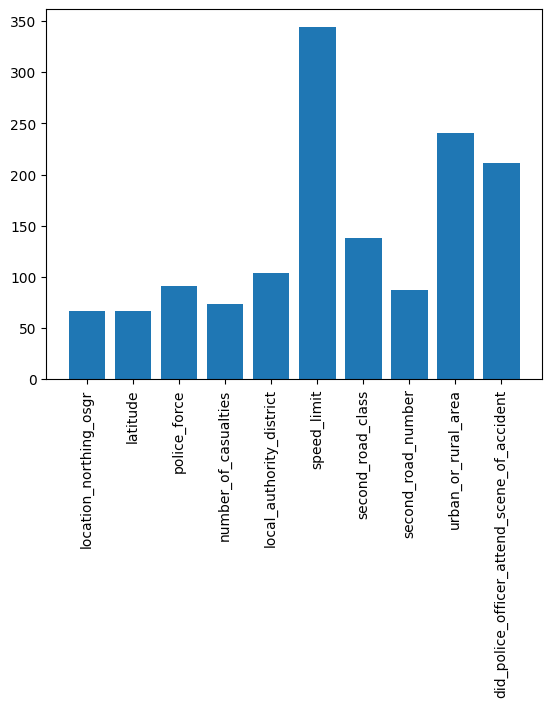

In [357]:
plt.bar(names, scores)
plt.xticks(rotation = 'vertical')

In [358]:
acc_bal_best = acc_bal[names]

In [359]:
acc_bal_best

,location_northing_osgr,latitude,police_force,number_of_casualties,local_authority_district,speed_limit,second_road_class,second_road_number,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,156886.0,51.291595,46,1,538,60,0,3384,2,1
1,155871.0,51.271920,46,1,536,30,0,386,2,1
2,55217.0,50.376746,50,2,583,30,6,0,1,1
3,177356.0,51.488964,62,1,741,20,6,0,2,1
4,182630.0,51.526594,1,1,5,20,3,1209,1,1
...,...,...,...,...,...,...,...,...,...,...
2777,661245.0,55.822415,99,1,926,40,0,8058,1,1
2778,659812.0,55.814225,99,1,938,70,0,931,1,1
2779,903322.0,57.926736,99,1,941,60,0,9000,2,1
2780,654146.0,55.780278,99,1,914,60,0,755,2,1


Functions

In [360]:
from sklearn.model_selection import train_test_split

In [361]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [362]:
def train_test(input_x, input_y):
    return train_test_split(input_x, input_y, test_size = 0.2, random_state = 42)
    
    
def decision_tree(input_xtrain, input_xtest, input_ytrain, input_ytest):
    tree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 100, criterion = 'gini')
    tree.fit(input_xtrain, input_ytrain)
    prediction = tree.predict(input_xtest)
    
    acc = accuracy_score(input_ytest, prediction)
    results_tree = cross_validate(tree, xtrain, ytrain, cv = 5, scoring = 'accuracy', return_estimator = True)
    print(f'The accuracy of decision tree model is {acc*100} %')
    print(classification_report(ytest, prediction))
    print('*****************Using crossvalitdation************************')
    print(results_tree)
    print('**************************************************')    
    
def randomforest(input_xtrain, input_xtest, input_ytrain, input_ytest):
    randomforest = RandomForestClassifier(max_depth = 4, min_samples_leaf = 100, criterion = 'gini')
    randomforest.fit(input_xtrain, input_ytrain)
    prediction = randomforest.predict(input_xtest)
    
    acc = accuracy_score(input_ytest, prediction)
    print(f'The accuracy of random forest model is {acc*100} %')
    print(classification_report(ytest, prediction))

In [363]:
xtrain, xtest, ytrain, ytest = train_test(acc_bal_best, y_bal)

In [364]:
print(len(xtrain), len(ytrain))

2225 2225


In [365]:
decision_tree(xtrain, xtest, ytrain, ytest)
randomforest(xtrain, xtest, ytrain, ytest)

The accuracy of decision tree model is 69.12028725314184 %
              precision    recall  f1-score   support

       False       0.73      0.60      0.66       277
        True       0.66      0.78      0.72       280

    accuracy                           0.69       557
   macro avg       0.70      0.69      0.69       557
weighted avg       0.70      0.69      0.69       557

*****************Using crossvalitdation************************
{'fit_time': array([0.00402236, 0.00398922, 0.0039866 , 0.00299239, 0.00399017]), 'score_time': array([0.00199223, 0.00099707, 0.00100064, 0.00199366, 0.00096631]), 'estimator': [DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100)], 'test_score': array([0.68764045, 0.69213483, 0.66292135, 0.6494382 , 0.6988

<div class="alert alert-block alert-success">
<b>Result:</b> On a balanced dataset the accuracy for decision tree is better
</div>

Other classifiers

In [350]:
def classify(trained_xval_scaled, test_xval_scaled, trained_yval, test_yval):
    from sklearn.metrics import classification_report, confusion_matrix
    
    def logReg(trained_xval_scaled, test_xval_scaled, test_yval):
        from sklearn.linear_model import LogisticRegression
        model = LogisticRegression()
        model.fit(trained_xval_scaled,trained_yval)
        pred_log = model.predict(test_xval_scaled)
        
        log_result = classification_report(test_yval, pred_log)
        log_acc = accuracy_score(test_yval, pred_log)
        return log_result, log_acc
    
    def svc(trained_xval_scaled,test_xval_scaled, trained_yval):
        from sklearn.svm import SVC
        model = SVC()
        model.fit(trained_xval_scaled,trained_yval)
        pred_svc = model.predict(test_xval_scaled)
        svc_result = classification_report(test_yval, pred_svc)

        svc_acc = accuracy_score(test_yval, pred_svc)
        return svc_result, svc_acc
    
    def KNN(trained_xval_scaled,test_xval_scaled, test_yval):
        from sklearn.neighbors import KNeighborsClassifier
        model = KNeighborsClassifier()
        model.fit(trained_xval_scaled,trained_yval)
        pred_knn = model.predict(test_xval_scaled)
        knn_result = classification_report(test_yval, pred_knn)
        knn_acc = accuracy_score(test_yval, pred_knn)
        
        return knn_result, knn_acc
    
    def Gaussian(trained_xval_scaled,test_xval_scaled, test_yval):
        from sklearn.naive_bayes import GaussianNB
        model = GaussianNB()
        model.fit(trained_xval_scaled,trained_yval)
        pred_gaussian = model.predict(test_xval_scaled)
        gaussian_result = classification_report(test_yval, pred_gaussian)
        gaussian_acc = accuracy_score(test_yval, pred_gaussian)

        return gaussian_result, gaussian_acc
    
    
    a1, a2 =  logReg(trained_xval_scaled, test_xval_scaled, test_yval)   

    print('Logistic Classification Report:')
    print(a1)
    print('logistic model accuracy:')
    print(a2)
    
    b1, b2 = svc(trained_xval_scaled,test_xval_scaled, trained_yval)
    print('Support Vector Classification Report:')
    print(b1)
    print('Support Vector accuracy:')
    print(b2)

    c1, c2 = KNN(trained_xval_scaled,test_xval_scaled, test_yval)
    print('Knearest Classification Report:')
    print(c1)
    print('Knearest accuracy:')
    print(c2)

    d1, d2 = Gaussian(trained_xval_scaled,test_xval_scaled, test_yval)
    print('Gaussian Classification Report:')
    print(d1)
    print('Gaussian Accuracy:')
    print(d2)
    

In [366]:
classify(xtrain, xtest, ytrain, ytest)

Logistic Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.38      0.48       277
        True       0.56      0.79      0.66       280

    accuracy                           0.59       557
   macro avg       0.60      0.59      0.57       557
weighted avg       0.60      0.59      0.57       557

logistic model accuracy:
0.5870736086175943
Support Vector Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.60      0.57       277
        True       0.57      0.51      0.54       280

    accuracy                           0.56       557
   macro avg       0.56      0.56      0.56       557
weighted avg       0.56      0.56      0.56       557

Support Vector accuracy:
0.5565529622980251
Knearest Classification Report:
              precision    recall  f1-score   support

       False       0.58      0.54      0.56       277
        True       0.57      0.61      0.59    

 #### lets merge data
 
 - Get the index of the balanced data to a list
- Use index to get the required information from the database.   

In [367]:
index = acc_bal.accident_index

In [368]:
index =list(index)

In [369]:
index

['2020460958130',
 '2020460959603',
 '2020500996456',
 '2020622000406',
 '2020010279055',
 '2020470985402',
 '2020320648572',
 '2020210935566',
 '2020040952998',
 '202031A116920',
 '2020010228351',
 '2020052002717',
 '2020430428590',
 '2020360978537',
 '2020990963763',
 '2020200989179',
 '2020010235834',
 '2020440401677',
 '2020411009650',
 '2020010248280',
 '2020030958899',
 '2020010242589',
 '2020990973146',
 '2020450949220',
 '202060Y139299',
 '2020010278389',
 '2020010247819',
 '2020160957094',
 '2020010268996',
 '202006F268660',
 '2020040982110',
 '202006A275566',
 '202006E169316',
 '2020010280735',
 '202031C086120',
 '2020052001635',
 '2020320355138',
 '2020460923571',
 '2020010264594',
 '2020450988252',
 '2020010251673',
 '2020010234896',
 '2020230931674',
 '2020470955155',
 '2020320073285',
 '202031A036120',
 '202031A092520',
 '2020350948993',
 '2020421010424',
 '2020052001838',
 '2020420970978',
 '2020010281640',
 '2020990985677',
 '2020530964224',
 '2020450994689',
 '20204509

In [372]:
vehicle_data = cur.execute('''
            SELECT
    *
from
    vehicle
where
    accident_index in ('2020460958130', '2020460959603', '2020500996456', '2020622000406', '2020010279055', '2020470985402', '2020320648572', '2020210935566', '2020040952998', '202031A116920', '2020010228351', '2020052002717', '2020430428590', '2020360978537', '2020990963763', '2020200989179', '2020010235834', '2020440401677', '2020411009650', '2020010248280', '2020030958899', '2020010242589', '2020990973146', '2020450949220', '202060Y139299', '2020010278389', '2020010247819', '2020160957094', '2020010268996', '202006F268660', '2020040982110', '202006A275566', '202006E169316', '2020010280735', '202031C086120', '2020052001635', '2020320355138', '2020460923571', '2020010264594', '2020450988252', '2020010251673', '2020010234896', '2020230931674', '2020470955155', '2020320073285', '202031A036120', '202031A092520', '2020350948993', '2020421010424', '2020052001838', '2020420970978', '2020010281640', '2020990985677', '2020530964224', '2020450994689', '2020450968974', '2020440075103', '2020040928176', '2020500944251', '2020370953266', '2020030934029', '2020440205565', '202063A052920', '2020500983867', '2020010248068', '2020070358386', '2020100995505', '2020201015423', '2020052000089', '2020990982041', '2020140926361', '2020440010934', '2020990950189', '2020520000145', '2020460995568', '2020100972189', '2020990996412', '2020010276486', '2020430149691', '2020052000283', '2020052000769', '2020460926535', '2020420982765', '2020140941892', '2020010282107', '2020361014553', '2020351009643', '2020010276706', '202031B015020', '2020110938621', '2020010276120', '2020230963315', '2020350944144', '2020421003185', '2020450949167', '202006A173514', '2020010275891', '2020010274062', '2020010265216', '2020471000515', '2020201011517', '2020010258879', '2020111010685', '2020460964926', '2020530990951', '2020170M10080', '202031B026720', '2020470960281', '2020460995898', '2020220979707', '2020100955896', '2020990931083', '2020470981403', '2020421008665', '2020540206119', '2020990986844', '2020010250567', '2020500949042', '2020460919609', '2020040953651', '202063D042120', '2020470988701', '2020220983661', '2020360939502', '2020010249571', '2020990932921', '2020990941969', '2020420924545', '2020500975728', '2020040980418', '2020010283017', '2020332000516', '2020420964865', '2020461010056', '2020010238779', '2020230965324', '2020471003042', '2020010230291', '2020070401750', '2020340S05462', '2020010276386', '2020400991113', '2020420926799', '2020010263297', '2020140990245', '2020470918175', '2020610024120', '202006A268260', '2020471010182', '2020010267809', '2020052001248', '2020320613433', '2020010268767', '2020340N06062', '2020460984689', '2020200963281', '2020040975535', '202031A084520', '2020101008532', '2020340D03702', '2020302000360', '2020461012656', '2020410951770', '2020549188320', '2020010274845', '2020010257576', '2020010264804', '2020990974673', '2020160964258', '2020430238470', '2020302001641', '2020361013252', '2020450934792', '2020230991958', '2020440490661', '2020010283504', '2020461011217', '2020990983823', '2020302000194', '2020440336703', '2020010267513', '2020360953890', '2020040920693', '2020332000719', '2020010281071', '2020350935248', '2020010262652', '2020210936353', '2020991000476', '2020140937470', '2020110995985', '2020460942961', '2020990996404', '2020400957465', '2020030998356', '2020010230905', '2020070529397', '2020522000141', '2020040953644', '2020010265708', '2020470940467', '2020010239363', '2020010280958', '2020470961027', '2020137CT0659', '202031A073120', '2020010239834', '2020610019420', '2020410995965', '2020010274333', '2020220930180', '2020052001900', '2020010238024', '2020421001519', '2020201000650', '2020100932300', '2020450937693', '2020040996045', '2020210972440', '2020440389408', '2020420928388', '2020010263500', '2020010281423', '20201379R1462', '2020010270969', '2020430356047', '2020548083420', '2020200960577', '2020302001419', '2020140915356', '2020990999956', '2020430394799', '2020461006092', '2020200942425', '2020230969195', '2020430353885', '2020622000428', '2020622000821', '2020010252512', '2020530961994', '2020360928635', '2020040914725', '2020522101186', '2020060982031', '2020440093224', '2020110948276', '2020420926881', '2020010249612', '2020440220371', '2020370940714', '2020010256626', '202006M272517', '2020140948067', '2020470946871', '2020990973210', '2020010236206', '2020010282468', '2020010281884', '2020122000369', '2020070755538', '2020140924913', '2020340N08802', '202054B331620', '2020420983271', '2020552000139', '2020360964002', '2020340N08982', '202031D052120', '2020010276151', '2020220936464', '2020622000815', '2020990967548', '2020010273296', '2020350976451', '2020010253895', '2020010250240', '2020471006705', '2020010283534', '202006A169036', '2020622000974', '2020420961630', '2020010269259', '2020371006374', '2020052002281', '2020010242449', '2020200929339', '2020010286857', '2020500972372', '2020010257032', '2020351002678', '2020010244792', '2020010237913', '2020010282747', '2020010253165', '2020200995209', '2020460972637', '202006M270626', '2020200994350', '2020137350592', '2020420917040', '2020320510667', '2020052000945', '2020522004226', '2020990955698', '2020501015737', '2020010260950', '2020410944613', '2020522101228', '202031B056420', '2020340N05812', '2020100926035', '2020040991471', '2020332000122', '202054C082220', '2020052000400', '2020122001105', '2020010268439', '2020100929914', '2020460948503', '2020460962267', '2020010243550', '2020070054047', '2020990938181', '2020500928563', '2020160932224', '2020990965089', '20201379K1374', '2020010244913', '2020052000500', '2020450922762', '2020302000862', '2020360937644', '2020160935359', '2020500933855', '2020070604964', '2020010230129', '2020622000275', '2020010236049', '2020480992250', '2020350986612', '2020622001068', '2020122001083', '2020200984220', '2020010285784', '2020052000690', '2020010284133', '2020332000706', '2020010279335', '2020410932085', '2020500966926', '2020030997165', '2020201002109', '2020230962619', '2020990973932', '2020010260026', '2020010266559', '2020420971318', '2020430280759', '2020122001117', '2020010233678', '2020010248044', '2020010248273', '2020990952308', '2020010265687', '2020470965876', '2020360965739', '2020140960632', '2020549494420', '2020010249594', '2020041005634', '202031B142720', '2020461006573', '2020990988544', '2020340N05942', '2020160948494', '2020137CH0566', '2020137AV0704', '2020440227498', '2020201019425', '2020520002097', '202054C274420', '2020547218220', '2020010270828', '2020450940400', '20201377N0459', '2020460954896', '202006G177536', '2020420955765', '2020122001046', '2020470938982', '2020461022957', '2020440092280', '2020440476213', '2020200994415', '20201375B1080', '2020320625037', '2020052002129', '2020040983051', '2020991029573', '202006N173069', '2020351005435', '2020430013090', '2020991008625', '2020470939980', '2020010274362', '2020010241495', '2020410975019', '202063A059620', '2020200961476', '202063A048120', '2020622001059', '2020122000208', '2020400988506', '2020070022097', '2020460975779', '2020460991806', '2020201019028', '2020137390231', '2020010231290', '2020440332988', '2020470924920', '2020480946909', '2020430161758', '202031D115220', '2020010286811', '2020010237667', '2020170S11670', '2020332001249', '2020010258846', '2020400924396', '2020461008725', '2020010275658', '2020010254534', '2020040940996', '2020332000357', '2020010263649', '2020010264900', '2020010237715', '2020990981681', '2020100915451', '2020990986687', '2020010286512', '2020332000985', '2020010273892', '202006P172487', '2020160945436', '2020461002006', '2020030978881', '2020470923135', '2020990964687', '2020201015393', '2020137150476', '2020010276091', '2020010242944', '2020400935314', '2020010264940', '2020552100207', '2020440121360', '2020010234841', '20201378J0757', '2020010243937', '2020420964809', '2020041018498', '2020160945527', '20201371D1346', '2020010228971', '202006F168172', '2020460952329', '2020010261756', '2020450935184', '2020137CI0746', '2020302000246', '2020302001068', '202031D071420', '2020460924048', '2020010263359', '2020430324842', '2020440389261', '2020990953110', '2020350928561', '202031C089620', '2020010268538', '2020010269660', '2020010253293', '2020010242828', '202060Y139314', '2020430023835', '20201377P1621', '2020010253040', '2020350995323', '2020440228739', '2020010269633', '2020552000922', '2020220940649', '2020221011915', '2020200987681', '2020010235862', '2020470965359', '2020200991326', '2020211024248', '2020470962591', '2020010259035', '2020137880928', '2020350966786', '20201377S0715', '2020340N06782', '2020052001538', '2020211007137', '2020010248706', '2020160955819', '2020440025533', '2020010284184', '2020110973016', '202031D075220', '2020052002475', '2020010234771', '2020522002568', '2020420960308', '2020500966061', '2020460990337', '2020140951470', '2020500929589', '2020160987125', '2020430140387', '20201378C0676', '2020990918101', '2020200970021', '20201371D1428', '2020622000259', '20201376E0511', '2020010285498', '2020520004698', '2020552000765', '2020100923164', '2020140967350', '2020302001345', '2020070455332', '2020170H10340', '2020010232094', '2020070551296', '2020430070901', '20201372P0762', '2020440420899', '2020010272498', '2020460987610', '2020320516836', '2020990991708', '2020140933967', '2020340N07032', '2020440287653', '2020010275390', '2020450962001', '2020010233828', '2020549779220', '2020460974088', '2020471005641', '2020030995355', '2020010253264', '2020320607238', '2020200995456', '2020991010543', '2020010263888', '2020010284934', '202031D027420', '2020010269987', '2020410940491', '2020420922293', '2020461000533', '2020522000726', '20201377J0812', '2020320535524', '2020010233721', '2020320680208', '2020460969490', '2020010253666', '2020010260689', '2020010250064', '2020137BG1642', '2020430165791', '2020470952149', '2020450950123', '2020421008593', '2020460944920', '2020622000731', '2020010265664', '2020360953684', '2020010277434', '2020201020660', '2020200962897', '2020440143940', '2020010261252', '202006E371664', '2020522101113', '2020522004755', '202006E268020', '2020040969434', '2020010233477', '2020991008422', '2020351001892', '2020400991792', '2020010269648', '202006A273109', '2020420963338', '2020040984328', '2020010230362', '20201372I1256', '2020140985274', '2020440222045', '2020010269848', '2020170M10170', '2020990989080', '2020010234731', '2020360974485', '2020400973375', '2020440085965', '2020420971090', '2020320023404', '2020440465568', '2020200979634', '2020010228977', '20201378T1276', '2020010243176', '2020010251675', '2020110923942', '2020230933635', '2020010268083', '2020370957118', '2020010251921', '2020320467678', '2020530935353', '2020010261261', '2020140937528', '2020460972983', '2020200985328', '2020010261003', '2020010277165', '2020041000505', '202063D010620', '2020010272504', '2020010259592', '2020552001153', '20201379S1655', '2020010252771', '2020122000621', '2020040970028', '2020010275442', '2020470980713', '2020450923701', '2020990925543', '2020200970344', '2020010247882', '202060Y139421', '2020370945601', '2020070438339', '2020500946165', '2020430029613', '2020520004439', '2020360953797', '2020211007253', '2020500939596', '2020010267172', '2020470936146', '2020010264509', '2020520100448', '2020010249556', '2020200945840', '2020410964351', '2020552000402', '2020010257906', '2020010249225', '2020430071203', '2020010261791', '2020030935516', '2020010237710', '2020010235694', '2020010252956', '2020545363420', '2020070502819', '2020010266539', '2020141003699', '2020420992648', '2020010260686', '2020010272130', '2020440326115', '2020010240956', '2020622000197', '2020340N01032', '2020470944719', '2020010258039', '2020010242915', '2020500933985', '2020010253776', '2020332000056', '2020010273458', '2020470963915', '2020991004408', '2020010282358', '2020141003050', '2020340D02042', '2020010245540', '2020070143581', '2020141001961', '2020420983220', '2020010248237', '2020440328556', '2020100950853', '2020320592010', '2020010236470', '2020411011127', '2020010266074', '2020430046212', '2020052002326', '2020010259586', '2020010245677', '2020010241622', '2020320589975', '2020302000256', '2020160967556', '2020010281899', '2020010251463', '2020111009495', '2020052002329', '2020122000832', '2020220983741', '2020010231734', '2020410950485', '2020460971811', '2020990965407', '2020440340962', '2020010253784', '2020040937946', '2020200956377', '2020450998608', '2020010283441', '2020360972473', '2020101009488', '2020100925977', '2020140988786', '2020052001648', '2020052000496', '2020440354457', '2020010284071', '2020137231586', '2020010258734', '2020010282758', '2020470985754', '2020440228537', '2020410938880', '2020500936455', '2020200969164', '2020320287211', '2020110961478', '2020160946947', '2020430305529', '2020500928729', '2020200931716', '2020010233148', '2020460982194', '2020520101593', '2020430297751', '2020430137238', '2020450936923', '2020010258679', '2020440283380', '2020450930715', '2020010270541', '2020340W05302', '2020320140079', '202031A038820', '2020340W05822', '2020400920077', '2020010271802', '2020010250359', '2020522002544', '2020332001222', '2020200929902', '2020440150438', '2020140988735', '2020430064059', '2020010268535', '2020520100343', '2020010233865', '2020010266357', '2020070521686', '2020320563484', '2020450975167', '2020200985737', '2020201019578', '2020302001545', '2020200980717', '2020401003245', '2020137261170', '2020440044724', '2020522101373', '2020552001181', '20201377N0909', '2020110968089', '2020010268644', '2020010232606', '2020010249737', '2020430026818', '2020052000538', '2020140967633', '2020990928367', '2020420928456', '2020340D03822', '2020460979137', '2020332000110', '2020140923241', '2020320408071', '2020010247058', '2020010257301', '2020010229561', '2020991004522', '2020010257722', '2020440427636', '202063A054020', '2020230940056', '2020990998726', '202031D108220', '2020010249410', '2020200945905', '2020500921847', '2020040988258', '2020060998310', '2020470989189', '2020010234030', '2020470930057', '2020450994781', '2020040953390', '2020010268941', '2020420933430', '2020010258080', '2020010253032', '2020302000334', '2020040961913', '2020420971500', '2020137B71564', '2020010242325', '2020010268140', '2020010285233', '2020010285071', '2020430297605', '2020070556987', '2020070298024', '2020010285079', '2020411000773', '2020010265026', '202031C085420', '2020351003693', '2020622001103', '202063D040320', '2020010249167', '2020470945490', '2020010269135', '2020137BB1700', '2020360976196', '2020302000722', '2020137A70367', '2020010258533', '2020052000549', '2020010262531', '202031C162720', '202031D081520', '2020101002412', '2020221001737', '2020500949714', '2020010250896', '2020430252737', '2020010256531', '2020200943931', '2020420992033', '2020990984793', '2020010268836', '2020160923759', '2020430424791', '2020440075817', '2020010250993', '2020522000802', '2020500965657', '2020010284962', '2020460940779', '2020010275168', '2020110973579', '2020100972674', '20201376H1515', '2020520101220', '2020430279640', '2020430390967', '2020010260582', '2020010246719', '2020470932855', '2020460973804', '2020200946943', '2020450939925', '2020010267438', '2020030921537', '2020991024039', '2020010283389', '2020411014227', '2020010258312', '2020420972746', '2020010250647', '2020160999923', '2020140992653', '2020320043376', '2020340W02142', '2020470961326', '2020622000422', '2020460940515', '2020501007551', '2020530935863', '2020230925248', '2020450995776', '2020040940129', '2020010275148', '2020470918275', '202031C156720', '2020010249398', '2020430343611', '2020040920020', '2020140989794', '202031B046320', '2020220994493', '2020122000940', '202060Y020821', '2020110962317', '2020610023120', '2020010241724', '2020052001104', '202060Y174130', '2020530990360', '202031C090220', '2020470994829', '2020400998676', '20201379A0895', '202006J273608', '2020420989586', '2020040972352', '2020010235613', '2020010251420', '2020430032606', '2020440021454', '2020010255878', '2020010242757', '2020010287276', '202063C057720', '2020160981992', '2020052002259', '20201372G0418', '2020450965382', '202063B050420', '2020450925268', '2020411005159', '202006J176362', '2020160950228', '2020990967008', '2020010256680', '2020470991412', '2020470949922', '2020052002095', '2020137AR1265', '2020430086993', '2020070485901', '2020340C03302', '2020010278304', '2020400936081', '2020432003773', '2020461013146', '2020160998803', '2020552000302', '2020010246535', '2020170M20320', '2020041011173', '2020030956516', '2020010262953', '2020470942673', '2020350934104', '2020040991663', '2020010243805', '2020302000343', '2020450960600', '2020370997656', '2020360944437', '2020170L20140', '202054A679020', '2020420938954', '2020220987388', '2020450978343', '2020420938820', '2020320271635', '2020010248703', '2020010266491', '2020622000798', '2020302000851', '2020430271192', '2020010265709', '2020122000959', '2020010233029', '2020410946087', '2020160999497', '202006L175221', '2020522100740', '2020410952814', '2020460971087', '2020140943407', '2020200946213', '2020010248589', '2020010258487', '2020010236072', '2020110974342', '2020010242871', '2020052000242', '2020990980647', '2020530920237', '2020140959483', '20201379U0473', '2020420958280', '2020122000166', '2020010259543', '2020010262433', '2020470972009', '2020052001173', '2020010257919', '2020160998848', '2020990939235', '2020332000559', '20201376O0892', '2020010262046', '2020052001035', '2020160987236', '2020221001365', '2020430023909', '2020010266572', '2020545725520', '2020010257067', '202006XP75131', '2020122000340', '2020010242076', '2020010250347', '2020302001500', '2020522004411', '2020040992853', '202006K172895', '2020010283311', '2020010261622', '2020200937300', '202031A140120', '20201373G1127', '2020010244962', '2020010240359', '2020010262865', '20201376D1655', '2020010231807', '2020302000955', '2020400919548', '2020010277791', '2020010266582', '2020991007321', '2020552000579', '2020471004862', '2020230945844', '2020041005611', '2020320458743', '2020010267851', '2020522100617', '2020010272097', '2020610032620', '2020030958033', '2020010258254', '2020332000005', '2020520101349', '2020552000785', '2020542785820', '2020450941982', '2020450945858', '2020010274519', '2020040997766', '2020990989158', '2020351009347', '2020501007571', '2020041013023', '2020470927139', '2020220943058', '2020010269980', '2020430021523', '2020140968396', '2020450964252', '2020470947924', '2020010236186', '2020010240815', '2020010262467', '2020010238663', '202031D084320', '2020010246348', '2020470936677', '202006E467883', '2020360959774', '2020420931148', '2020122000676', '2020302000437', '2020010249038', '2020010285780', '2020010238020', '2020471010168', '2020137482035', '2020400967953', '2020010235195', '2020332000435', '2020460922020', '2020500947692', '2020460949432', '2020440294389', '2020010266804', '202031D120920', '2020201000727', '2020201013869', '2020010258580', '2020332001229', '2020370933817', '202031A039820', '2020360977055', '2020200959116', '2020460968523', '2020470966764', '2020450929680', '2020010232488', '2020040986570', '2020010256676', '2020040954363', '2020440431047', '202006A273000', '2020990968252', '2020400980585', '2020461012688', '2020010285245', '2020450925710', '2020430228664', '202006XN69893', '2020990972723', '2020200965306', '202063A068320', '2020470965251', '2020010248330', '2020420995972', '2020160992880', '2020370995888', '2020430190409', '2020420966494', '2020040965915', '202060Y009450', '20201378P0397', '2020991001169', '2020010230888', '2020470983619', '2020100972760', '2020010249079', '2020010240430', '2020010272790', '2020320664200', '2020410944835', '2020010274879', '2020470995546', '2020137131877', '2020470952996', '2020137140752', '2020010240806', '2020230975103', '2020230956766', '2020010271605', '2020100930662', '2020137A60551', '2020140930621', '2020010256101', '2020430191499', '2020461004069', '2020010272751', '2020460938887', '2020140976229', '2020010259619', '2020010240346', '2020522100693', '2020201003415', '2020010268711', '2020052000950', '2020010276062', '2020201016212', '2020010286141', '2020010264135', '2020010245837', '2020361013840', '2020411013858', '2020010283230', '2020140973679', '2020010231620', '2020160938959', '2020010266831', '2020211029967', '2020990982926', '2020420952103', '2020440455783', '2020122001393', '2020500999361', '2020010261030', '202006G274326', '2020430080173', '2020420923851', '202031C100520', '2020010231309', '2020500966616', '2020010285221', '2020100926899', '2020471005619', '2020010282529', '2020100972847', '202063D027220', '2020500979312', '2020010277521', '2020052000709', '2020420949194', '20201379I0997', '2020010256046', '2020460954486', '2020010253026', '2020450974751', '2020470996577', '2020010265518', '2020470920508', '2020231022152', '2020430392843', '2020200989447', '2020230925129', '202063A020020', '2020030973060', '2020450999842', '2020010271879', '202060Y104619', '2020030980616', '2020030976133', '2020420956364', '2020470962804', '2020201020415', '2020010261834', '2020052002307', '2020991000250', '2020200944785', '2020010257805', '2020010247386', '2020420988773', '2020460978163', '2020110937603', '2020460974090', '2020040984636', '2020201005670', '2020470989270', '2020052000840', '2020351019544', '2020010286395', '202031C088820', '2020420946146', '2020520101049', '2020052002060', '2020320299723', '2020141008199', '2020211023934', '202031B125720', '2020100962295', '2020420915438', '2020200947155', '2020010280653', '2020501007364', '2020461008633', '2020430221798', '2020460929336', '2020010273140', '2020141002695', '202006K274756', '2020010282622', '2020990957207', '2020420954700', '2020122000860', '2020010285958', '2020302000299', '2020140927252', '2020010253402', '2020470987591', '2020500984237', '2020010285463', '202031D100920', '2020420937845', '2020137AE0267', '2020450992006', '2020070084690', '2020500990075', '2020122000854', '2020010235233', '2020440407213', '2020201014476', '2020302001311', '2020201001859', '2020610003520', '202054A872220', '2020332000365', '2020010264052', '2020421000726', '2020201019434', '2020522001128', '2020361002933', '2020010265997', '2020010274844', '2020410995489', '2020210983226', '2020010253450', '2020500946732', '2020070195846', '2020010244559', '2020470950788', '2020552000475', '2020552000223', '2020010263917', '202054B385520', '2020010260868', '2020010247760', '2020040988199', '2020010256006', '2020140953901', '2020350927171', '2020530967459', '2020990920629', '2020450959006', '2020430249484', '2020010257591', '2020200936453', '2020990987804', '2020440433300', '2020160946846', '2020332000440', '2020010278727', '20201374M1254', '2020140965948', '2020450958732', '2020430148218', '20201373E0647', '2020480946861', '2020220924146', '2020622000092', '2020010233837', '2020220973842', '2020170S30750', '2020500988905', '2020440293807', '2020010255188', '2020201016248', '2020010278666', '2020010243995', '2020440236076', '202063A031720', '2020100931802', '2020530916483', '2020990958072', '2020470960788', '2020530986694', '2020411009578', '2020010242257', '2020200948728', '2020350935096', '2020522102935', '2020340N08292', '2020470944026', '2020010255976', '2020010274454', '2020010253366', '2020010252325', '2020460925345', '202063A066020', '2020070295389', '2020160956948', '2020010253574', '2020010267390', '2020100948125', '2020010241617', '2020070120986', '2020320071555', '2020201018699', '2020200957588', '2020160918773', '2020450971650', '202031C007620', '2020010284091', '202063A051920', '2020052002029', '2020010228038', '2020010228301', '2020010228334', '2020010229060', '2020010229841', '2020010231463', '2020010231711', '2020010231857', '2020010232322', '2020010232718', '2020010233032', '2020010233492', '2020010237524', '2020010237623', '2020010237692', '2020010238008', '2020010239141', '2020010239349', '2020010240990', '2020010242601', '2020010243237', '2020010243329', '2020010243422', '2020010244125', '2020010244260', '2020010244539', '2020010244580', '2020010244989', '2020010245249', '2020010245338', '2020010245788', '2020010246296', '2020010248080', '2020010248200', '2020010248765', '2020010249790', '2020010251578', '2020010251986', '2020010253636', '2020010253868', '2020010254023', '2020010254271', '2020010254705', '2020010254971', '2020010255992', '2020010256607', '2020010256675', '2020010257308', '2020010258184', '2020010258379', '2020010258482', '2020010259018', '2020010260384', '2020010260548', '2020010261564', '2020010262673', '2020010262939', '2020010264189', '2020010264608', '2020010266801', '2020010267011', '2020010267433', '2020010267646', '2020010267704', '2020010267844', '2020010269840', '2020010270083', '2020010270614', '2020010271417', '2020010272126', '2020010272134', '2020010272166', '2020010272205', '2020010273251', '2020010273418', '2020010273905', '2020010274225', '2020010274429', '2020010274632', '2020010275827', '2020010276258', '2020010277600', '2020010278852', '2020010279944', '2020010279973', '2020010280207', '2020010281833', '2020010282522', '2020010283146', '2020010283951', '2020010284666', '2020010284687', '2020010285135', '2020010293766', '2020030918233', '2020030921899', '2020030927279', '2020030928992', '2020030942550', '2020030943642', '2020030946215', '2020030957848', '2020030959320', '2020030959810', '2020030964186', '2020030971825', '2020030976356', '2020030985091', '2020031004642', '2020031006982', '2020031008847', '2020040919102', '2020040930069', '2020040932366', '2020040932369', '2020040932388', '2020040935222', '2020040949166', '2020040950786', '2020040952883', '2020040953894', '2020040954268', '2020040954924', '2020040960407', '2020040962062', '2020040967666', '2020040970419', '2020040971687', '2020040975603', '2020040977187', '2020040978381', '2020040978774', '2020040990040', '2020040996342', '2020041006499', '2020041009859', '2020052000070', '2020052000316', '2020052000520', '2020052000795', '2020052001063', '2020052001190', '2020052001855', '2020052001927', '2020052001980', '2020052002033', '2020052002075', '2020052002107', '2020052002371', '2020052002406', '2020052002465', '2020052002474', '2020052002509', '2020052002691', '202006A168509', '202006A170458', '202006A173670', '202006A175695', '202006A177345', '202006A268270', '202006A277870', '202006E266327', '202006E277790', '202006E372477', '202006F172854', '202006F274844', '202006F275264', '202006G167119', '202006G174325', '202006G176657', '202006G270914', '202006G276115', '202006G277600', '202006J269267', '202006J277872', '202006J367223', '202006J371416', '202006J377133', '202006K170846', '202006K170995', '202006K174130', '202006K177215', '202006K277537', '202006K277587', '202006K366838', '202006K367626', '202006K369452', '202006L173645', '202006L174378', '202006L268479', '202006L272011', '202006L272513', '202006L274113', '202006L278458', '202006M170454', '202006M267873', '202006M268018', '202006M269491', '202006M271431', '202006M271607', '202006M271941', '202006N177703', '202006N266831', '202006N267625', '202006N274035', '202006N275066', '202006P175117', '202006P270051', '202006P278460', '202006P366555', '202006P375296', '202006Q175795', '202006Q267949', '202006Q273685', '202006XE76570', '202006XF68217', '202006XF71447', '202006XG69318', '202006XG75087', '2020070010047', '2020070028503', '2020070046647', '2020070073775', '2020070075443', '2020070166087', '2020070227351', '2020070244176', '2020070340600', '2020070342586', '2020070367997', '2020070369800', '2020070371501', '2020070438464', '2020070468400', '2020070481092', '2020070500838', '2020070504412', '2020070546705', '2020070554988', '2020070559539', '2020070584859', '2020070643592', '2020070687515', '2020070702524', '2020070712723', '2020100917009', '2020100918666', '2020100923311', '2020100926893', '2020100928096', '2020100934303', '2020100937717', '2020100941412', '2020100946138', '2020100946161', '2020100949212', '2020100957860', '2020100972659', '2020100974603', '2020100975839', '2020100976802', '2020100976919', '2020100978746', '2020100981689', '2020100982397', '2020100986675', '2020100986766', '2020100991333', '2020100994397', '2020100994839', '2020101000477', '2020101006380', '2020101006563', '2020101006909', '2020110916064', '2020110919965', '2020110922321', '2020110933494', '2020110933496', '2020110954602', '2020110958271', '2020110962824', '2020110965542', '2020110965910', '2020110972777', '2020110972819', '2020110978664', '2020110980236', '2020110986499', '2020110988221', '2020110988578', '2020111002844', '2020111010289', '2020122000007', '2020122000014', '2020122000105', '2020122000201', '2020122000224', '2020122000233', '2020122000271', '2020122000287', '2020122000288', '2020122000290', '2020122000346', '2020122000349', '2020122000367', '2020122000419', '2020122000457', '2020122000537', '2020122000538', '2020122000546', '2020122000601', '2020122000612', '2020122000617', '2020122000618', '2020122000644', '2020122000687', '2020122000693', '2020122000694', '2020122000750', '2020122000751', '2020122000780', '2020122000858', '2020122000888', '2020122000914', '2020122000927', '2020122000928', '2020122000984', '2020122000985', '2020122001067', '2020122001227', '2020137181007', '20201371O0834', '20201372C0765', '20201372K0094', '20201372P0106', '20201372Q0498', '2020137370230', '2020137470290', '20201374K1525', '20201374L1659', '2020137590684', '20201375R0293', '20201375R1941', '2020137691253', '20201376H1067', '20201376N0259', '2020137720274', '20201377C1176', '20201377H0105', '20201378B2219', '20201378D0569', '20201378G1467', '20201378M1017', '2020137980476', '20201379K2146', '20201379O1385', '20201379S0260', '20201379T0309', '20201379U0324', '2020137A91069', '2020137AA1903', '2020137AB0533', '2020137AT0230', '2020137B40972', '2020137B51412', '2020137BJ0872', '2020137CC1302', '2020137CE0965', '2020137CF0722', '2020137CJ1904', '2020137CM1588', '2020137CR0116', '2020140915472', '2020140915759', '2020140918238', '2020140918565', '2020140929021', '2020140930638', '2020140931803', '2020140941957', '2020140943446', '2020140947189', '2020140949147', '2020140950291', '2020140951011', '2020140954818', '2020140955906', '2020140958860', '2020140959761', '2020140968775', '2020140970933', '2020140971560', '2020140985957', '2020140992889', '2020140992981', '2020140994778', '2020140995897', '2020140996387', '2020141003941', '2020141008373', '2020141008602', '2020160917506', '2020160923186', '2020160924910', '2020160945532', '2020160946370', '2020160949392', '2020160951493', '2020160951614', '2020160952295', '2020160954644', '2020160954893', '2020160955816', '2020160959200', '2020160961366', '2020160964900', '2020160966294', '2020160967080', '2020160970457', '2020160974808', '2020160976706', '2020160976717', '2020160981587', '2020160982504', '2020160985841', '2020160988247', '2020160991286', '2020160998946', '2020161000313', '2020161000935', '2020161005207', '2020161006923', '2020161007755', '2020170H10350', '2020170H10560', '2020170H10600', '2020170H10950', '2020170L10290', '2020170L10720', '2020170L10880', '2020170L20580', '2020170L21020', '2020170L31050', '2020170S21160', '2020170S21840', '2020170S31300', '2020170S40270', '2020200921234', '2020200925432', '2020200925479', '2020200925555', '2020200926077', '2020200926148', '2020200930403', '2020200935679', '2020200937328', '2020200938070', '2020200940194', '2020200943359', '2020200945720', '2020200945789', '2020200950468', '2020200951774', '2020200954404', '2020200954448', '2020200957703', '2020200965746', '2020200966123', '2020200967147', '2020200971210', '2020200971266', '2020200971543', '2020200971554', '2020200972571', '2020200980994', '2020200990582', '2020200990607', '2020200991350', '2020200993057', '2020200995076', '2020201000684', '2020201000975', '2020201001005', '2020201001039', '2020201002270', '2020201004105', '2020201006205', '2020201009885', '2020201009979', '2020201011885', '2020201011907', '2020201012777', '2020210934612', '2020210940328', '2020210946626', '2020210947625', '2020210953200', '2020210972405', '2020210972441', '2020210984595', '2020210994294', '2020210995932', '2020210996400', '2020211005227', '2020220916169', '2020220922516', '2020220922697', '2020220923411', '2020220930372', '2020220936866', '2020220942107', '2020220948408', '2020220951791', '2020220960524', '2020220967553', '2020220968105', '2020220969646', '2020220969847', '2020220971172', '2020220971400', '2020220971760', '2020220974988', '2020220977189', '2020220978718', '2020220981025', '2020220983358', '2020220983960', '2020220995492', '2020220995787', '2020220998953', '2020221005497', '2020221007964', '2020221008836', '2020221009659', '2020221012294', '2020221013371', '2020230929257', '2020230935914', '2020230942301', '2020230945919', '2020230950877', '2020230956749', '2020230965814', '2020230970365', '2020230983683', '2020230992892', '2020230999041', '2020230999267', '2020231001429', '2020231002571', '2020231017555', '2020302000073', '2020302000141', '2020302000206', '2020302000525', '2020302000697', '2020302000703', '2020302000706', '2020302000785', '2020302000790', '2020302000884', '2020302000907', '2020302000942', '2020302000945', '2020302001003', '2020302001080', '2020302001421', '202031A039620', '202031A086320', '202031A101420', '202031A103020', '202031A113020', '202031A117220', '202031A124220', '202031A168420', '202031B007220', '202031B072020', '202031B078220', '202031B135720', '202031B167220', '202031B172120', '202031C031720', '202031C033920', '202031C071920', '202031D003020', '202031D061420', '202031D109120', '2020320000150', '2020320020749', '2020320039917', '2020320046496', '2020320106174', '2020320122699', '2020320142114', '2020320159451', '2020320180254', '2020320194508', '2020320195427', '2020320195541', '2020320247083', '2020320282266', '2020320293033', '2020320304016', '2020320356744', '2020320363234', '2020320363243', '2020320364642', '2020320365507', '2020320367920', '2020320399150', '2020320408057', '2020320412093', '2020320419883', '2020320426945', '2020320447381', '2020320448930', '2020320450428', '2020320451161', '2020320453952', '2020320470478', '2020320510535', '2020320516328', '2020320528077', '2020320535936', '2020320539656', '2020320544890', '2020320547602', '2020320554210', '2020320558051', '2020320604551', '2020320630858', '2020320656908', '2020320662667', '2020320675059', '2020320680951', '2020332000009', '2020332000017', '2020332000019', '2020332000020', '2020332000165', '2020332000166', '2020332000167', '2020332000170', '2020332000230', '2020332000232', '2020332000235', '2020332000305', '2020332000368', '2020332000778', '2020332000779', '2020332000866', '2020332000867', '2020332000879', '2020332000888', '2020332000993', '2020332001014', '2020332001019', '2020332001020', '2020332001021', '2020332001022', '2020340C80112', '2020340C80182', '2020340D80052', '2020340D80072', '2020340E80022', '2020340K80132', '2020340K80172', '2020340N80082', '2020340N80122', '2020340N80142', '2020340N80162', '2020340S80032', '2020340S80042', '2020340S80092', '2020340W80012', '2020340W80062', '2020340W80102', '2020340W80192', '2020340W80202', '2020350928770', '2020350929546', '2020350930066', '2020350930650', '2020350932669', '2020350941135', '2020350942708', '2020350944048', '2020350947199', '2020350948344', '2020350951229', '2020350953403', '2020350956154', '2020350963610', '2020350967197', '2020350968877', '2020350969952', '2020350971527', '2020350974307', '2020350975744', '2020350978025', '2020350985413', '2020350992351', '2020350993997', '2020350997971', '2020350998071', '2020351000431', '2020351003168', '2020360918469', '2020360918916', '2020360921429', '2020360921454', '2020360923544', '2020360923585', '2020360926542', '2020360928655', '2020360933539', '2020360935971', '2020360938214', '2020360947540', '2020360958607', '2020360964017', '2020360968342', '2020360969192', '2020360971082', '2020360971099', '2020360972938', '2020360977455', '2020360977631', '2020360978501', '2020360978858', '2020360979918', '2020360983860', '2020360986784', '2020360989079', '2020360992042', '2020360997287', '2020361002711', '2020361003558', '2020361006804', '2020361007400', '2020361008426', '2020361009052', '2020370915863', '2020370960398', '2020370962536', '2020370965669', '2020370975455', '2020370976185', '2020370979213', '2020370993037', '2020371002018', '2020371002526', '2020400915712', '2020400926429', '2020400936615', '2020400944018', '2020400951550', '2020400961542', '2020400965388', '2020400974962', '2020400987324', '2020400994763', '2020401000879', '2020401010057', '2020410929898', '2020410930786', '2020410932359', '2020410935883', '2020410943389', '2020410944430', '2020410944908', '2020410946979', '2020410947094', '2020410951545', '2020410952642', '2020410955988', '2020410957006', '2020410969470', '2020410975557', '2020410978823', '2020410979654', '2020410981625', '2020410982647', '2020410990900', '2020410990952', '2020410999007', '2020411002138', '2020411002816', '2020411005957', '2020411009442', '2020411013110', '2020420924011', '2020420926180', '2020420928031', '2020420928326', '2020420932691', '2020420932745', '2020420939546', '2020420939694', '2020420941954', '2020420945523', '2020420946981', '2020420950556', '2020420951027', '2020420953124', '2020420953416', '2020420955302', '2020420957011', '2020420958243', '2020420959947', '2020420960315', '2020420960365', '2020420961971', '2020420962499', '2020420963770', '2020420964968', '2020420968916', '2020420968990', '2020420969053', '2020420974035', '2020420975204', '2020420976644', '2020420976892', '2020420981583', '2020420982636', '2020420983026', '2020420984699', '2020420986826', '2020420988390', '2020420990829', '2020420992906', '2020421003865', '2020421004292', '2020421008220', '2020421010068', '2020421010334', '2020421011201', '2020430012500', '2020430013712', '2020430013812', '2020430015510', '2020430023580', '2020430032497', '2020430034463', '2020430036456', '2020430055883', '2020430057996', '2020430060169', '2020430066470', '2020430072431', '2020430072445', '2020430088333', '2020430095234', '2020430097570', '2020430098402', '2020430110896', '2020430126222', '2020430137458', '2020430146502', '2020430152128', '2020430152514', '2020430162477', '2020430172312', '2020430173273', '2020430173397', '2020430186105', '2020430195501', '2020430195537', '2020430200317', '2020430205698', '2020430207606', '2020430210732', '2020430216846', '2020430218195', '2020430218834', '2020430219124', '2020430222340', '2020430239098', '2020430242509', '2020430245191', '2020430260560', '2020430269910', '2020430270171', '2020430272622', '2020430282049', '2020430297208', '2020430301105', '2020430310728', '2020430311480', '2020430319014', '2020430321914', '2020430332500', '2020430339597', '2020430340711', '2020430356961', '2020430364403', '2020430364864', '2020430376742', '2020430376767', '2020430401116', '2020430413354', '2020430415646', '2020430420555', '2020430431853', '2020440002157', '2020440011478', '2020440012614', '2020440014162', '2020440022699', '2020440023846', '2020440037998', '2020440041761', '2020440044485', '2020440050630', '2020440078958', '2020440108245', '2020440121060', '2020440127453', '2020440147495', '2020440177712', '2020440192554', '2020440202668', '2020440209847', '2020440211336', '2020440217682', '2020440222443', '2020440230693', '2020440241182', '2020440255290', '2020440257223', '2020440261950', '2020440275376', '2020440295814', '2020440303926', '2020440326531', '2020440333265', '2020440333501', '2020440360924', '2020440364768', '2020440393189', '2020440403439', '2020440425715', '2020440430388', '2020440432908', '2020440439129', '2020440444863', '2020440467791', '2020440491601', '2020440499198', '2020440499342', '2020450917576', '2020450926461', '2020450932682', '2020450935303', '2020450937610', '2020450941864', '2020450943089', '2020450945441', '2020450945603', '2020450945606', '2020450950782', '2020450951269', '2020450955410', '2020450957189', '2020450959034', '2020450963878', '2020450975742', '2020450976812', '2020450982548', '2020450985795', '2020450992821', '2020450995293', '2020450997767', '2020450998760', '2020450999621', '2020451004261', '2020451005487', '2020460917969', '2020460923331', '2020460945515', '2020460946609', '2020460950156', '2020460951624', '2020460952482', '2020460953868', '2020460957077', '2020460957169', '2020460959370', '2020460962071', '2020460962830', '2020460963505', '2020460966608', '2020460967971', '2020460969181', '2020460969744', '2020460970273', '2020460970480', '2020460971581', '2020460971613', '2020460971657', '2020460973239', '2020460974886', '2020460975910', '2020460976223', '2020460976390', '2020460982006', '2020460982693', '2020460983805', '2020460987466', '2020460990056', '2020460990588', '2020460993381', '2020460994752', '2020460996602', '2020460996941', '2020460997785', '2020460998119', '2020461000077', '2020461001959', '2020461005292', '2020461007332', '2020461008404', '2020470915310', '2020470915921', '2020470923326', '2020470925316', '2020470925866', '2020470926463', '2020470928751', '2020470930680', '2020470934330', '2020470934803', '2020470935461', '2020470937454', '2020470939452', '2020470941150', '2020470943168', '2020470947797', '2020470947970', '2020470950947', '2020470952710', '2020470954197', '2020470955271', '2020470955629', '2020470958167', '2020470959967', '2020470962429', '2020470966474', '2020470966842', '2020470968251', '2020470968377', '2020470968592', '2020470970126', '2020470971468', '2020470972366', '2020470974189', '2020470982565', '2020470983168', '2020470984643', '2020470990035', '2020471003175', '2020471004473', '2020471006640', '2020471010060', '2020500915603', '2020500919319', '2020500922153', '2020500931989', '2020500933105', '2020500938149', '2020500938159', '2020500938801', '2020500942212', '2020500943318', '2020500943730', '2020500945933', '2020500946785', '2020500950446', '2020500950589', '2020500950741', '2020500951695', '2020500955598', '2020500955613', '2020500957432', '2020500962175', '2020500962673', '2020500963945', '2020500965151', '2020500974482', '2020500975212', '2020500977461', '2020500978710', '2020500978828', '2020500979302', '2020500979849', '2020500981506', '2020500983103', '2020500987191', '2020500987606', '2020500990057', '2020500997422', '2020501002498', '2020501003527', '2020501005340', '2020501010664', '2020501013732', '2020520000293', '2020520001916', '2020520002488', '2020520003170', '2020520003818', '2020520004339', '2020520004387', '2020520004388', '2020520004440', '2020520004483', '2020520004891', '2020520005019', '2020522002866', '2020522002869', '2020522002875', '2020522002936', '2020522004082', '2020522004083', '2020522004290', '2020522004338', '2020522004495', '2020522004778', '2020522004835', '2020522004958', '2020522101476', '2020530915236', '2020530915357', '2020530918250', '2020530922755', '2020530923827', '2020530926471', '2020530936681', '2020530940773', '2020530940799', '2020530941867', '2020530944134', '2020530949195', '2020530950320', '2020530950728', '2020530954191', '2020530956712', '2020530959639', '2020530963931', '2020530965511', '2020530972814', '2020530976287', '2020530980363', '2020531006172', '2020540307620', '2020540615820', '2020541177020', '2020541959520', '2020542428720', '2020542453520', '2020542712120', '2020542890120', '2020543350520', '2020544120020', '2020544918520', '2020548164920', '2020549199420', '2020549426020', '2020549622020', '2020549623620', '202054A151520', '202054B440520', '2020552000013', '2020552000096', '2020552000113', '2020552000324', '2020552000332', '2020552000411', '2020552000666', '2020552000727', '2020552000741', '2020552000743', '2020552000882', '2020552000925', '2020552000948', '2020552000949', '2020552100173', '202060Y001980', '202060Y005114', '202060Y005277', '202060Y010575', '202060Y015161', '202060Y022708', '202060Y027144', '202060Y043920', '202060Y049943', '202060Y093786', '202060Y100773', '202060Y113659', '202060Y117409', '202060Y134933', '202060Y138444', '202060Y156226', '202060Y166764', '202060Y184403', '202060Y184495', '2020610000420', '2020610007620', '2020610011320', '2020610014420', '2020610014620', '2020610020320', '2020610039520', '2020610044020', '2020610044520', '2020610044920', '2020610046820', '2020610049620', '2020622000130', '2020622000134', '2020622000198', '2020622000283', '2020622000306', '2020622000384', '2020622000399', '2020622000420', '2020622000431', '2020622000455', '2020622000486', '2020622000508', '2020622000564', '2020622000672', '2020622000683', '2020622000724', '2020622000769', '2020622000778', '2020622000795', '2020622000800', '2020622000850', '2020622000859', '2020622001042', '2020622001089', '2020622001098', '202063AF00121', '202063AF00220', '202063AF00320', '202063AF00720', '202063AF00820', '202063AF01420', '202063BF00420', '202063BF00620', '202063BF01020', '202063CF01320', '202063DF01120', '202063DF01220', '202063DF01520', '202063DF01620', '2020990915011', '2020990916087', '2020990916591', '2020990917101', '2020990917497', '2020990917849', '2020990918280', '2020990920857', '2020990922216', '2020990922594', '2020990924156', '2020990924386', '2020990924420', '2020990925839', '2020990926479', '2020990927704', '2020990928277', '2020990928374', '2020990929618', '2020990930648', '2020990931979', '2020990932393', '2020990932697', '2020990932894', '2020990933969', '2020990935023', '2020990935372', '2020990935398', '2020990935432', '2020990936618', '2020990936680', '2020990937046', '2020990937056', '2020990937427', '2020990937720', '2020990938534', '2020990939003', '2020990939366', '2020990943173', '2020990943216', '2020990943219', '2020990945596', '2020990946925', '2020990947456', '2020990948615', '2020990953355', '2020990953858', '2020990954232', '2020990954265', '2020990955414', '2020990957187', '2020990958695', '2020990959699', '2020990959806', '2020990961030', '2020990962468', '2020990963161', '2020990964557', '2020990965296', '2020990965913', '2020990966322', '2020990966531', '2020990966562', '2020990966566', '2020990967207', '2020990967950', '2020990968677', '2020990969311', '2020990969476', '2020990970455', '2020990970473', '2020990970872', '2020990970885', '2020990973948', '2020990974777', '2020990976155', '2020990976180', '2020990976206', '2020990976655', '2020990976670', '2020990976831', '2020990976944', '2020990978402', '2020990978466', '2020990979378', '2020990980312', '2020990980391', '2020990981076', '2020990982519', '2020990982641', '2020990982684', '2020990984168', '2020990984191', '2020990984518', '2020990986685', '2020990987538', '2020990987937', '2020990989267', '2020990990940', '2020990991042', '2020990991271', '2020990991668', '2020990992920', '2020990993310', '2020990994332', '2020990995271', '2020990996761', '2020990996862', '2020990998106', '2020990998622', '2020990998731', '2020990998746', '2020991000096', '2020991000461', '2020991000926', '2020991001395', '2020991002394', '2020991002464', '2020991003490', '2020991003772', '2020991004073', '2020991004379', '2020991004392', '2020991006222', '2020991006274', '2020991006337', '2020991006537', '2020991006550', '2020991006874', '2020991009077', '2020991010035', '2020991010115', '2020991010320')
         
;
''').fetchall()

casualty_data = cur.execute('''
        SELECT
    *
from
    casualty
where
    accident_index in ('2020460958130', '2020460959603', '2020500996456', '2020622000406', '2020010279055', '2020470985402', '2020320648572', '2020210935566', '2020040952998', '202031A116920', '2020010228351', '2020052002717', '2020430428590', '2020360978537', '2020990963763', '2020200989179', '2020010235834', '2020440401677', '2020411009650', '2020010248280', '2020030958899', '2020010242589', '2020990973146', '2020450949220', '202060Y139299', '2020010278389', '2020010247819', '2020160957094', '2020010268996', '202006F268660', '2020040982110', '202006A275566', '202006E169316', '2020010280735', '202031C086120', '2020052001635', '2020320355138', '2020460923571', '2020010264594', '2020450988252', '2020010251673', '2020010234896', '2020230931674', '2020470955155', '2020320073285', '202031A036120', '202031A092520', '2020350948993', '2020421010424', '2020052001838', '2020420970978', '2020010281640', '2020990985677', '2020530964224', '2020450994689', '2020450968974', '2020440075103', '2020040928176', '2020500944251', '2020370953266', '2020030934029', '2020440205565', '202063A052920', '2020500983867', '2020010248068', '2020070358386', '2020100995505', '2020201015423', '2020052000089', '2020990982041', '2020140926361', '2020440010934', '2020990950189', '2020520000145', '2020460995568', '2020100972189', '2020990996412', '2020010276486', '2020430149691', '2020052000283', '2020052000769', '2020460926535', '2020420982765', '2020140941892', '2020010282107', '2020361014553', '2020351009643', '2020010276706', '202031B015020', '2020110938621', '2020010276120', '2020230963315', '2020350944144', '2020421003185', '2020450949167', '202006A173514', '2020010275891', '2020010274062', '2020010265216', '2020471000515', '2020201011517', '2020010258879', '2020111010685', '2020460964926', '2020530990951', '2020170M10080', '202031B026720', '2020470960281', '2020460995898', '2020220979707', '2020100955896', '2020990931083', '2020470981403', '2020421008665', '2020540206119', '2020990986844', '2020010250567', '2020500949042', '2020460919609', '2020040953651', '202063D042120', '2020470988701', '2020220983661', '2020360939502', '2020010249571', '2020990932921', '2020990941969', '2020420924545', '2020500975728', '2020040980418', '2020010283017', '2020332000516', '2020420964865', '2020461010056', '2020010238779', '2020230965324', '2020471003042', '2020010230291', '2020070401750', '2020340S05462', '2020010276386', '2020400991113', '2020420926799', '2020010263297', '2020140990245', '2020470918175', '2020610024120', '202006A268260', '2020471010182', '2020010267809', '2020052001248', '2020320613433', '2020010268767', '2020340N06062', '2020460984689', '2020200963281', '2020040975535', '202031A084520', '2020101008532', '2020340D03702', '2020302000360', '2020461012656', '2020410951770', '2020549188320', '2020010274845', '2020010257576', '2020010264804', '2020990974673', '2020160964258', '2020430238470', '2020302001641', '2020361013252', '2020450934792', '2020230991958', '2020440490661', '2020010283504', '2020461011217', '2020990983823', '2020302000194', '2020440336703', '2020010267513', '2020360953890', '2020040920693', '2020332000719', '2020010281071', '2020350935248', '2020010262652', '2020210936353', '2020991000476', '2020140937470', '2020110995985', '2020460942961', '2020990996404', '2020400957465', '2020030998356', '2020010230905', '2020070529397', '2020522000141', '2020040953644', '2020010265708', '2020470940467', '2020010239363', '2020010280958', '2020470961027', '2020137CT0659', '202031A073120', '2020010239834', '2020610019420', '2020410995965', '2020010274333', '2020220930180', '2020052001900', '2020010238024', '2020421001519', '2020201000650', '2020100932300', '2020450937693', '2020040996045', '2020210972440', '2020440389408', '2020420928388', '2020010263500', '2020010281423', '20201379R1462', '2020010270969', '2020430356047', '2020548083420', '2020200960577', '2020302001419', '2020140915356', '2020990999956', '2020430394799', '2020461006092', '2020200942425', '2020230969195', '2020430353885', '2020622000428', '2020622000821', '2020010252512', '2020530961994', '2020360928635', '2020040914725', '2020522101186', '2020060982031', '2020440093224', '2020110948276', '2020420926881', '2020010249612', '2020440220371', '2020370940714', '2020010256626', '202006M272517', '2020140948067', '2020470946871', '2020990973210', '2020010236206', '2020010282468', '2020010281884', '2020122000369', '2020070755538', '2020140924913', '2020340N08802', '202054B331620', '2020420983271', '2020552000139', '2020360964002', '2020340N08982', '202031D052120', '2020010276151', '2020220936464', '2020622000815', '2020990967548', '2020010273296', '2020350976451', '2020010253895', '2020010250240', '2020471006705', '2020010283534', '202006A169036', '2020622000974', '2020420961630', '2020010269259', '2020371006374', '2020052002281', '2020010242449', '2020200929339', '2020010286857', '2020500972372', '2020010257032', '2020351002678', '2020010244792', '2020010237913', '2020010282747', '2020010253165', '2020200995209', '2020460972637', '202006M270626', '2020200994350', '2020137350592', '2020420917040', '2020320510667', '2020052000945', '2020522004226', '2020990955698', '2020501015737', '2020010260950', '2020410944613', '2020522101228', '202031B056420', '2020340N05812', '2020100926035', '2020040991471', '2020332000122', '202054C082220', '2020052000400', '2020122001105', '2020010268439', '2020100929914', '2020460948503', '2020460962267', '2020010243550', '2020070054047', '2020990938181', '2020500928563', '2020160932224', '2020990965089', '20201379K1374', '2020010244913', '2020052000500', '2020450922762', '2020302000862', '2020360937644', '2020160935359', '2020500933855', '2020070604964', '2020010230129', '2020622000275', '2020010236049', '2020480992250', '2020350986612', '2020622001068', '2020122001083', '2020200984220', '2020010285784', '2020052000690', '2020010284133', '2020332000706', '2020010279335', '2020410932085', '2020500966926', '2020030997165', '2020201002109', '2020230962619', '2020990973932', '2020010260026', '2020010266559', '2020420971318', '2020430280759', '2020122001117', '2020010233678', '2020010248044', '2020010248273', '2020990952308', '2020010265687', '2020470965876', '2020360965739', '2020140960632', '2020549494420', '2020010249594', '2020041005634', '202031B142720', '2020461006573', '2020990988544', '2020340N05942', '2020160948494', '2020137CH0566', '2020137AV0704', '2020440227498', '2020201019425', '2020520002097', '202054C274420', '2020547218220', '2020010270828', '2020450940400', '20201377N0459', '2020460954896', '202006G177536', '2020420955765', '2020122001046', '2020470938982', '2020461022957', '2020440092280', '2020440476213', '2020200994415', '20201375B1080', '2020320625037', '2020052002129', '2020040983051', '2020991029573', '202006N173069', '2020351005435', '2020430013090', '2020991008625', '2020470939980', '2020010274362', '2020010241495', '2020410975019', '202063A059620', '2020200961476', '202063A048120', '2020622001059', '2020122000208', '2020400988506', '2020070022097', '2020460975779', '2020460991806', '2020201019028', '2020137390231', '2020010231290', '2020440332988', '2020470924920', '2020480946909', '2020430161758', '202031D115220', '2020010286811', '2020010237667', '2020170S11670', '2020332001249', '2020010258846', '2020400924396', '2020461008725', '2020010275658', '2020010254534', '2020040940996', '2020332000357', '2020010263649', '2020010264900', '2020010237715', '2020990981681', '2020100915451', '2020990986687', '2020010286512', '2020332000985', '2020010273892', '202006P172487', '2020160945436', '2020461002006', '2020030978881', '2020470923135', '2020990964687', '2020201015393', '2020137150476', '2020010276091', '2020010242944', '2020400935314', '2020010264940', '2020552100207', '2020440121360', '2020010234841', '20201378J0757', '2020010243937', '2020420964809', '2020041018498', '2020160945527', '20201371D1346', '2020010228971', '202006F168172', '2020460952329', '2020010261756', '2020450935184', '2020137CI0746', '2020302000246', '2020302001068', '202031D071420', '2020460924048', '2020010263359', '2020430324842', '2020440389261', '2020990953110', '2020350928561', '202031C089620', '2020010268538', '2020010269660', '2020010253293', '2020010242828', '202060Y139314', '2020430023835', '20201377P1621', '2020010253040', '2020350995323', '2020440228739', '2020010269633', '2020552000922', '2020220940649', '2020221011915', '2020200987681', '2020010235862', '2020470965359', '2020200991326', '2020211024248', '2020470962591', '2020010259035', '2020137880928', '2020350966786', '20201377S0715', '2020340N06782', '2020052001538', '2020211007137', '2020010248706', '2020160955819', '2020440025533', '2020010284184', '2020110973016', '202031D075220', '2020052002475', '2020010234771', '2020522002568', '2020420960308', '2020500966061', '2020460990337', '2020140951470', '2020500929589', '2020160987125', '2020430140387', '20201378C0676', '2020990918101', '2020200970021', '20201371D1428', '2020622000259', '20201376E0511', '2020010285498', '2020520004698', '2020552000765', '2020100923164', '2020140967350', '2020302001345', '2020070455332', '2020170H10340', '2020010232094', '2020070551296', '2020430070901', '20201372P0762', '2020440420899', '2020010272498', '2020460987610', '2020320516836', '2020990991708', '2020140933967', '2020340N07032', '2020440287653', '2020010275390', '2020450962001', '2020010233828', '2020549779220', '2020460974088', '2020471005641', '2020030995355', '2020010253264', '2020320607238', '2020200995456', '2020991010543', '2020010263888', '2020010284934', '202031D027420', '2020010269987', '2020410940491', '2020420922293', '2020461000533', '2020522000726', '20201377J0812', '2020320535524', '2020010233721', '2020320680208', '2020460969490', '2020010253666', '2020010260689', '2020010250064', '2020137BG1642', '2020430165791', '2020470952149', '2020450950123', '2020421008593', '2020460944920', '2020622000731', '2020010265664', '2020360953684', '2020010277434', '2020201020660', '2020200962897', '2020440143940', '2020010261252', '202006E371664', '2020522101113', '2020522004755', '202006E268020', '2020040969434', '2020010233477', '2020991008422', '2020351001892', '2020400991792', '2020010269648', '202006A273109', '2020420963338', '2020040984328', '2020010230362', '20201372I1256', '2020140985274', '2020440222045', '2020010269848', '2020170M10170', '2020990989080', '2020010234731', '2020360974485', '2020400973375', '2020440085965', '2020420971090', '2020320023404', '2020440465568', '2020200979634', '2020010228977', '20201378T1276', '2020010243176', '2020010251675', '2020110923942', '2020230933635', '2020010268083', '2020370957118', '2020010251921', '2020320467678', '2020530935353', '2020010261261', '2020140937528', '2020460972983', '2020200985328', '2020010261003', '2020010277165', '2020041000505', '202063D010620', '2020010272504', '2020010259592', '2020552001153', '20201379S1655', '2020010252771', '2020122000621', '2020040970028', '2020010275442', '2020470980713', '2020450923701', '2020990925543', '2020200970344', '2020010247882', '202060Y139421', '2020370945601', '2020070438339', '2020500946165', '2020430029613', '2020520004439', '2020360953797', '2020211007253', '2020500939596', '2020010267172', '2020470936146', '2020010264509', '2020520100448', '2020010249556', '2020200945840', '2020410964351', '2020552000402', '2020010257906', '2020010249225', '2020430071203', '2020010261791', '2020030935516', '2020010237710', '2020010235694', '2020010252956', '2020545363420', '2020070502819', '2020010266539', '2020141003699', '2020420992648', '2020010260686', '2020010272130', '2020440326115', '2020010240956', '2020622000197', '2020340N01032', '2020470944719', '2020010258039', '2020010242915', '2020500933985', '2020010253776', '2020332000056', '2020010273458', '2020470963915', '2020991004408', '2020010282358', '2020141003050', '2020340D02042', '2020010245540', '2020070143581', '2020141001961', '2020420983220', '2020010248237', '2020440328556', '2020100950853', '2020320592010', '2020010236470', '2020411011127', '2020010266074', '2020430046212', '2020052002326', '2020010259586', '2020010245677', '2020010241622', '2020320589975', '2020302000256', '2020160967556', '2020010281899', '2020010251463', '2020111009495', '2020052002329', '2020122000832', '2020220983741', '2020010231734', '2020410950485', '2020460971811', '2020990965407', '2020440340962', '2020010253784', '2020040937946', '2020200956377', '2020450998608', '2020010283441', '2020360972473', '2020101009488', '2020100925977', '2020140988786', '2020052001648', '2020052000496', '2020440354457', '2020010284071', '2020137231586', '2020010258734', '2020010282758', '2020470985754', '2020440228537', '2020410938880', '2020500936455', '2020200969164', '2020320287211', '2020110961478', '2020160946947', '2020430305529', '2020500928729', '2020200931716', '2020010233148', '2020460982194', '2020520101593', '2020430297751', '2020430137238', '2020450936923', '2020010258679', '2020440283380', '2020450930715', '2020010270541', '2020340W05302', '2020320140079', '202031A038820', '2020340W05822', '2020400920077', '2020010271802', '2020010250359', '2020522002544', '2020332001222', '2020200929902', '2020440150438', '2020140988735', '2020430064059', '2020010268535', '2020520100343', '2020010233865', '2020010266357', '2020070521686', '2020320563484', '2020450975167', '2020200985737', '2020201019578', '2020302001545', '2020200980717', '2020401003245', '2020137261170', '2020440044724', '2020522101373', '2020552001181', '20201377N0909', '2020110968089', '2020010268644', '2020010232606', '2020010249737', '2020430026818', '2020052000538', '2020140967633', '2020990928367', '2020420928456', '2020340D03822', '2020460979137', '2020332000110', '2020140923241', '2020320408071', '2020010247058', '2020010257301', '2020010229561', '2020991004522', '2020010257722', '2020440427636', '202063A054020', '2020230940056', '2020990998726', '202031D108220', '2020010249410', '2020200945905', '2020500921847', '2020040988258', '2020060998310', '2020470989189', '2020010234030', '2020470930057', '2020450994781', '2020040953390', '2020010268941', '2020420933430', '2020010258080', '2020010253032', '2020302000334', '2020040961913', '2020420971500', '2020137B71564', '2020010242325', '2020010268140', '2020010285233', '2020010285071', '2020430297605', '2020070556987', '2020070298024', '2020010285079', '2020411000773', '2020010265026', '202031C085420', '2020351003693', '2020622001103', '202063D040320', '2020010249167', '2020470945490', '2020010269135', '2020137BB1700', '2020360976196', '2020302000722', '2020137A70367', '2020010258533', '2020052000549', '2020010262531', '202031C162720', '202031D081520', '2020101002412', '2020221001737', '2020500949714', '2020010250896', '2020430252737', '2020010256531', '2020200943931', '2020420992033', '2020990984793', '2020010268836', '2020160923759', '2020430424791', '2020440075817', '2020010250993', '2020522000802', '2020500965657', '2020010284962', '2020460940779', '2020010275168', '2020110973579', '2020100972674', '20201376H1515', '2020520101220', '2020430279640', '2020430390967', '2020010260582', '2020010246719', '2020470932855', '2020460973804', '2020200946943', '2020450939925', '2020010267438', '2020030921537', '2020991024039', '2020010283389', '2020411014227', '2020010258312', '2020420972746', '2020010250647', '2020160999923', '2020140992653', '2020320043376', '2020340W02142', '2020470961326', '2020622000422', '2020460940515', '2020501007551', '2020530935863', '2020230925248', '2020450995776', '2020040940129', '2020010275148', '2020470918275', '202031C156720', '2020010249398', '2020430343611', '2020040920020', '2020140989794', '202031B046320', '2020220994493', '2020122000940', '202060Y020821', '2020110962317', '2020610023120', '2020010241724', '2020052001104', '202060Y174130', '2020530990360', '202031C090220', '2020470994829', '2020400998676', '20201379A0895', '202006J273608', '2020420989586', '2020040972352', '2020010235613', '2020010251420', '2020430032606', '2020440021454', '2020010255878', '2020010242757', '2020010287276', '202063C057720', '2020160981992', '2020052002259', '20201372G0418', '2020450965382', '202063B050420', '2020450925268', '2020411005159', '202006J176362', '2020160950228', '2020990967008', '2020010256680', '2020470991412', '2020470949922', '2020052002095', '2020137AR1265', '2020430086993', '2020070485901', '2020340C03302', '2020010278304', '2020400936081', '2020432003773', '2020461013146', '2020160998803', '2020552000302', '2020010246535', '2020170M20320', '2020041011173', '2020030956516', '2020010262953', '2020470942673', '2020350934104', '2020040991663', '2020010243805', '2020302000343', '2020450960600', '2020370997656', '2020360944437', '2020170L20140', '202054A679020', '2020420938954', '2020220987388', '2020450978343', '2020420938820', '2020320271635', '2020010248703', '2020010266491', '2020622000798', '2020302000851', '2020430271192', '2020010265709', '2020122000959', '2020010233029', '2020410946087', '2020160999497', '202006L175221', '2020522100740', '2020410952814', '2020460971087', '2020140943407', '2020200946213', '2020010248589', '2020010258487', '2020010236072', '2020110974342', '2020010242871', '2020052000242', '2020990980647', '2020530920237', '2020140959483', '20201379U0473', '2020420958280', '2020122000166', '2020010259543', '2020010262433', '2020470972009', '2020052001173', '2020010257919', '2020160998848', '2020990939235', '2020332000559', '20201376O0892', '2020010262046', '2020052001035', '2020160987236', '2020221001365', '2020430023909', '2020010266572', '2020545725520', '2020010257067', '202006XP75131', '2020122000340', '2020010242076', '2020010250347', '2020302001500', '2020522004411', '2020040992853', '202006K172895', '2020010283311', '2020010261622', '2020200937300', '202031A140120', '20201373G1127', '2020010244962', '2020010240359', '2020010262865', '20201376D1655', '2020010231807', '2020302000955', '2020400919548', '2020010277791', '2020010266582', '2020991007321', '2020552000579', '2020471004862', '2020230945844', '2020041005611', '2020320458743', '2020010267851', '2020522100617', '2020010272097', '2020610032620', '2020030958033', '2020010258254', '2020332000005', '2020520101349', '2020552000785', '2020542785820', '2020450941982', '2020450945858', '2020010274519', '2020040997766', '2020990989158', '2020351009347', '2020501007571', '2020041013023', '2020470927139', '2020220943058', '2020010269980', '2020430021523', '2020140968396', '2020450964252', '2020470947924', '2020010236186', '2020010240815', '2020010262467', '2020010238663', '202031D084320', '2020010246348', '2020470936677', '202006E467883', '2020360959774', '2020420931148', '2020122000676', '2020302000437', '2020010249038', '2020010285780', '2020010238020', '2020471010168', '2020137482035', '2020400967953', '2020010235195', '2020332000435', '2020460922020', '2020500947692', '2020460949432', '2020440294389', '2020010266804', '202031D120920', '2020201000727', '2020201013869', '2020010258580', '2020332001229', '2020370933817', '202031A039820', '2020360977055', '2020200959116', '2020460968523', '2020470966764', '2020450929680', '2020010232488', '2020040986570', '2020010256676', '2020040954363', '2020440431047', '202006A273000', '2020990968252', '2020400980585', '2020461012688', '2020010285245', '2020450925710', '2020430228664', '202006XN69893', '2020990972723', '2020200965306', '202063A068320', '2020470965251', '2020010248330', '2020420995972', '2020160992880', '2020370995888', '2020430190409', '2020420966494', '2020040965915', '202060Y009450', '20201378P0397', '2020991001169', '2020010230888', '2020470983619', '2020100972760', '2020010249079', '2020010240430', '2020010272790', '2020320664200', '2020410944835', '2020010274879', '2020470995546', '2020137131877', '2020470952996', '2020137140752', '2020010240806', '2020230975103', '2020230956766', '2020010271605', '2020100930662', '2020137A60551', '2020140930621', '2020010256101', '2020430191499', '2020461004069', '2020010272751', '2020460938887', '2020140976229', '2020010259619', '2020010240346', '2020522100693', '2020201003415', '2020010268711', '2020052000950', '2020010276062', '2020201016212', '2020010286141', '2020010264135', '2020010245837', '2020361013840', '2020411013858', '2020010283230', '2020140973679', '2020010231620', '2020160938959', '2020010266831', '2020211029967', '2020990982926', '2020420952103', '2020440455783', '2020122001393', '2020500999361', '2020010261030', '202006G274326', '2020430080173', '2020420923851', '202031C100520', '2020010231309', '2020500966616', '2020010285221', '2020100926899', '2020471005619', '2020010282529', '2020100972847', '202063D027220', '2020500979312', '2020010277521', '2020052000709', '2020420949194', '20201379I0997', '2020010256046', '2020460954486', '2020010253026', '2020450974751', '2020470996577', '2020010265518', '2020470920508', '2020231022152', '2020430392843', '2020200989447', '2020230925129', '202063A020020', '2020030973060', '2020450999842', '2020010271879', '202060Y104619', '2020030980616', '2020030976133', '2020420956364', '2020470962804', '2020201020415', '2020010261834', '2020052002307', '2020991000250', '2020200944785', '2020010257805', '2020010247386', '2020420988773', '2020460978163', '2020110937603', '2020460974090', '2020040984636', '2020201005670', '2020470989270', '2020052000840', '2020351019544', '2020010286395', '202031C088820', '2020420946146', '2020520101049', '2020052002060', '2020320299723', '2020141008199', '2020211023934', '202031B125720', '2020100962295', '2020420915438', '2020200947155', '2020010280653', '2020501007364', '2020461008633', '2020430221798', '2020460929336', '2020010273140', '2020141002695', '202006K274756', '2020010282622', '2020990957207', '2020420954700', '2020122000860', '2020010285958', '2020302000299', '2020140927252', '2020010253402', '2020470987591', '2020500984237', '2020010285463', '202031D100920', '2020420937845', '2020137AE0267', '2020450992006', '2020070084690', '2020500990075', '2020122000854', '2020010235233', '2020440407213', '2020201014476', '2020302001311', '2020201001859', '2020610003520', '202054A872220', '2020332000365', '2020010264052', '2020421000726', '2020201019434', '2020522001128', '2020361002933', '2020010265997', '2020010274844', '2020410995489', '2020210983226', '2020010253450', '2020500946732', '2020070195846', '2020010244559', '2020470950788', '2020552000475', '2020552000223', '2020010263917', '202054B385520', '2020010260868', '2020010247760', '2020040988199', '2020010256006', '2020140953901', '2020350927171', '2020530967459', '2020990920629', '2020450959006', '2020430249484', '2020010257591', '2020200936453', '2020990987804', '2020440433300', '2020160946846', '2020332000440', '2020010278727', '20201374M1254', '2020140965948', '2020450958732', '2020430148218', '20201373E0647', '2020480946861', '2020220924146', '2020622000092', '2020010233837', '2020220973842', '2020170S30750', '2020500988905', '2020440293807', '2020010255188', '2020201016248', '2020010278666', '2020010243995', '2020440236076', '202063A031720', '2020100931802', '2020530916483', '2020990958072', '2020470960788', '2020530986694', '2020411009578', '2020010242257', '2020200948728', '2020350935096', '2020522102935', '2020340N08292', '2020470944026', '2020010255976', '2020010274454', '2020010253366', '2020010252325', '2020460925345', '202063A066020', '2020070295389', '2020160956948', '2020010253574', '2020010267390', '2020100948125', '2020010241617', '2020070120986', '2020320071555', '2020201018699', '2020200957588', '2020160918773', '2020450971650', '202031C007620', '2020010284091', '202063A051920', '2020052002029', '2020010228038', '2020010228301', '2020010228334', '2020010229060', '2020010229841', '2020010231463', '2020010231711', '2020010231857', '2020010232322', '2020010232718', '2020010233032', '2020010233492', '2020010237524', '2020010237623', '2020010237692', '2020010238008', '2020010239141', '2020010239349', '2020010240990', '2020010242601', '2020010243237', '2020010243329', '2020010243422', '2020010244125', '2020010244260', '2020010244539', '2020010244580', '2020010244989', '2020010245249', '2020010245338', '2020010245788', '2020010246296', '2020010248080', '2020010248200', '2020010248765', '2020010249790', '2020010251578', '2020010251986', '2020010253636', '2020010253868', '2020010254023', '2020010254271', '2020010254705', '2020010254971', '2020010255992', '2020010256607', '2020010256675', '2020010257308', '2020010258184', '2020010258379', '2020010258482', '2020010259018', '2020010260384', '2020010260548', '2020010261564', '2020010262673', '2020010262939', '2020010264189', '2020010264608', '2020010266801', '2020010267011', '2020010267433', '2020010267646', '2020010267704', '2020010267844', '2020010269840', '2020010270083', '2020010270614', '2020010271417', '2020010272126', '2020010272134', '2020010272166', '2020010272205', '2020010273251', '2020010273418', '2020010273905', '2020010274225', '2020010274429', '2020010274632', '2020010275827', '2020010276258', '2020010277600', '2020010278852', '2020010279944', '2020010279973', '2020010280207', '2020010281833', '2020010282522', '2020010283146', '2020010283951', '2020010284666', '2020010284687', '2020010285135', '2020010293766', '2020030918233', '2020030921899', '2020030927279', '2020030928992', '2020030942550', '2020030943642', '2020030946215', '2020030957848', '2020030959320', '2020030959810', '2020030964186', '2020030971825', '2020030976356', '2020030985091', '2020031004642', '2020031006982', '2020031008847', '2020040919102', '2020040930069', '2020040932366', '2020040932369', '2020040932388', '2020040935222', '2020040949166', '2020040950786', '2020040952883', '2020040953894', '2020040954268', '2020040954924', '2020040960407', '2020040962062', '2020040967666', '2020040970419', '2020040971687', '2020040975603', '2020040977187', '2020040978381', '2020040978774', '2020040990040', '2020040996342', '2020041006499', '2020041009859', '2020052000070', '2020052000316', '2020052000520', '2020052000795', '2020052001063', '2020052001190', '2020052001855', '2020052001927', '2020052001980', '2020052002033', '2020052002075', '2020052002107', '2020052002371', '2020052002406', '2020052002465', '2020052002474', '2020052002509', '2020052002691', '202006A168509', '202006A170458', '202006A173670', '202006A175695', '202006A177345', '202006A268270', '202006A277870', '202006E266327', '202006E277790', '202006E372477', '202006F172854', '202006F274844', '202006F275264', '202006G167119', '202006G174325', '202006G176657', '202006G270914', '202006G276115', '202006G277600', '202006J269267', '202006J277872', '202006J367223', '202006J371416', '202006J377133', '202006K170846', '202006K170995', '202006K174130', '202006K177215', '202006K277537', '202006K277587', '202006K366838', '202006K367626', '202006K369452', '202006L173645', '202006L174378', '202006L268479', '202006L272011', '202006L272513', '202006L274113', '202006L278458', '202006M170454', '202006M267873', '202006M268018', '202006M269491', '202006M271431', '202006M271607', '202006M271941', '202006N177703', '202006N266831', '202006N267625', '202006N274035', '202006N275066', '202006P175117', '202006P270051', '202006P278460', '202006P366555', '202006P375296', '202006Q175795', '202006Q267949', '202006Q273685', '202006XE76570', '202006XF68217', '202006XF71447', '202006XG69318', '202006XG75087', '2020070010047', '2020070028503', '2020070046647', '2020070073775', '2020070075443', '2020070166087', '2020070227351', '2020070244176', '2020070340600', '2020070342586', '2020070367997', '2020070369800', '2020070371501', '2020070438464', '2020070468400', '2020070481092', '2020070500838', '2020070504412', '2020070546705', '2020070554988', '2020070559539', '2020070584859', '2020070643592', '2020070687515', '2020070702524', '2020070712723', '2020100917009', '2020100918666', '2020100923311', '2020100926893', '2020100928096', '2020100934303', '2020100937717', '2020100941412', '2020100946138', '2020100946161', '2020100949212', '2020100957860', '2020100972659', '2020100974603', '2020100975839', '2020100976802', '2020100976919', '2020100978746', '2020100981689', '2020100982397', '2020100986675', '2020100986766', '2020100991333', '2020100994397', '2020100994839', '2020101000477', '2020101006380', '2020101006563', '2020101006909', '2020110916064', '2020110919965', '2020110922321', '2020110933494', '2020110933496', '2020110954602', '2020110958271', '2020110962824', '2020110965542', '2020110965910', '2020110972777', '2020110972819', '2020110978664', '2020110980236', '2020110986499', '2020110988221', '2020110988578', '2020111002844', '2020111010289', '2020122000007', '2020122000014', '2020122000105', '2020122000201', '2020122000224', '2020122000233', '2020122000271', '2020122000287', '2020122000288', '2020122000290', '2020122000346', '2020122000349', '2020122000367', '2020122000419', '2020122000457', '2020122000537', '2020122000538', '2020122000546', '2020122000601', '2020122000612', '2020122000617', '2020122000618', '2020122000644', '2020122000687', '2020122000693', '2020122000694', '2020122000750', '2020122000751', '2020122000780', '2020122000858', '2020122000888', '2020122000914', '2020122000927', '2020122000928', '2020122000984', '2020122000985', '2020122001067', '2020122001227', '2020137181007', '20201371O0834', '20201372C0765', '20201372K0094', '20201372P0106', '20201372Q0498', '2020137370230', '2020137470290', '20201374K1525', '20201374L1659', '2020137590684', '20201375R0293', '20201375R1941', '2020137691253', '20201376H1067', '20201376N0259', '2020137720274', '20201377C1176', '20201377H0105', '20201378B2219', '20201378D0569', '20201378G1467', '20201378M1017', '2020137980476', '20201379K2146', '20201379O1385', '20201379S0260', '20201379T0309', '20201379U0324', '2020137A91069', '2020137AA1903', '2020137AB0533', '2020137AT0230', '2020137B40972', '2020137B51412', '2020137BJ0872', '2020137CC1302', '2020137CE0965', '2020137CF0722', '2020137CJ1904', '2020137CM1588', '2020137CR0116', '2020140915472', '2020140915759', '2020140918238', '2020140918565', '2020140929021', '2020140930638', '2020140931803', '2020140941957', '2020140943446', '2020140947189', '2020140949147', '2020140950291', '2020140951011', '2020140954818', '2020140955906', '2020140958860', '2020140959761', '2020140968775', '2020140970933', '2020140971560', '2020140985957', '2020140992889', '2020140992981', '2020140994778', '2020140995897', '2020140996387', '2020141003941', '2020141008373', '2020141008602', '2020160917506', '2020160923186', '2020160924910', '2020160945532', '2020160946370', '2020160949392', '2020160951493', '2020160951614', '2020160952295', '2020160954644', '2020160954893', '2020160955816', '2020160959200', '2020160961366', '2020160964900', '2020160966294', '2020160967080', '2020160970457', '2020160974808', '2020160976706', '2020160976717', '2020160981587', '2020160982504', '2020160985841', '2020160988247', '2020160991286', '2020160998946', '2020161000313', '2020161000935', '2020161005207', '2020161006923', '2020161007755', '2020170H10350', '2020170H10560', '2020170H10600', '2020170H10950', '2020170L10290', '2020170L10720', '2020170L10880', '2020170L20580', '2020170L21020', '2020170L31050', '2020170S21160', '2020170S21840', '2020170S31300', '2020170S40270', '2020200921234', '2020200925432', '2020200925479', '2020200925555', '2020200926077', '2020200926148', '2020200930403', '2020200935679', '2020200937328', '2020200938070', '2020200940194', '2020200943359', '2020200945720', '2020200945789', '2020200950468', '2020200951774', '2020200954404', '2020200954448', '2020200957703', '2020200965746', '2020200966123', '2020200967147', '2020200971210', '2020200971266', '2020200971543', '2020200971554', '2020200972571', '2020200980994', '2020200990582', '2020200990607', '2020200991350', '2020200993057', '2020200995076', '2020201000684', '2020201000975', '2020201001005', '2020201001039', '2020201002270', '2020201004105', '2020201006205', '2020201009885', '2020201009979', '2020201011885', '2020201011907', '2020201012777', '2020210934612', '2020210940328', '2020210946626', '2020210947625', '2020210953200', '2020210972405', '2020210972441', '2020210984595', '2020210994294', '2020210995932', '2020210996400', '2020211005227', '2020220916169', '2020220922516', '2020220922697', '2020220923411', '2020220930372', '2020220936866', '2020220942107', '2020220948408', '2020220951791', '2020220960524', '2020220967553', '2020220968105', '2020220969646', '2020220969847', '2020220971172', '2020220971400', '2020220971760', '2020220974988', '2020220977189', '2020220978718', '2020220981025', '2020220983358', '2020220983960', '2020220995492', '2020220995787', '2020220998953', '2020221005497', '2020221007964', '2020221008836', '2020221009659', '2020221012294', '2020221013371', '2020230929257', '2020230935914', '2020230942301', '2020230945919', '2020230950877', '2020230956749', '2020230965814', '2020230970365', '2020230983683', '2020230992892', '2020230999041', '2020230999267', '2020231001429', '2020231002571', '2020231017555', '2020302000073', '2020302000141', '2020302000206', '2020302000525', '2020302000697', '2020302000703', '2020302000706', '2020302000785', '2020302000790', '2020302000884', '2020302000907', '2020302000942', '2020302000945', '2020302001003', '2020302001080', '2020302001421', '202031A039620', '202031A086320', '202031A101420', '202031A103020', '202031A113020', '202031A117220', '202031A124220', '202031A168420', '202031B007220', '202031B072020', '202031B078220', '202031B135720', '202031B167220', '202031B172120', '202031C031720', '202031C033920', '202031C071920', '202031D003020', '202031D061420', '202031D109120', '2020320000150', '2020320020749', '2020320039917', '2020320046496', '2020320106174', '2020320122699', '2020320142114', '2020320159451', '2020320180254', '2020320194508', '2020320195427', '2020320195541', '2020320247083', '2020320282266', '2020320293033', '2020320304016', '2020320356744', '2020320363234', '2020320363243', '2020320364642', '2020320365507', '2020320367920', '2020320399150', '2020320408057', '2020320412093', '2020320419883', '2020320426945', '2020320447381', '2020320448930', '2020320450428', '2020320451161', '2020320453952', '2020320470478', '2020320510535', '2020320516328', '2020320528077', '2020320535936', '2020320539656', '2020320544890', '2020320547602', '2020320554210', '2020320558051', '2020320604551', '2020320630858', '2020320656908', '2020320662667', '2020320675059', '2020320680951', '2020332000009', '2020332000017', '2020332000019', '2020332000020', '2020332000165', '2020332000166', '2020332000167', '2020332000170', '2020332000230', '2020332000232', '2020332000235', '2020332000305', '2020332000368', '2020332000778', '2020332000779', '2020332000866', '2020332000867', '2020332000879', '2020332000888', '2020332000993', '2020332001014', '2020332001019', '2020332001020', '2020332001021', '2020332001022', '2020340C80112', '2020340C80182', '2020340D80052', '2020340D80072', '2020340E80022', '2020340K80132', '2020340K80172', '2020340N80082', '2020340N80122', '2020340N80142', '2020340N80162', '2020340S80032', '2020340S80042', '2020340S80092', '2020340W80012', '2020340W80062', '2020340W80102', '2020340W80192', '2020340W80202', '2020350928770', '2020350929546', '2020350930066', '2020350930650', '2020350932669', '2020350941135', '2020350942708', '2020350944048', '2020350947199', '2020350948344', '2020350951229', '2020350953403', '2020350956154', '2020350963610', '2020350967197', '2020350968877', '2020350969952', '2020350971527', '2020350974307', '2020350975744', '2020350978025', '2020350985413', '2020350992351', '2020350993997', '2020350997971', '2020350998071', '2020351000431', '2020351003168', '2020360918469', '2020360918916', '2020360921429', '2020360921454', '2020360923544', '2020360923585', '2020360926542', '2020360928655', '2020360933539', '2020360935971', '2020360938214', '2020360947540', '2020360958607', '2020360964017', '2020360968342', '2020360969192', '2020360971082', '2020360971099', '2020360972938', '2020360977455', '2020360977631', '2020360978501', '2020360978858', '2020360979918', '2020360983860', '2020360986784', '2020360989079', '2020360992042', '2020360997287', '2020361002711', '2020361003558', '2020361006804', '2020361007400', '2020361008426', '2020361009052', '2020370915863', '2020370960398', '2020370962536', '2020370965669', '2020370975455', '2020370976185', '2020370979213', '2020370993037', '2020371002018', '2020371002526', '2020400915712', '2020400926429', '2020400936615', '2020400944018', '2020400951550', '2020400961542', '2020400965388', '2020400974962', '2020400987324', '2020400994763', '2020401000879', '2020401010057', '2020410929898', '2020410930786', '2020410932359', '2020410935883', '2020410943389', '2020410944430', '2020410944908', '2020410946979', '2020410947094', '2020410951545', '2020410952642', '2020410955988', '2020410957006', '2020410969470', '2020410975557', '2020410978823', '2020410979654', '2020410981625', '2020410982647', '2020410990900', '2020410990952', '2020410999007', '2020411002138', '2020411002816', '2020411005957', '2020411009442', '2020411013110', '2020420924011', '2020420926180', '2020420928031', '2020420928326', '2020420932691', '2020420932745', '2020420939546', '2020420939694', '2020420941954', '2020420945523', '2020420946981', '2020420950556', '2020420951027', '2020420953124', '2020420953416', '2020420955302', '2020420957011', '2020420958243', '2020420959947', '2020420960315', '2020420960365', '2020420961971', '2020420962499', '2020420963770', '2020420964968', '2020420968916', '2020420968990', '2020420969053', '2020420974035', '2020420975204', '2020420976644', '2020420976892', '2020420981583', '2020420982636', '2020420983026', '2020420984699', '2020420986826', '2020420988390', '2020420990829', '2020420992906', '2020421003865', '2020421004292', '2020421008220', '2020421010068', '2020421010334', '2020421011201', '2020430012500', '2020430013712', '2020430013812', '2020430015510', '2020430023580', '2020430032497', '2020430034463', '2020430036456', '2020430055883', '2020430057996', '2020430060169', '2020430066470', '2020430072431', '2020430072445', '2020430088333', '2020430095234', '2020430097570', '2020430098402', '2020430110896', '2020430126222', '2020430137458', '2020430146502', '2020430152128', '2020430152514', '2020430162477', '2020430172312', '2020430173273', '2020430173397', '2020430186105', '2020430195501', '2020430195537', '2020430200317', '2020430205698', '2020430207606', '2020430210732', '2020430216846', '2020430218195', '2020430218834', '2020430219124', '2020430222340', '2020430239098', '2020430242509', '2020430245191', '2020430260560', '2020430269910', '2020430270171', '2020430272622', '2020430282049', '2020430297208', '2020430301105', '2020430310728', '2020430311480', '2020430319014', '2020430321914', '2020430332500', '2020430339597', '2020430340711', '2020430356961', '2020430364403', '2020430364864', '2020430376742', '2020430376767', '2020430401116', '2020430413354', '2020430415646', '2020430420555', '2020430431853', '2020440002157', '2020440011478', '2020440012614', '2020440014162', '2020440022699', '2020440023846', '2020440037998', '2020440041761', '2020440044485', '2020440050630', '2020440078958', '2020440108245', '2020440121060', '2020440127453', '2020440147495', '2020440177712', '2020440192554', '2020440202668', '2020440209847', '2020440211336', '2020440217682', '2020440222443', '2020440230693', '2020440241182', '2020440255290', '2020440257223', '2020440261950', '2020440275376', '2020440295814', '2020440303926', '2020440326531', '2020440333265', '2020440333501', '2020440360924', '2020440364768', '2020440393189', '2020440403439', '2020440425715', '2020440430388', '2020440432908', '2020440439129', '2020440444863', '2020440467791', '2020440491601', '2020440499198', '2020440499342', '2020450917576', '2020450926461', '2020450932682', '2020450935303', '2020450937610', '2020450941864', '2020450943089', '2020450945441', '2020450945603', '2020450945606', '2020450950782', '2020450951269', '2020450955410', '2020450957189', '2020450959034', '2020450963878', '2020450975742', '2020450976812', '2020450982548', '2020450985795', '2020450992821', '2020450995293', '2020450997767', '2020450998760', '2020450999621', '2020451004261', '2020451005487', '2020460917969', '2020460923331', '2020460945515', '2020460946609', '2020460950156', '2020460951624', '2020460952482', '2020460953868', '2020460957077', '2020460957169', '2020460959370', '2020460962071', '2020460962830', '2020460963505', '2020460966608', '2020460967971', '2020460969181', '2020460969744', '2020460970273', '2020460970480', '2020460971581', '2020460971613', '2020460971657', '2020460973239', '2020460974886', '2020460975910', '2020460976223', '2020460976390', '2020460982006', '2020460982693', '2020460983805', '2020460987466', '2020460990056', '2020460990588', '2020460993381', '2020460994752', '2020460996602', '2020460996941', '2020460997785', '2020460998119', '2020461000077', '2020461001959', '2020461005292', '2020461007332', '2020461008404', '2020470915310', '2020470915921', '2020470923326', '2020470925316', '2020470925866', '2020470926463', '2020470928751', '2020470930680', '2020470934330', '2020470934803', '2020470935461', '2020470937454', '2020470939452', '2020470941150', '2020470943168', '2020470947797', '2020470947970', '2020470950947', '2020470952710', '2020470954197', '2020470955271', '2020470955629', '2020470958167', '2020470959967', '2020470962429', '2020470966474', '2020470966842', '2020470968251', '2020470968377', '2020470968592', '2020470970126', '2020470971468', '2020470972366', '2020470974189', '2020470982565', '2020470983168', '2020470984643', '2020470990035', '2020471003175', '2020471004473', '2020471006640', '2020471010060', '2020500915603', '2020500919319', '2020500922153', '2020500931989', '2020500933105', '2020500938149', '2020500938159', '2020500938801', '2020500942212', '2020500943318', '2020500943730', '2020500945933', '2020500946785', '2020500950446', '2020500950589', '2020500950741', '2020500951695', '2020500955598', '2020500955613', '2020500957432', '2020500962175', '2020500962673', '2020500963945', '2020500965151', '2020500974482', '2020500975212', '2020500977461', '2020500978710', '2020500978828', '2020500979302', '2020500979849', '2020500981506', '2020500983103', '2020500987191', '2020500987606', '2020500990057', '2020500997422', '2020501002498', '2020501003527', '2020501005340', '2020501010664', '2020501013732', '2020520000293', '2020520001916', '2020520002488', '2020520003170', '2020520003818', '2020520004339', '2020520004387', '2020520004388', '2020520004440', '2020520004483', '2020520004891', '2020520005019', '2020522002866', '2020522002869', '2020522002875', '2020522002936', '2020522004082', '2020522004083', '2020522004290', '2020522004338', '2020522004495', '2020522004778', '2020522004835', '2020522004958', '2020522101476', '2020530915236', '2020530915357', '2020530918250', '2020530922755', '2020530923827', '2020530926471', '2020530936681', '2020530940773', '2020530940799', '2020530941867', '2020530944134', '2020530949195', '2020530950320', '2020530950728', '2020530954191', '2020530956712', '2020530959639', '2020530963931', '2020530965511', '2020530972814', '2020530976287', '2020530980363', '2020531006172', '2020540307620', '2020540615820', '2020541177020', '2020541959520', '2020542428720', '2020542453520', '2020542712120', '2020542890120', '2020543350520', '2020544120020', '2020544918520', '2020548164920', '2020549199420', '2020549426020', '2020549622020', '2020549623620', '202054A151520', '202054B440520', '2020552000013', '2020552000096', '2020552000113', '2020552000324', '2020552000332', '2020552000411', '2020552000666', '2020552000727', '2020552000741', '2020552000743', '2020552000882', '2020552000925', '2020552000948', '2020552000949', '2020552100173', '202060Y001980', '202060Y005114', '202060Y005277', '202060Y010575', '202060Y015161', '202060Y022708', '202060Y027144', '202060Y043920', '202060Y049943', '202060Y093786', '202060Y100773', '202060Y113659', '202060Y117409', '202060Y134933', '202060Y138444', '202060Y156226', '202060Y166764', '202060Y184403', '202060Y184495', '2020610000420', '2020610007620', '2020610011320', '2020610014420', '2020610014620', '2020610020320', '2020610039520', '2020610044020', '2020610044520', '2020610044920', '2020610046820', '2020610049620', '2020622000130', '2020622000134', '2020622000198', '2020622000283', '2020622000306', '2020622000384', '2020622000399', '2020622000420', '2020622000431', '2020622000455', '2020622000486', '2020622000508', '2020622000564', '2020622000672', '2020622000683', '2020622000724', '2020622000769', '2020622000778', '2020622000795', '2020622000800', '2020622000850', '2020622000859', '2020622001042', '2020622001089', '2020622001098', '202063AF00121', '202063AF00220', '202063AF00320', '202063AF00720', '202063AF00820', '202063AF01420', '202063BF00420', '202063BF00620', '202063BF01020', '202063CF01320', '202063DF01120', '202063DF01220', '202063DF01520', '202063DF01620', '2020990915011', '2020990916087', '2020990916591', '2020990917101', '2020990917497', '2020990917849', '2020990918280', '2020990920857', '2020990922216', '2020990922594', '2020990924156', '2020990924386', '2020990924420', '2020990925839', '2020990926479', '2020990927704', '2020990928277', '2020990928374', '2020990929618', '2020990930648', '2020990931979', '2020990932393', '2020990932697', '2020990932894', '2020990933969', '2020990935023', '2020990935372', '2020990935398', '2020990935432', '2020990936618', '2020990936680', '2020990937046', '2020990937056', '2020990937427', '2020990937720', '2020990938534', '2020990939003', '2020990939366', '2020990943173', '2020990943216', '2020990943219', '2020990945596', '2020990946925', '2020990947456', '2020990948615', '2020990953355', '2020990953858', '2020990954232', '2020990954265', '2020990955414', '2020990957187', '2020990958695', '2020990959699', '2020990959806', '2020990961030', '2020990962468', '2020990963161', '2020990964557', '2020990965296', '2020990965913', '2020990966322', '2020990966531', '2020990966562', '2020990966566', '2020990967207', '2020990967950', '2020990968677', '2020990969311', '2020990969476', '2020990970455', '2020990970473', '2020990970872', '2020990970885', '2020990973948', '2020990974777', '2020990976155', '2020990976180', '2020990976206', '2020990976655', '2020990976670', '2020990976831', '2020990976944', '2020990978402', '2020990978466', '2020990979378', '2020990980312', '2020990980391', '2020990981076', '2020990982519', '2020990982641', '2020990982684', '2020990984168', '2020990984191', '2020990984518', '2020990986685', '2020990987538', '2020990987937', '2020990989267', '2020990990940', '2020990991042', '2020990991271', '2020990991668', '2020990992920', '2020990993310', '2020990994332', '2020990995271', '2020990996761', '2020990996862', '2020990998106', '2020990998622', '2020990998731', '2020990998746', '2020991000096', '2020991000461', '2020991000926', '2020991001395', '2020991002394', '2020991002464', '2020991003490', '2020991003772', '2020991004073', '2020991004379', '2020991004392', '2020991006222', '2020991006274', '2020991006337', '2020991006537', '2020991006550', '2020991006874', '2020991009077', '2020991010035', '2020991010115', '2020991010320')
;
''').fetchall()

In [373]:
acc_bal

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020460958130,2020,460958130,549085.0,156886.0,0.136756,51.291595,46,1,1,...,0,1,1,1,4,7,2,1,2,E01024416
1,2020460959603,2020,460959603,585106.0,155871.0,0.652294,51.271920,46,2,1,...,0,1,1,1,0,0,2,1,2,E01024387
2,2020500996456,2020,500996456,246472.0,55217.0,-4.160573,50.376746,50,2,2,...,0,1,1,2,0,0,1,1,2,E01015173
3,2020622000406,2020,622000406,316498.0,177356.0,-3.204072,51.488964,62,2,1,...,0,1,1,1,0,0,2,1,2,W01001858
4,2020010279055,2020,010279055,534418.0,182630.0,-0.063709,51.526594,1,2,1,...,0,4,1,1,0,0,1,1,2,E01004203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,2020991006874,2020,991006874,254367.0,661245.0,-4.326142,55.822415,99,1,1,...,0,4,1,2,0,0,1,1,1,-1
2778,2020991009077,2020,991009077,270790.0,659812.0,-4.063523,55.814225,99,2,1,...,0,6,1,2,0,0,1,1,1,-1
2779,2020991010035,2020,991010035,113410.0,903322.0,-6.842655,57.926736,99,1,1,...,0,1,1,1,0,0,2,1,1,-1
2780,2020991010115,2020,991010115,381609.0,654146.0,-2.294786,55.780278,99,2,1,...,0,1,1,2,0,0,2,1,1,-1


In [374]:
casualty_df = pd.DataFrame(casualty_data, columns = casualty_cols)
vehicle_df = pd.DataFrame(vehicle_data, columns = vehicle_cols)

In [375]:
casualty_df

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484769,2020010228038,2020,010228038,1,1,1,1,29,6,1,0,0,0,0,0,9,-1,-1
1,484842,2020010228301,2020,010228301,1,1,1,1,19,4,1,0,0,0,0,0,3,1,5
2,484851,2020010228334,2020,010228334,2,1,1,1,46,8,1,0,0,0,0,0,1,1,7
3,484855,2020010228351,2020,010228351,1,1,1,1,28,6,3,0,0,0,0,0,3,1,2
4,485067,2020010228971,2020,010228971,1,1,3,2,13,3,2,5,9,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,600182,2020991010115,2020,991010115,2,1,1,1,30,6,1,0,0,0,0,0,1,2,4
3933,600211,2020991010320,2020,991010320,1,1,1,2,29,6,1,0,0,0,0,0,9,1,3
3934,600224,2020991010543,2020,991010543,2,1,1,1,51,8,3,0,0,0,0,0,9,1,2
3935,600323,2020991024039,2020,991024039,2,1,1,1,52,8,3,0,0,0,0,0,9,3,4


In [376]:
vehicle_df

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681740,2020010228038,2020,010228038,1,9,0,11,3,7,...,6,1,29,6,1840,1,20,MAZDA 323,-1,-1
1,681849,2020010228301,2020,010228301,1,3,0,17,4,8,...,6,1,19,4,124,1,3,YAMAHA MT125,5,1
2,681866,2020010228334,2020,010228334,1,21,1,18,7,3,...,1,1,52,8,12742,2,1,SCANIA MODEL MISSING,3,1
3,681867,2020010228334,2020,010228334,2,1,0,18,7,3,...,6,1,46,8,-1,-1,-1,-1,7,1
4,681873,2020010228351,2020,010228351,1,3,0,99,9,9,...,6,1,28,6,108,1,5,HONDA NSC110E,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,848958,2020991010543,2020,991010543,1,9,0,18,6,2,...,5,1,62,9,-1,-1,-1,-1,8,1
4977,848959,2020991010543,2020,991010543,2,9,0,3,7,2,...,1,1,51,8,-1,-1,-1,-1,2,1
4978,849078,2020991024039,2020,991024039,1,9,0,1,2,6,...,6,1,35,6,-1,-1,-1,-1,2,1
4979,849079,2020991024039,2020,991024039,2,9,0,2,6,2,...,2,1,52,8,1968,2,3,SEAT LEON,4,3


In [377]:
casualty_df.isna().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [378]:
vehicle_df.isna().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [379]:
casualty_df2 = casualty_df.copy()
(casualty_df2==-1).sum()

casualty_index                          0
accident_index                          0
accident_year                           0
accident_reference                      0
vehicle_reference                       0
casualty_reference                      0
casualty_class                          0
sex_of_casualty                        11
age_of_casualty                        39
age_band_of_casualty                   39
casualty_severity                       0
pedestrian_location                     0
pedestrian_movement                     0
car_passenger                           5
bus_or_coach_passenger                  0
pedestrian_road_maintenance_worker      1
casualty_type                           0
casualty_home_area_type               518
casualty_imd_decile                   524
dtype: int64

In [380]:
len(casualty_df)

3937

In [381]:
cols_4_insp = ['sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'car_passenger',  
               'casualty_home_area_type', 'casualty_imd_decile']

In [382]:
import math
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

def fill_negativeone(col):
    index_list = casualty_df2.loc[casualty_df2[col]==-1].index
    lis2 = casualty_df2[col].unique()
    lis2 = np.delete(lis2,np.where(lis2 == -1))    
    share_number = math.ceil(len(index_list)/len(lis2))
    
    inc = 0 
    lent = len(index_list)
    for i in tqdm_notebook(lis2, desc = col +' Progress' ):  
 
        count = 0
        while count < share_number: 
            if inc != lent:
#                 print(i, inc, index_list[inc], count)
                casualty_df2.loc[index_list[inc], col] = i
                count+=1
                inc+=1
            else: 
                break

In [383]:
for column in cols_4_insp:
    fill_negativeone(column)

sex_of_casualty Progress:   0%|          | 0/2 [00:00<?, ?it/s]

age_of_casualty Progress:   0%|          | 0/96 [00:00<?, ?it/s]

age_band_of_casualty Progress:   0%|          | 0/11 [00:00<?, ?it/s]

car_passenger Progress:   0%|          | 0/3 [00:00<?, ?it/s]

casualty_home_area_type Progress:   0%|          | 0/3 [00:00<?, ?it/s]

casualty_imd_decile Progress:   0%|          | 0/10 [00:00<?, ?it/s]

In [384]:
(casualty_df2==-1).sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    1
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [385]:
vehicle_df2 = vehicle_df.copy()
(vehicle_df2==-1).sum()

vehicle_index                          0
accident_index                         0
accident_year                          0
accident_reference                     0
vehicle_reference                      0
vehicle_type                           0
towing_and_articulation               13
vehicle_manoeuvre                      8
vehicle_direction_from                23
vehicle_direction_to                  23
vehicle_location_restricted_lane       8
junction_location                      4
skidding_and_overturning               8
hit_object_in_carriageway              8
vehicle_leaving_carriageway            8
hit_object_off_carriageway             0
first_point_of_impact                 13
vehicle_left_hand_drive               14
journey_purpose_of_driver              1
sex_of_driver                          0
age_of_driver                        469
age_band_of_driver                   469
engine_capacity_cc                  1107
propulsion_code                     1082
age_of_vehicle  

In [386]:
len(vehicle_df2)

4981

In [387]:
cols_4_insp = ['towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to','vehicle_location_restricted_lane',
               'junction_location',  'skidding_and_overturning', 'vehicle_leaving_carriageway', 'hit_object_in_carriageway',
               'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 
              'age_of_driver', 'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code','age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type']

In [388]:
len(cols_4_insp)

20

In [389]:
def fill_negativeone(col):
    index_list = vehicle_df2.loc[vehicle_df2[col]==-1].index
    lis2 = vehicle_df2[col].unique()
    lis2 = np.delete(lis2,np.where(lis2 == -1))    
    share_number = math.ceil(len(index_list)/len(lis2))
    
    inc = 0 
    lent = len(index_list)
    for i in tqdm_notebook(lis2, desc = col +' Progress' ):  
  
        count = 0
        while count < share_number: 
            if inc != lent:
#                 print(i, inc, index_list[inc], count)
                vehicle_df2.loc[index_list[inc], col] = i
                count+=1
                inc+=1
            else: 
                break

In [390]:
for column in cols_4_insp:
    fill_negativeone(column)

towing_and_articulation Progress:   0%|          | 0/6 [00:00<?, ?it/s]

vehicle_manoeuvre Progress:   0%|          | 0/19 [00:00<?, ?it/s]

vehicle_direction_from Progress:   0%|          | 0/10 [00:00<?, ?it/s]

vehicle_direction_to Progress:   0%|          | 0/10 [00:00<?, ?it/s]

vehicle_location_restricted_lane Progress:   0%|          | 0/11 [00:00<?, ?it/s]

junction_location Progress:   0%|          | 0/10 [00:00<?, ?it/s]

skidding_and_overturning Progress:   0%|          | 0/7 [00:00<?, ?it/s]

vehicle_leaving_carriageway Progress:   0%|          | 0/10 [00:00<?, ?it/s]

hit_object_in_carriageway Progress:   0%|          | 0/12 [00:00<?, ?it/s]

hit_object_off_carriageway Progress:   0%|          | 0/13 [00:00<?, ?it/s]

first_point_of_impact Progress:   0%|          | 0/6 [00:00<?, ?it/s]

vehicle_left_hand_drive Progress:   0%|          | 0/3 [00:00<?, ?it/s]

journey_purpose_of_driver Progress:   0%|          | 0/6 [00:00<?, ?it/s]

age_of_driver Progress:   0%|          | 0/89 [00:00<?, ?it/s]

age_band_of_driver Progress:   0%|          | 0/11 [00:00<?, ?it/s]

engine_capacity_cc Progress:   0%|          | 0/392 [00:00<?, ?it/s]

propulsion_code Progress:   0%|          | 0/6 [00:00<?, ?it/s]

age_of_vehicle Progress:   0%|          | 0/38 [00:00<?, ?it/s]

driver_imd_decile Progress:   0%|          | 0/10 [00:00<?, ?it/s]

driver_home_area_type Progress:   0%|          | 0/3 [00:00<?, ?it/s]

In [391]:
(vehicle_df2==-1).sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

lets extract some information from the other tables using this steps in a function

- Using stat 19 we get the columns of importance and assign it to a list
- We assign the corresponding columns values to a list _Just the values we want to classify_
- using a for loop we can iterate of the index of the main data and get the uniques values of column of importance.
- if the unique values meat a certain condition we assign a response to a temporary list. 
- after we are done iterating all the indexes we can assign the list to the main dataframe

In [392]:
accident_ind_list = acc_bal['accident_index']

In [393]:
accident_ind_list

0       2020460958130
1       2020460959603
2       2020500996456
3       2020622000406
4       2020010279055
            ...      
2777    2020991006874
2778    2020991009077
2779    2020991010035
2780    2020991010115
2781    2020991010320
Name: accident_index, Length: 2782, dtype: object

In [394]:
#columns of interest to be merged to the accident table
vehicle_col = ['vehicle_type', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
                     'hit_object_off_carriageway', 'age_of_driver', 'age_of_vehicle']
casualty_col = ['casualty_class', 'casualty_severity']

In [395]:
vh_type= [19,20,21,11,10,17,18]# big vehicle involved
vh_skid= [7, 1, 3, 4, 2, 8, 6, 5]# skidded or not
vh_hitincarr= [ 10,  4, 11, 7, 12,  1,  8,  9,  2,  6,  5]# hit object or not
vh_hitoutcarr= [11,  2, 4,  1,  5, 10,  3,  7,  9,  6,  8]# hit out of carriageway or not
vh_leavingcarr= [7, 1, 3, 4, 2, 8, 6, 5]# left carriageway or not
vh_agedriver= [i for i in range(50,150)]# above 50 or not
vh_agevehcle= [i for i in range(20,100)]# above 20 or not

In [396]:
cas_class = [1 , 2]#casualty pedestrian or not
cas_severity = [1]# severe or not

In [397]:
checklist_veh = [vh_type,vh_skid, vh_hitincarr, vh_hitoutcarr,  vh_leavingcarr, vh_agedriver, vh_agevehcle]
checklist_cas = [cas_class, cas_severity]

In [398]:
vehicle_col2append = list(zip(vehicle_col,checklist_veh ))
vehicle_col2append

[('vehicle_type', [19, 20, 21, 11, 10, 17, 18]),
 ('skidding_and_overturning', [7, 1, 3, 4, 2, 8, 6, 5]),
 ('hit_object_in_carriageway', [10, 4, 11, 7, 12, 1, 8, 9, 2, 6, 5]),
 ('vehicle_leaving_carriageway', [11, 2, 4, 1, 5, 10, 3, 7, 9, 6, 8]),
 ('hit_object_off_carriageway', [7, 1, 3, 4, 2, 8, 6, 5]),
 ('age_of_driver',
  [50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,
   135,
   136,
   137,
   138,
   139,
   14

In [399]:
casualty_col2append = list(zip(casualty_col,checklist_cas ))
casualty_col2append

[('casualty_class', [1, 2]), ('casualty_severity', [1])]

In [400]:
def get_other_data(df, col, checklist):
    
    newlist = []
    for index in tqdm_notebook(accident_ind_list, desc = col+ ' Progress'):# accident index from the main data
        x = df.loc[df['accident_index']== index ][col] # the values of the column of interest
        y = x.unique()# get only the unique values
        answer = False
        for i in y:
            if i in checklist:
                answer = True # if the value if positive
                break
            else:
                answer = False
        newlist.append(1 if answer == True else 0)
    return newlist

In [407]:
aug_accid_data = acc_bal_best.copy()# best columns from previous algorithms
aug_accid_data

,location_northing_osgr,latitude,police_force,number_of_casualties,local_authority_district,speed_limit,second_road_class,second_road_number,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,156886.0,51.291595,46,1,538,60,0,3384,2,1
1,155871.0,51.271920,46,1,536,30,0,386,2,1
2,55217.0,50.376746,50,2,583,30,6,0,1,1
3,177356.0,51.488964,62,1,741,20,6,0,2,1
4,182630.0,51.526594,1,1,5,20,3,1209,1,1
...,...,...,...,...,...,...,...,...,...,...
2777,661245.0,55.822415,99,1,926,40,0,8058,1,1
2778,659812.0,55.814225,99,1,938,70,0,931,1,1
2779,903322.0,57.926736,99,1,941,60,0,9000,2,1
2780,654146.0,55.780278,99,1,914,60,0,755,2,1


In [408]:
for columns in vehicle_col2append: 
    list1 = get_other_data(vehicle_df2, columns[0], columns[1])
    aug_accid_data[columns[0] +'_edit'] = list1

vehicle_type Progress:   0%|          | 0/2782 [00:00<?, ?it/s]

skidding_and_overturning Progress:   0%|          | 0/2782 [00:00<?, ?it/s]

hit_object_in_carriageway Progress:   0%|          | 0/2782 [00:00<?, ?it/s]

vehicle_leaving_carriageway Progress:   0%|          | 0/2782 [00:00<?, ?it/s]

hit_object_off_carriageway Progress:   0%|          | 0/2782 [00:00<?, ?it/s]

age_of_driver Progress:   0%|          | 0/2782 [00:00<?, ?it/s]

age_of_vehicle Progress:   0%|          | 0/2782 [00:00<?, ?it/s]

In [409]:
aug_accid_data

,location_northing_osgr,latitude,police_force,number_of_casualties,local_authority_district,speed_limit,second_road_class,second_road_number,urban_or_rural_area,did_police_officer_attend_scene_of_accident,vehicle_type_edit,skidding_and_overturning_edit,hit_object_in_carriageway_edit,vehicle_leaving_carriageway_edit,hit_object_off_carriageway_edit,age_of_driver_edit,age_of_vehicle_edit
0,156886.0,51.291595,46,1,538,60,0,3384,2,1,0,0,0,0,0,0,1
1,155871.0,51.271920,46,1,536,30,0,386,2,1,0,0,0,1,1,0,1
2,55217.0,50.376746,50,2,583,30,6,0,1,1,0,0,0,0,0,0,1
3,177356.0,51.488964,62,1,741,20,6,0,2,1,0,0,0,1,0,1,1
4,182630.0,51.526594,1,1,5,20,3,1209,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,661245.0,55.822415,99,1,926,40,0,8058,1,1,0,1,1,1,1,0,0
2778,659812.0,55.814225,99,1,938,70,0,931,1,1,1,0,0,0,0,0,0
2779,903322.0,57.926736,99,1,941,60,0,9000,2,1,1,1,0,1,0,0,0
2780,654146.0,55.780278,99,1,914,60,0,755,2,1,0,0,0,1,0,0,1


In [410]:
for columns in casualty_col2append: 
    list1 = get_other_data(casualty_df2, columns[0], columns[1])
    aug_accid_data[columns[0] +'_edit'] = list1

casualty_class Progress:   0%|          | 0/2782 [00:00<?, ?it/s]

casualty_severity Progress:   0%|          | 0/2782 [00:00<?, ?it/s]

In [415]:
aug_accid_data = aug_accid_data.drop('casualty_severity_edit', axis = 1)

In [416]:
merged_x_train, merged_x_test, merged_y_train, merged_y_test = train_test_split(aug_accid_data, 
                                                                                y_bal, test_size = 0.2,
                                                                                random_state = 42)

In [417]:
decision_tree(merged_x_train, merged_x_test, merged_y_train, merged_y_test)
randomforest(merged_x_train, merged_x_test, merged_y_train, merged_y_test)

The accuracy of decision tree model is 68.04308797127469 %
              precision    recall  f1-score   support

       False       0.72      0.59      0.65       277
        True       0.66      0.77      0.71       280

    accuracy                           0.68       557
   macro avg       0.69      0.68      0.68       557
weighted avg       0.69      0.68      0.68       557

*****************Using crossvalitdation************************
{'fit_time': array([0.00398898, 0.00398922, 0.00498652, 0.00398922, 0.00398564]), 'score_time': array([0.00199485, 0.00300169, 0.00196147, 0.00199819, 0.00099802]), 'estimator': [DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100)], 'test_score': array([0.68764045, 0.69213483, 0.66292135, 0.6494382 , 0.6988

In [418]:
classify(merged_x_train, merged_x_test, merged_y_train, merged_y_test)

Logistic Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.38      0.48       277
        True       0.56      0.79      0.66       280

    accuracy                           0.59       557
   macro avg       0.60      0.59      0.57       557
weighted avg       0.60      0.59      0.57       557

logistic model accuracy:
0.5870736086175943
Support Vector Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.61      0.58       277
        True       0.57      0.51      0.54       280

    accuracy                           0.56       557
   macro avg       0.56      0.56      0.56       557
weighted avg       0.56      0.56      0.56       557

Support Vector accuracy:
0.5583482944344704
Knearest Classification Report:
              precision    recall  f1-score   support

       False       0.58      0.54      0.56       277
        True       0.57      0.61      0.59    

This values has the highest chances of increasing accident severity

FINAL TRY WITH PCA on balanced data

In [419]:
aug_accid_data

,location_northing_osgr,latitude,police_force,number_of_casualties,local_authority_district,speed_limit,second_road_class,second_road_number,urban_or_rural_area,did_police_officer_attend_scene_of_accident,vehicle_type_edit,skidding_and_overturning_edit,hit_object_in_carriageway_edit,vehicle_leaving_carriageway_edit,hit_object_off_carriageway_edit,age_of_driver_edit,age_of_vehicle_edit,casualty_class_edit
0,156886.0,51.291595,46,1,538,60,0,3384,2,1,0,0,0,0,0,0,1,1
1,155871.0,51.271920,46,1,536,30,0,386,2,1,0,0,0,1,1,0,1,1
2,55217.0,50.376746,50,2,583,30,6,0,1,1,0,0,0,0,0,0,1,1
3,177356.0,51.488964,62,1,741,20,6,0,2,1,0,0,0,1,0,1,1,1
4,182630.0,51.526594,1,1,5,20,3,1209,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,661245.0,55.822415,99,1,926,40,0,8058,1,1,0,1,1,1,1,0,0,0
2778,659812.0,55.814225,99,1,938,70,0,931,1,1,1,0,0,0,0,0,0,0
2779,903322.0,57.926736,99,1,941,60,0,9000,2,1,1,1,0,1,0,0,0,1
2780,654146.0,55.780278,99,1,914,60,0,755,2,1,0,0,0,1,0,0,1,1


In [420]:
from sklearn.preprocessing import StandardScaler
aug_accid_data_num = aug_accid_data.select_dtypes(exclude = 'object')
cols = aug_accid_data_num.columns
x = aug_accid_data_num.loc[:, cols].values
x = StandardScaler().fit_transform(x)

In [421]:
aug_accid_data_num.reset_index(inplace = True)

In [422]:
len(cols)

18

In [423]:
feat_cols = ['feature'+ str(i) for i in range(len(cols))]

In [424]:
normalized_accident_data = pd.DataFrame(x, columns = feat_cols)

In [425]:
normalized_accident_data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17
0,-0.860664,-0.865512,0.560590,-0.449860,0.708369,1.177566,-0.894541,0.765443,1.050898,-0.503307,-0.544949,-0.584822,-0.349609,-0.738617,-0.356691,-1.010842,2.068559,0.482296
1,-0.866879,-0.878892,0.560590,-0.449860,0.700662,-0.726710,-0.894541,-0.606496,1.050898,-0.503307,-0.544949,-0.584822,-0.349609,1.353881,2.803546,-1.010842,2.068559,0.482296
2,-1.483192,-1.487656,0.713226,0.633698,0.881773,-0.726710,1.285903,-0.783136,-0.951567,-0.503307,-0.544949,-0.584822,-0.349609,-0.738617,-0.356691,-1.010842,2.068559,0.482296
3,-0.735324,-0.731290,1.171134,-0.449860,1.490613,-1.361468,1.285903,-0.783136,1.050898,-0.503307,-0.544949,-0.584822,-0.349609,1.353881,-0.356691,0.989274,2.068559,0.482296
4,-0.703031,-0.705700,-1.156568,-0.449860,-1.345501,-1.361468,0.195681,-0.229876,-0.951567,-0.503307,-0.544949,-0.584822,-0.349609,-0.738617,-0.356691,-1.010842,-0.483428,0.482296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,2.227569,2.215680,2.583019,-0.449860,2.203495,-0.091951,-0.894541,2.904350,-0.951567,-0.503307,-0.544949,1.709923,2.860335,1.353881,2.803546,-1.010842,-0.483428,-2.073414
2778,2.218795,2.210111,2.583019,-0.449860,2.249736,1.812325,-0.894541,-0.357094,-0.951567,-0.503307,1.835033,-0.584822,-0.349609,-0.738617,-0.356691,-1.010842,-0.483428,-2.073414
2779,3.709828,3.646727,2.583019,-0.449860,2.261296,1.177566,-0.894541,3.335426,1.050898,-0.503307,1.835033,1.709923,-0.349609,1.353881,-0.356691,-1.010842,-0.483428,0.482296
2780,2.184102,2.187025,2.583019,-0.449860,2.157254,1.177566,-0.894541,-0.437635,1.050898,-0.503307,-0.544949,-0.584822,-0.349609,1.353881,-0.356691,-1.010842,2.068559,0.482296


In [426]:
pca_accident = PCA(n_components = 2)
principalComponents_accident = pca_accident.fit_transform(x)

In [427]:
principal_accident_df = pd.DataFrame(data = principalComponents_accident, columns = ['PC1', 'PC2'])
principal_accident_df

,PC1,PC2
0,1.247201,-0.845972
1,1.215363,-2.001651
2,-1.200678,-0.812405
3,0.363629,-0.497123
4,-2.604680,-0.557037
...,...,...
2777,3.926260,2.129521
2778,2.434028,4.394258
2779,5.698098,3.904099
2780,3.859890,2.579869


In [428]:
print('Explained Variation per principal component:{}'.format(pca_accident.explained_variance_ratio_))

Explained Variation per principal component:[0.18806317 0.11621083]


<Figure size 640x480 with 0 Axes>

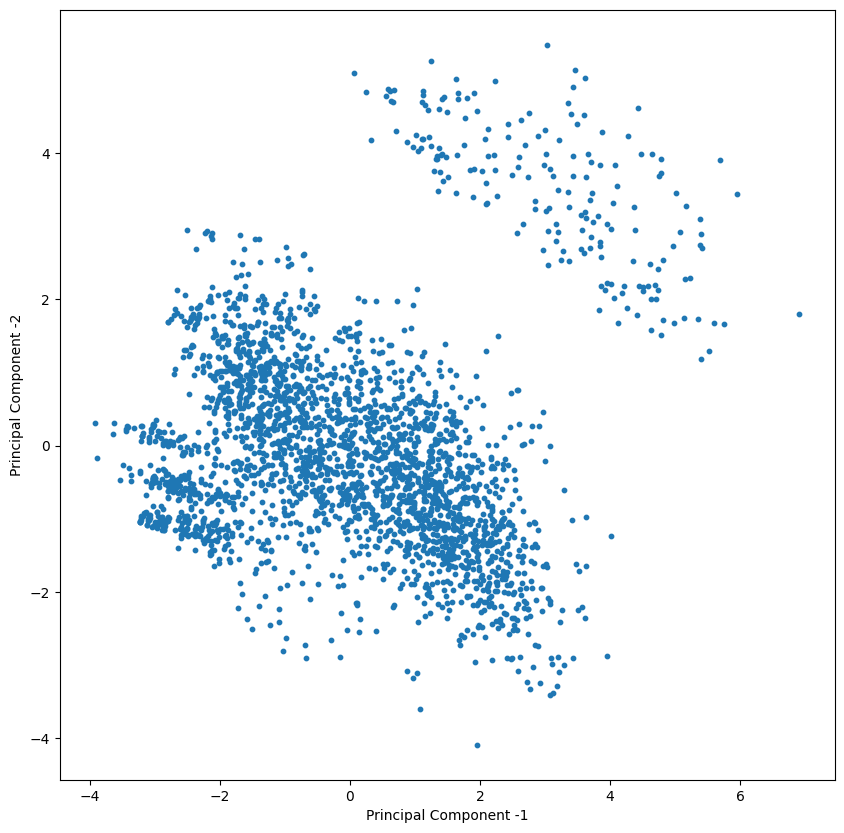

In [429]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.xlabel('Principal Component -1')
plt.ylabel('Principal Component -2')

plt.scatter(principal_accident_df['PC1'],
           principal_accident_df['PC2'],  s = 10)
# plt.legend(targets, prop = {'size': 15})

In [430]:
y_bal

0       False
1       False
2       False
3       False
4       False
        ...  
2777     True
2778     True
2779     True
2780     True
2781     True
Name: accident_severity, Length: 2782, dtype: bool

In [431]:
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(principal_accident_df, 
                                                                                y_bal, test_size = 0.2,
                                                                                random_state = 42)

In [432]:
decision_tree(pca_x_train, pca_x_test, pca_y_train, pca_y_test)
randomforest(pca_x_train, pca_x_test, pca_y_train, pca_y_test)

The accuracy of decision tree model is 67.86355475763017 %
              precision    recall  f1-score   support

       False       0.70      0.62      0.66       277
        True       0.66      0.74      0.70       280

    accuracy                           0.68       557
   macro avg       0.68      0.68      0.68       557
weighted avg       0.68      0.68      0.68       557

*****************Using crossvalitdation************************
{'fit_time': array([0.00498676, 0.00398803, 0.00398803, 0.00498533, 0.00398803]), 'score_time': array([0.00099826, 0.00099826, 0.00099897, 0.00099802, 0.00199604]), 'estimator': [DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100), DecisionTreeClassifier(max_depth=4, min_samples_leaf=100)], 'test_score': array([0.68764045, 0.69213483, 0.66292135, 0.6494382 , 0.6988

In [433]:
classify(pca_x_train, pca_x_test, pca_y_train, pca_y_test)

Logistic Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.65      0.67       277
        True       0.67      0.72      0.70       280

    accuracy                           0.69       557
   macro avg       0.69      0.69      0.69       557
weighted avg       0.69      0.69      0.69       557

logistic model accuracy:
0.6858168761220825
Support Vector Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.67      0.69       277
        True       0.69      0.72      0.70       280

    accuracy                           0.69       557
   macro avg       0.70      0.69      0.69       557
weighted avg       0.70      0.69      0.69       557

Support Vector accuracy:
0.6947935368043088
Knearest Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.58      0.61       277
        True       0.62      0.68      0.65    